Imports

In [27]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

2021-07-23 11:46:25,288- WARNING•	QuickBB solver is unavailable
2021-07-23 11:46:25,290- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


# Grabbing Graphs

In [47]:
raw_g_data = []
with open('55_20NodeRandom_Local_Data_Part1.csv', 'r', newline = '') as s:
  spamreader = csv.reader(s, quotechar='|')
  for row in spamreader:
    new_row = [float(i) for i in row]
    raw_g_data.append(new_row)

In [48]:
g_data = []
graphs = int(len(raw_g_data)/20)
for g in range(graphs):
    g_list = []
    for i in range(20):
        #print(g*20+i)
        g_list.append(raw_g_data[g*20+i])
    g_data.append(g_list)

In [63]:
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

In [64]:
resi = []
with open('20NodeRandomGraph1 (2).csv', 'r', newline = '') as g:
  spamreader = csv.reader(g, quotechar='|')
  for row in spamreader:
    resi.append(row)

#convert bunch of rows to matrices
n = int(len(resi)/20)
mat_list = []
for i in range(n):
  array = []
  for j in range(20):
    row = resi[i*20 +j]
    row = [float(k) for k in row]
    array.append(row)
  mat_list.append(array)

In [65]:
len(mat_list)

55

In [66]:
g_list = mats_to_graphs(mat_list)

In [67]:
len(g_data)

28

In [68]:
new_g_list = g_list[:28]

In [69]:
len(new_g_list)

28

Finding Max Energies

In [70]:
def find_max(data):
    """
    Return an array with best optima of each graph
    """
    max_en = []
    n = len(data)
    
    for i in range(n):
        max_enn = 0
        for j in range(len(data[i])):
            enn = data[i][j][2]
            if enn>max_enn:
                max_enn = enn
        max_en.append(max_enn)
    return max_en

In [71]:
max_en = find_max(g_data)

In [72]:
max_en

[20.284749105370768,
 20.502635955801225,
 18.066398420918414,
 17.86002664365252,
 20.864235941178443,
 20.858653070476944,
 23.980917630040672,
 23.838427673621815,
 22.221382432427987,
 22.06849600891617,
 26.780676084021273,
 26.679933259533694,
 23.457681076195165,
 23.25716682150475,
 22.91554565357199,
 23.079868335123706,
 21.81286201725008,
 21.96574473687494,
 26.793042762094295,
 27.183336848383497,
 27.66213945620647,
 27.845212736429364,
 20.334773176913686,
 20.573426826891534,
 20.406697224191806,
 17.85286348497528,
 18.022779955152135,
 17.56897217599276]

# Computing Similarities of a subset of graphs

In [75]:
ind = [i for i in range(len(g_data))]
#ind = [1,7,14,20]

In [76]:
graphs = [new_g_list[i] for i in ind]
graphs_data = [g_data[i] for i in ind]
graphs_max_en= [max_en[i] for i in ind]

In [77]:
def run(graphs = graphs, g_data = graphs_data, g_max_en = graphs_max_en):
  """
  For each graph pair, returns all multistart approx ratios 
  """
  a_sim = []
  seeds = 20
  full_data = []
  averaged_data = []

  n = len(graphs)
  for i in range(n):
    donor = graphs[i]
    print('########################')
    print(i)

    for j in range(n):
      print('***')
      print(j)
      if True:
        acceptor = graphs[j]
        acceptor_max = g_max_en[j]

        av = 0

        for k in range(seeds):

          donor_gamma = g_data[i][k][0]
          donor_beta = g_data[i][k][1]
          
          
          y = QAOA_energy(acceptor, gamma = [donor_gamma], beta = [donor_beta])
          a_r = y/acceptor_max
          full_data.append(a_r)
          print(a_r)
          av += a_r
        avg = av/seeds
        averaged_data.append(avg)
  return full_data, averaged_data

In [78]:
ind

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [79]:
full, av = run()

########################
0
***
0



[1.]



[0.99999999]



[1.]



[0.99999999]



[0.99999999]



[1.]



[1.]



[1.]



[1.]



[1.]



[0.99999998]



[1.]



[0.99999999]



[0.99999999]



[1.]



[1.]



[1.]



[1.]



[0.99999998]



[0.99999997]
***
1



[0.99967905]



[0.99967915]



[0.99967883]



[0.99967985]



[0.99968029]



[0.9996785]



[0.99967853]



[0.99967803]



[0.99967805]



[0.99967804]



[0.99967587]



[0.99967805]



[0.99968169]



[0.99967467]



[0.99967681]



[0.99967804]



[0.99967792]



[0.99967731]



[0.99968203]



[0.99968342]
***
2



[0.99828544]



[0.94924835]



[0.94924913]



[0.99829144]



[0.9982871]



[0.9492483]



[0.9492484]



[0.99828394]



[0.94924827]



[0.94924826]



[0.94924776]



[0.99828401]



[0.99828911]



[0.99827903]



[0.94924687]



[0.94924827]



[0.94924824]



[0.998281]



[0.94925271]



[0.94925421]
***
3



[0.99909403]



[0.95801344]



[0.9580137]



[0.99910009]



[0.99909438]



[0.95801318]



[0.95801324]



[0.99909359]



[0.95801301]



[0.958013]



[0.95801198]



[0.99909365]



[0.99909493]



[0.99909214]



[0.95801188]



[0.958013]



[0.95801294]



[0.99909104]



[0.95801658]



[0.9580178]
***
4



[0.99998145]



[0.9165772]



[0.91657731]



[0.99998143]



[0.99998111]



[0.91657648]



[0.91657656]



[0.99998171]



[0.91657597]



[0.91657596]



[0.91657336]



[0.99998171]



[0.99998073]



[0.99998258]



[0.91657383]



[0.91657596]



[0.91657581]



[0.99998182]



[0.91658282]



[0.9165852]
***
5



[0.99997711]



[0.9029497]



[0.90294992]



[0.99997706]



[0.99997674]



[0.90294966]



[0.90294969]



[0.9999774]



[0.90294963]



[0.90294963]



[0.9029494]



[0.9999774]



[0.99997632]



[0.99997835]



[0.90294918]



[0.90294963]



[0.90294962]



[0.99997753]



[0.90295108]



[0.90295157]
***
6



[0.99866753]



[0.85410025]



[0.85409888]



[0.9986577]



[0.99866906]



[0.85409912]



[0.85409907]



[0.99866655]



[0.85409833]



[0.85409831]



[0.85409486]



[0.99866647]



[0.99867052]



[0.99866328]



[0.85409745]



[0.85409831]



[0.85409811]



[0.99867]



[0.85410118]



[0.85410223]
***
7



[0.99886137]



[0.85153251]



[0.85153069]



[0.99885255]



[0.99886214]



[0.85153146]



[0.85153135]



[0.99886097]



[0.85153073]



[0.85153071]



[0.85152773]



[0.9988609]



[0.99886278]



[0.99885962]



[0.8515308]



[0.85153071]



[0.85153054]



[0.99886425]



[0.85153055]



[0.85153057]
***
8



[0.99966421]



[0.78854088]



[0.78853703]



[0.99965979]



[0.99966541]



[0.78853858]



[0.78853835]



[0.99966335]



[0.78853696]



[0.78853693]



[0.78853034]



[0.99966332]



[0.99966665]



[0.9996605]



[0.78853688]



[0.78853692]



[0.78853654]



[0.99966473]



[0.7885374]



[0.78853772]
***
9



[0.9998308]



[0.7972825]



[0.79727864]



[0.99982744]



[0.99983112]



[0.79728004]



[0.79727983]



[0.99983062]



[0.79727832]



[0.79727828]



[0.79727116]



[0.99983059]



[0.9998314]



[0.99983001]



[0.79727783]



[0.79727828]



[0.79727786]



[0.99983186]



[0.79728004]



[0.79728081]
***
10



[0.99674425]



[0.78569534]



[0.78569086]



[0.99672944]



[0.99674516]



[0.78569281]



[0.78569252]



[0.9967439]



[0.78569102]



[0.78569099]



[0.78568383]



[0.99674377]



[0.99674579]



[0.99674268]



[0.78569133]



[0.78569098]



[0.78569056]



[0.99674954]



[0.78569023]



[0.78569017]
***
11



[0.99716679]



[0.79171618]



[0.7917117]



[0.99715368]



[0.99716721]



[0.79171352]



[0.79171324]



[0.99716679]



[0.79171164]



[0.7917116]



[0.79170397]



[0.99716667]



[0.99716733]



[0.99716673]



[0.79171157]



[0.7917116]



[0.79171115]



[0.9971719]



[0.79171204]



[0.79171239]
***
12



[0.99926849]



[0.69734328]



[0.69733822]



[0.99926158]



[0.9992701]



[0.6973405]



[0.69734017]



[0.99926738]



[0.69733855]



[0.69733851]



[0.69733073]



[0.99926732]



[0.99927172]



[0.99926366]



[0.69733911]



[0.6973385]



[0.69733804]



[0.99926963]



[0.69733696]



[0.69733664]
***
13



[0.99923963]



[0.70214796]



[0.70214224]



[0.99923246]



[0.99924019]



[0.70214486]



[0.70214448]



[0.99923937]



[0.70214267]



[0.70214264]



[0.70213398]



[0.9992393]



[0.99924063]



[0.99923844]



[0.70214342]



[0.70214262]



[0.70214211]



[0.99924205]



[0.70214053]



[0.70214005]
***
14



[0.99867848]



[0.65551177]



[0.65550443]



[0.99867119]



[0.99867795]



[0.65550859]



[0.65550802]



[0.9986791]



[0.65550634]



[0.6555063]



[0.65549797]



[0.99867902]



[0.99867715]



[0.99868108]



[0.65550945]



[0.65550628]



[0.65550579]



[0.99868218]



[0.65549668]



[0.65549367]
***
15



[0.9990059]



[0.65389228]



[0.65388506]



[0.9989982]



[0.99900632]



[0.65388902]



[0.65388848]



[0.99900577]



[0.65388672]



[0.65388669]



[0.65387805]



[0.9990057]



[0.99900658]



[0.99900527]



[0.65388944]



[0.65388667]



[0.65388616]



[0.99900871]



[0.65387834]



[0.65387576]
***
16



[0.99992154]



[0.58337162]



[0.58335588]



[0.99992202]



[0.99992082]



[0.58336436]



[0.58336319]



[0.99992211]



[0.58335922]



[0.58335914]



[0.58333972]



[0.99992211]



[0.99992002]



[0.99992395]



[0.58336471]



[0.58335911]



[0.58335796]



[0.99992214]



[0.58334234]



[0.58333719]
***
17



[0.9997521]



[0.59208371]



[0.59207149]



[0.99974822]



[0.99975242]



[0.59207788]



[0.59207699]



[0.99975194]



[0.59207375]



[0.59207369]



[0.59205793]



[0.9997519]



[0.99975268]



[0.99975137]



[0.59207748]



[0.59207366]



[0.59207273]



[0.99975338]



[0.59206236]



[0.59205896]
***
18



[0.99438904]



[0.5828769]



[0.58285532]



[0.99437509]



[0.99438737]



[0.58286669]



[0.58286512]



[0.99439074]



[0.58285948]



[0.58285936]



[0.58283186]



[0.9943906]



[0.99438513]



[0.99439628]



[0.58286632]



[0.58285932]



[0.58285769]



[0.99439685]



[0.58283848]



[0.58283217]
***
19



[0.99649748]



[0.58198173]



[0.58196083]



[0.9964831]



[0.9964979]



[0.58197155]



[0.58197005]



[0.99649752]



[0.58196435]



[0.58196424]



[0.58193655]



[0.99649739]



[0.99649798]



[0.99649757]



[0.58197017]



[0.58196419]



[0.58196256]



[0.99650314]



[0.58194662]



[0.58194141]
***
20



[0.9953175]



[0.54652898]



[0.54650734]



[0.99530132]



[0.99531772]



[0.54651862]



[0.54651705]



[0.99531774]



[0.54651129]



[0.54651117]



[0.54648312]



[0.99531759]



[0.99531755]



[0.99531844]



[0.54651779]



[0.54651112]



[0.54650946]



[0.99532414]



[0.5464914]



[0.54648549]
***
21



[0.99516643]



[0.54932697]



[0.54930695]



[0.99514852]



[0.99516753]



[0.54931723]



[0.54931579]



[0.99516601]



[0.54931034]



[0.54931023]



[0.54928376]



[0.99516585]



[0.9951683]



[0.99516453]



[0.54931595]



[0.54931019]



[0.54930862]



[0.99517283]



[0.54929325]



[0.54928823]
***
22



[0.99992979]



[0.99993076]



[0.99992973]



[0.99993132]



[0.99993001]



[0.99993007]



[0.99993001]



[0.99992957]



[0.99992957]



[0.99992956]



[0.99992748]



[0.99992959]



[0.9999303]



[0.99992883]



[0.99992933]



[0.99992956]



[0.99992944]



[0.99992888]



[0.99993037]



[0.99993069]
***
23



[0.99952271]



[0.99952207]



[0.99952243]



[0.99952268]



[0.99952439]



[0.99952167]



[0.99952175]



[0.99952136]



[0.99952139]



[0.99952138]



[0.99951979]



[0.99952137]



[0.99952626]



[0.99951689]



[0.99951972]



[0.99952138]



[0.99952129]



[0.99952083]



[0.99952671]



[0.99952853]
***
24



[0.99987791]



[0.99987826]



[0.99987778]



[0.99987878]



[0.99987859]



[0.99987773]



[0.99987772]



[0.99987734]



[0.99987735]



[0.99987734]



[0.99987561]



[0.99987735]



[0.99987938]



[0.99987544]



[0.99987666]



[0.99987734]



[0.99987724]



[0.99987677]



[0.99987957]



[0.99988035]
***
25



[0.99913108]



[0.94950789]



[0.94950849]



[0.99913705]



[0.99913138]



[0.94950823]



[0.94950826]



[0.99913067]



[0.94950846]



[0.94950846]



[0.94950937]



[0.99913073]



[0.99913188]



[0.99912934]



[0.9495084]



[0.94950846]



[0.94950852]



[0.99912817]



[0.94950859]



[0.94950861]
***
26



[0.99873942]



[0.9495831]



[0.94958449]



[0.99874453]



[0.99874089]



[0.94958348]



[0.94958361]



[0.99873811]



[0.94958376]



[0.94958376]



[0.94958454]



[0.99873817]



[0.99874266]



[0.9987338]



[0.94958256]



[0.94958376]



[0.94958381]



[0.99873559]



[0.94958751]



[0.94958875]
***
27



[0.99921269]



[0.95907438]



[0.95907341]



[0.99921888]



[0.999211]



[0.95907408]



[0.95907399]



[0.99921388]



[0.95907386]



[0.95907386]



[0.95907313]



[0.99921393]



[0.99920927]



[0.99921781]



[0.95907458]



[0.95907386]



[0.95907381]



[0.99921193]



[0.95907156]



[0.9590708]
########################
1
***
0



[0.99967201]



[0.99967885]



[0.99966036]



[0.99971918]



[0.99967674]



[0.99967046]



[0.99967909]



[0.99967862]



[0.99966652]



[0.99967629]



[0.99966896]



[0.99967034]



[0.99967118]



[0.99966843]



[0.99966831]



[0.99966922]



[0.99967142]



[0.99967046]



[0.99967099]



[0.99966715]
***
1



[1.]



[0.99999993]



[0.99999989]



[0.99999766]



[0.99999996]



[1.]



[0.99999992]



[0.99999993]



[0.99999998]



[0.99999996]



[1.]



[1.]



[1.]



[1.]



[0.99999999]



[1.]



[1.]



[1.]



[1.]



[0.99999997]
***
2



[0.94958093]



[0.94957901]



[0.9992708]



[0.94956708]



[0.94957962]



[0.94958137]



[0.99926439]



[0.99926462]



[0.99926843]



[0.94957974]



[0.99926946]



[0.94958149]



[0.94958196]



[0.9495812]



[0.94958081]



[0.99926933]



[0.99926826]



[0.99926873]



[0.99926628]



[0.94958017]
***
3



[0.95827123]



[0.95827072]



[0.99946716]



[0.95826666]



[0.95827089]



[0.95827134]



[0.99948036]



[0.99948011]



[0.99947108]



[0.95827092]



[0.99947501]



[0.95827139]



[0.95827162]



[0.95827117]



[0.958271]



[0.99947515]



[0.99947632]



[0.99947581]



[0.99947349]



[0.95827067]
***
4



[0.91742557]



[0.9174178]



[0.99949021]



[0.91736979]



[0.91742022]



[0.91742731]



[0.99951373]



[0.99951315]



[0.99949791]



[0.91742073]



[0.99950108]



[0.9174275]



[0.91742702]



[0.91742911]



[0.91742897]



[0.99950139]



[0.99950414]



[0.99950294]



[0.9995035]



[0.91742961]
***
5



[0.90296375]



[0.90296517]



[0.99946802]



[0.90297331]



[0.90296474]



[0.90296343]



[0.99949204]



[0.99949144]



[0.99947587]



[0.90296464]



[0.99947911]



[0.90296343]



[0.90296381]



[0.90296279]



[0.90296264]



[0.99947943]



[0.99948223]



[0.99948101]



[0.99948158]



[0.90296211]
***
6



[0.85458205]



[0.85457914]



[0.99820513]



[0.8545592]



[0.85458004]



[0.85458267]



[0.99820029]



[0.9982003]



[0.99820444]



[0.85458024]



[0.99819989]



[0.85458263]



[0.85458156]



[0.85458426]



[0.85458473]



[0.99819991]



[0.9982]



[0.99819995]



[0.99820462]



[0.85458616]
***
7



[0.85160567]



[0.8516078]



[0.99813664]



[0.85161796]



[0.85160713]



[0.85160515]



[0.99814293]



[0.99814267]



[0.99813944]



[0.85160701]



[0.99813692]



[0.85160496]



[0.85160401]



[0.85160576]



[0.85160644]



[0.99813707]



[0.99813837]



[0.9981378]



[0.99814209]



[0.8516077]
***
8



[0.7890087]



[0.78900788]



[0.99951826]



[0.78899764]



[0.78900811]



[0.78900881]



[0.9995185]



[0.99951844]



[0.9995188]



[0.78900819]



[0.99951696]



[0.78900848]



[0.78900586]



[0.78901164]



[0.78901315]



[0.999517]



[0.99951735]



[0.99951719]



[0.99951951]



[0.78901669]
***
9



[0.79794656]



[0.79794356]



[0.99936887]



[0.79792005]



[0.79794446]



[0.79794715]



[0.99938208]



[0.99938172]



[0.99937349]



[0.79794469]



[0.99937397]



[0.79794688]



[0.79794406]



[0.79795055]



[0.79795206]



[0.99937417]



[0.99937593]



[0.99937516]



[0.99937708]



[0.79795585]
***
10



[0.78606662]



[0.7860672]



[0.99556529]



[0.78606502]



[0.78606699]



[0.7860664]



[0.99556927]



[0.995569]



[0.99556779]



[0.78606698]



[0.99556276]



[0.786066]



[0.78606317]



[0.78606921]



[0.78607093]



[0.99556293]



[0.99556433]



[0.99556371]



[0.99557062]



[0.78607474]
***
11



[0.79226783]



[0.7922664]



[0.99591393]



[0.79225193]



[0.79226681]



[0.79226807]



[0.99592496]



[0.99592454]



[0.99591857]



[0.79226694]



[0.99591522]



[0.79226771]



[0.79226471]



[0.79227139]



[0.79227309]



[0.99591547]



[0.99591757]



[0.99591665]



[0.99592282]



[0.79227713]
***
12



[0.6977583]



[0.69775816]



[0.99909952]



[0.69775099]



[0.69775816]



[0.69775824]



[0.99909347]



[0.99909354]



[0.99909822]



[0.69775821]



[0.99909456]



[0.69775778]



[0.69775435]



[0.6977618]



[0.69776383]



[0.99909454]



[0.99909431]



[0.99909441]



[0.99909777]



[0.69776847]
***
13



[0.7025559]



[0.70255652]



[0.99855361]



[0.70255313]



[0.70255628]



[0.70255565]



[0.99856329]



[0.99856296]



[0.99855739]



[0.70255629]



[0.99855594]



[0.70255512]



[0.70255129]



[0.70255948]



[0.70256179]



[0.99855612]



[0.99855772]



[0.99855702]



[0.99856062]



[0.70256695]
***
14



[0.65501821]



[0.65503003]



[0.99748694]



[0.65509295]



[0.6550263]



[0.65501541]



[0.99751242]



[0.9975117]



[0.99749577]



[0.65502558]



[0.9974967]



[0.65501449]



[0.65501053]



[0.65501752]



[0.65502053]



[0.99749709]



[0.99750049]



[0.99749901]



[0.99750267]



[0.65502588]
***
15



[0.65357544]



[0.65358516]



[0.99822125]



[0.65363546]



[0.65358208]



[0.65357312]



[0.99823265]



[0.99823227]



[0.9982256]



[0.6535815]



[0.99822429]



[0.65357225]



[0.6535682]



[0.65357566]



[0.65357861]



[0.9982245]



[0.99822631]



[0.99822552]



[0.99822927]



[0.65358408]
***
16



[0.58279451]



[0.5828154]



[0.99933103]



[0.58292288]



[0.58280879]



[0.5827895]



[0.999359]



[0.99935832]



[0.99934008]



[0.58280754]



[0.99934424]



[0.58278764]



[0.58277884]



[0.58279505]



[0.58280143]



[0.99934461]



[0.99934781]



[0.99934641]



[0.9993466]



[0.58281329]
***
17



[0.59193308]



[0.59194554]



[0.99925246]



[0.59200636]



[0.59194157]



[0.59193004]



[0.99926558]



[0.99926521]



[0.99925708]



[0.59194085]



[0.99925741]



[0.59192868]



[0.59192154]



[0.59193529]



[0.59194022]



[0.99925761]



[0.99925939]



[0.99925861]



[0.99926069]



[0.59194984]
***
18



[0.58234511]



[0.58237149]



[0.99209283]



[0.58250482]



[0.58236313]



[0.58233876]



[0.99213463]



[0.99213343]



[0.9921074]



[0.58236157]



[0.99210832]



[0.58233626]



[0.58232408]



[0.58234686]



[0.58235556]



[0.99210897]



[0.99211465]



[0.99211217]



[0.9921189]



[0.58237198]
***
19



[0.58186536]



[0.58188643]



[0.99514003]



[0.58198829]



[0.58187972]



[0.58186021]



[0.9951508]



[0.99515037]



[0.99514467]



[0.5818785]



[0.99514085]



[0.58185789]



[0.5818457]



[0.58186921]



[0.58187762]



[0.9951411]



[0.99514325]



[0.99514231]



[0.99514901]



[0.58189405]
***
20



[0.54621792]



[0.54624147]



[0.99371969]



[0.54635767]



[0.54623399]



[0.54621221]



[0.99373311]



[0.99373259]



[0.99372531]



[0.54623262]



[0.99372125]



[0.54620976]



[0.54619725]



[0.54622112]



[0.54622985]



[0.99372155]



[0.99372411]



[0.99372299]



[0.99373048]



[0.54624671]
***
21



[0.54925124]



[0.54927048]



[0.9938192]



[0.54936258]



[0.54926434]



[0.54924653]



[0.99381985]



[0.99381962]



[0.99382085]



[0.54926324]



[0.99381425]



[0.54924432]



[0.54923255]



[0.54925541]



[0.54926347]



[0.9938144]



[0.9938156]



[0.99381507]



[0.99382327]



[0.54927933]
***
22



[0.9998498]



[0.99985499]



[0.99984007]



[0.9998838]



[0.99985338]



[0.9998486]



[0.99985517]



[0.99985481]



[0.99984494]



[0.99985305]



[0.99984746]



[0.99984842]



[0.99984839]



[0.99984775]



[0.99984806]



[0.99984765]



[0.99984933]



[0.9998486]



[0.99984837]



[0.99984808]
***
23



[0.99996975]



[0.99996754]



[0.99997388]



[0.99995317]



[0.99996824]



[0.99997025]



[0.99996746]



[0.99996761]



[0.99997196]



[0.99996838]



[0.99997071]



[0.99997036]



[0.99997063]



[0.99997031]



[0.99997002]



[0.99997064]



[0.99996995]



[0.99997025]



[0.99997059]



[0.99996962]
***
24



[0.99994897]



[0.99995187]



[0.99994364]



[0.9999675]



[0.99995098]



[0.9999483]



[0.99995197]



[0.99995177]



[0.99994639]



[0.99995079]



[0.99994765]



[0.99994822]



[0.99994837]



[0.99994764]



[0.99994771]



[0.99994776]



[0.99994871]



[0.9999483]



[0.99994833]



[0.99994749]
***
25



[0.94920578]



[0.94921117]



[0.99947725]



[0.94924353]



[0.94920951]



[0.94920457]



[0.99949109]



[0.99949082]



[0.99948138]



[0.94920915]



[0.99948538]



[0.94920452]



[0.94920548]



[0.94920265]



[0.94920238]



[0.99948552]



[0.99948677]



[0.99948623]



[0.99948395]



[0.94920105]
***
26



[0.94974018]



[0.94973959]



[0.99954855]



[0.94973655]



[0.94973979]



[0.94974033]



[0.99954526]



[0.9995454]



[0.99954724]



[0.94973982]



[0.99954839]



[0.94974048]



[0.94974148]



[0.94973939]



[0.94973877]



[0.99954832]



[0.99954766]



[0.99954795]



[0.99954594]



[0.94973741]
***
27



[0.95858133]



[0.95859056]



[0.9986409]



[0.95864409]



[0.95858769]



[0.95857923]



[0.99868452]



[0.99868351]



[0.99865457]



[0.9585871]



[0.99866303]



[0.95857895]



[0.95857916]



[0.95857745]



[0.95857783]



[0.99866356]



[0.99866822]



[0.99866619]



[0.99866404]



[0.95857753]
########################
2
***
0



[0.99954676]



[0.99812437]



[0.99814052]



[0.99813979]



[0.99952672]



[0.99813935]



[0.99953009]



[0.99813324]



[0.99813258]



[0.99814541]



[0.99814055]



[0.99814067]



[0.99812785]



[0.99814067]



[0.99952311]



[0.99953019]



[0.99814109]



[0.99812725]



[0.99953016]



[0.99814107]
***
1



[0.99991973]



[0.99919129]



[0.99919697]



[0.9991967]



[0.99995044]



[0.99919657]



[0.9999513]



[0.99919163]



[0.99919414]



[0.99919863]



[0.99919693]



[0.99919702]



[0.99919254]



[0.99919702]



[0.99994955]



[0.99995086]



[0.99919734]



[0.99918671]



[0.99995126]



[0.99919733]
***
2



[0.94961589]



[0.9999999]



[1.]



[1.]



[0.94962165]



[1.]



[0.94962165]



[0.99999999]



[0.99999998]



[0.99999999]



[1.]



[1.]



[0.99999994]



[1.]



[0.94962163]



[0.94962165]



[1.]



[0.99999997]



[0.94962165]



[1.]
***
3



[0.95824542]



[0.99969471]



[0.9997052]



[0.99970476]



[0.95825967]



[0.99970444]



[0.95826022]



[0.99970416]



[0.99970014]



[0.99970842]



[0.9997053]



[0.99970531]



[0.99969695]



[0.99970531]



[0.95825909]



[0.95826004]



[0.99970535]



[0.99970394]



[0.9582602]



[0.99970535]
***
4



[0.91748654]



[0.99784957]



[0.99786799]



[0.99786716]



[0.91754022]



[0.99786665]



[0.91753789]



[0.99786055]



[0.99785895]



[0.99787358]



[0.99786804]



[0.99786816]



[0.99785353]



[0.99786816]



[0.91754275]



[0.91753736]



[0.99786858]



[0.99785457]



[0.91753778]



[0.99786856]
***
5



[0.90293598]



[0.99781209]



[0.99783078]



[0.99782994]



[0.90293245]



[0.99782943]



[0.90293345]



[0.99782332]



[0.99782161]



[0.99783646]



[0.99783083]



[0.99783096]



[0.9978161]



[0.99783096]



[0.90293137]



[0.90293347]



[0.99783138]



[0.99781734]



[0.90293347]



[0.99783136]
***
6



[0.85448438]



[0.99498731]



[0.99499389]



[0.99499352]



[0.85454897]



[0.99499344]



[0.85454824]



[0.99498007]



[0.99499043]



[0.99499572]



[0.9949937]



[0.99499392]



[0.9949888]



[0.99499392]



[0.85454984]



[0.85454736]



[0.99499479]



[0.99496677]



[0.8545481]



[0.99499474]
***
7



[0.85141459]



[0.99489377]



[0.99490561]



[0.99490502]



[0.85146414]



[0.99490478]



[0.85146526]



[0.99489213]



[0.99489962]



[0.99490909]



[0.99490549]



[0.9949057]



[0.99489637]



[0.9949057]



[0.85146303]



[0.85146443]



[0.99490653]



[0.99487958]



[0.85146516]



[0.99490649]
***
8



[0.78869252]



[0.9974484]



[0.99745583]



[0.99745545]



[0.78881603]



[0.99745531]



[0.78881594]



[0.9974461]



[0.99745205]



[0.99745797]



[0.99745572]



[0.99745588]



[0.99745004]



[0.99745588]



[0.78881632]



[0.78881406]



[0.99745648]



[0.99743696]



[0.78881567]



[0.99745645]
***
9



[0.79765289]



[0.99724692]



[0.99726057]



[0.99725993]



[0.79778942]



[0.99725959]



[0.79778854]



[0.99725118]



[0.99725379]



[0.99726465]



[0.99726053]



[0.99726069]



[0.99724988]



[0.99726069]



[0.79779057]



[0.79778654]



[0.99726125]



[0.99724286]



[0.79778824]



[0.99726122]
***
10



[0.78569466]



[0.99097017]



[0.99098279]



[0.99098213]



[0.78582625]



[0.99098191]



[0.78582662]



[0.99096462]



[0.99097631]



[0.99098644]



[0.99098258]



[0.99098287]



[0.99097296]



[0.99098287]



[0.78582608]



[0.78582458]



[0.990984]



[0.99094744]



[0.78582634]



[0.99098394]
***
11



[0.79191822]



[0.99158215]



[0.99159745]



[0.99159669]



[0.79206143]



[0.99159637]



[0.79206107]



[0.99158048]



[0.99158971]



[0.99160196]



[0.9915973]



[0.99159757]



[0.9915855]



[0.99159757]



[0.79206205]



[0.79205892]



[0.99159861]



[0.99156472]



[0.79206076]



[0.99159855]
***
12



[0.69735721]



[0.99660988]



[0.99661464]



[0.99661436]



[0.69750513]



[0.99661432]



[0.69750499]



[0.99660326]



[0.99661211]



[0.99661593]



[0.99661447]



[0.99661466]



[0.99661097]



[0.99661466]



[0.69750553]



[0.6975027]



[0.99661537]



[0.99659223]



[0.69750466]



[0.99661533]
***
13



[0.70208946]



[0.99558699]



[0.99560023]



[0.99559959]



[0.70225377]



[0.99559929]



[0.70225394]



[0.99558776]



[0.99559358]



[0.99560415]



[0.99560013]



[0.99560034]



[0.99558988]



[0.99560034]



[0.70225388]



[0.70225137]



[0.9956011]



[0.99557633]



[0.70225358]



[0.99560105]
***
14



[0.65430305]



[0.9942279]



[0.99424883]



[0.99424787]



[0.65444965]



[0.99424733]



[0.6544538]



[0.99423621]



[0.99423846]



[0.99425515]



[0.99424882]



[0.99424902]



[0.99423242]



[0.99424902]



[0.65444553]



[0.65445111]



[0.99424977]



[0.99422526]



[0.65445349]



[0.99424973]
***
15



[0.65289374]



[0.99521517]



[0.99522891]



[0.99522825]



[0.65304862]



[0.99522794]



[0.65305201]



[0.99521664]



[0.99522202]



[0.995233]



[0.99522883]



[0.99522903]



[0.99521816]



[0.99522903]



[0.65304531]



[0.65304926]



[0.99522977]



[0.99520545]



[0.65305168]



[0.99522973]
***
16



[0.5812894]



[0.99792035]



[0.99793928]



[0.99793844]



[0.58163764]



[0.9979379]



[0.58164523]



[0.99793315]



[0.99793002]



[0.99794505]



[0.99793936]



[0.99793946]



[0.99792441]



[0.99793946]



[0.58163024]



[0.5816391]



[0.9979398]



[0.99792854]



[0.58164449]



[0.99793978]
***
17



[0.59082201]



[0.99710993]



[0.9971236]



[0.99712296]



[0.59110795]



[0.99712262]



[0.59111232]



[0.99711438]



[0.99711681]



[0.99712769]



[0.99712357]



[0.99712372]



[0.99711289]



[0.99712372]



[0.59110384]



[0.59110745]



[0.99712427]



[0.99710624]



[0.59111171]



[0.99712424]
***
18



[0.58030312]



[0.98682455]



[0.98685596]



[0.98685451]



[0.58079474]



[0.9868537]



[0.58080446]



[0.98683697]



[0.98684039]



[0.98686545]



[0.98685593]



[0.98685625]



[0.98683132]



[0.98685625]



[0.58078532]



[0.58079592]



[0.98685737]



[0.9868205]



[0.58080341]



[0.98685731]
***
19



[0.57993696]



[0.99055675]



[0.99057206]



[0.9905713]



[0.5804387]



[0.99057098]



[0.58044648]



[0.9905543]



[0.9905643]



[0.99057656]



[0.99057189]



[0.99057218]



[0.99056011]



[0.99057218]



[0.58043135]



[0.58043797]



[0.99057327]



[0.99053775]



[0.5804454]



[0.99057321]
***
20



[0.54420784]



[0.9886775]



[0.98869466]



[0.98869381]



[0.54471524]



[0.98869344]



[0.54472381]



[0.98867549]



[0.98868597]



[0.98869971]



[0.98869448]



[0.98869479]



[0.98868126]



[0.98869479]



[0.54470706]



[0.54471512]



[0.98869597]



[0.98865768]



[0.54472273]



[0.9886959]
***
21



[0.54742727]



[0.98864838]



[0.98865986]



[0.98865924]



[0.54790858]



[0.98865906]



[0.54791552]



[0.98863974]



[0.98865389]



[0.98866313]



[0.9886596]



[0.98865993]



[0.98865094]



[0.98865993]



[0.54790208]



[0.54790739]



[0.98866118]



[0.98862053]



[0.54791449]



[0.98866111]
***
22



[0.9996506]



[0.99883035]



[0.99884358]



[0.99884299]



[0.99967353]



[0.99884263]



[0.99967634]



[0.9988381]



[0.99883709]



[0.99884759]



[0.99884362]



[0.99884371]



[0.9988332]



[0.99884371]



[0.99967057]



[0.99967584]



[0.99884402]



[0.99883366]



[0.99967632]



[0.998844]
***
23



[0.99997154]



[0.99910553]



[0.9991083]



[0.99910815]



[0.99999316]



[0.99910812]



[0.99999321]



[0.99910247]



[0.99910686]



[0.99910905]



[0.99910822]



[0.99910832]



[0.99910617]



[0.99910832]



[0.99999311]



[0.99999299]



[0.99910868]



[0.99909684]



[0.99999318]



[0.99910866]
***
24



[0.99982288]



[0.99893398]



[0.99894402]



[0.99894356]



[0.9998414]



[0.9989433]



[0.99984335]



[0.99893827]



[0.99893907]



[0.99894703]



[0.99894402]



[0.99894411]



[0.99893615]



[0.99894411]



[0.99983934]



[0.999843]



[0.99894445]



[0.99893331]



[0.99984334]



[0.99894443]
***
25



[0.94914511]



[0.99967077]



[0.99968164]



[0.99968118]



[0.94911452]



[0.99968085]



[0.9491172]



[0.99968052]



[0.99967639]



[0.99968498]



[0.99968174]



[0.99968176]



[0.99967309]



[0.99968176]



[0.94911163]



[0.9491175]



[0.9996818]



[0.99968024]



[0.94911729]



[0.9996818]
***
26



[0.94981353]



[0.99995964]



[0.99996195]



[0.99996185]



[0.94979229]



[0.99996178]



[0.94979275]



[0.99996093]



[0.99996083]



[0.99996261]



[0.99996195]



[0.99996197]



[0.99996015]



[0.99996197]



[0.94979175]



[0.94979312]



[0.99996202]



[0.99996008]



[0.94979281]



[0.99996202]
***
27



[0.95834163]



[0.99810946]



[0.99813604]



[0.9981349]



[0.95833897]



[0.9981341]



[0.95834313]



[0.99813347]



[0.99812317]



[0.99814424]



[0.99813627]



[0.99813632]



[0.99811512]



[0.99813632]



[0.95833457]



[0.95834286]



[0.9981364]



[0.99813302]



[0.95834316]



[0.9981364]
########################
3
***
0



[0.99896211]



[0.99895379]



[0.99966502]



[0.99895427]



[0.99896089]



[0.9989578]



[0.99895359]



[0.99967206]



[0.99896427]



[0.99967233]



[0.99895421]



[0.99967205]



[0.99966923]



[0.99966518]



[0.99895597]



[0.99893035]



[0.99967129]



[0.99966649]



[0.9989555]



[0.99967227]
***
1



[0.99939143]



[0.99939871]



[0.99999261]



[0.99939806]



[0.99939736]



[0.99939525]



[0.99939888]



[0.99999274]



[0.99940013]



[0.99999275]



[0.99939831]



[0.99999274]



[0.99999257]



[0.99999231]



[0.99939687]



[0.99941555]



[0.99999269]



[0.99999207]



[0.99939731]



[0.99999274]
***
2



[0.99970124]



[0.99971684]



[0.9496043]



[0.9997157]



[0.99970886]



[0.99970942]



[0.99971721]



[0.94960327]



[0.99970875]



[0.94960321]



[0.99971603]



[0.94960327]



[0.94960382]



[0.94960459]



[0.99971286]



[0.99975509]



[0.94960342]



[0.94960467]



[0.99971377]



[0.94960323]
***
3



[0.99999994]



[0.99999995]



[0.95827755]



[0.99999996]



[1.]



[1.]



[0.99999994]



[0.95827753]



[0.99999999]



[0.95827752]



[0.99999996]



[0.95827753]


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.99881747]



[0.99881426]



[0.99880827]



[0.91743286]



[0.99882086]



[0.91743259]



[0.99880916]



[0.91743288]



[0.91743574]



[0.91743981]



[0.99881165]



[0.998776]



[0.91743364]



[0.91743837]



[0.99881097]



[0.91743265]
***
5



[0.99879858]



[0.99878632]



[0.90296849]



[0.99878709]



[0.99879544]



[0.99879222]



[0.99878602]



[0.90297023]



[0.99879883]



[0.9029703]



[0.99878694]



[0.90297023]



[0.90296957]



[0.90296862]



[0.99878952]



[0.99875271]



[0.90297006]



[0.90296902]



[0.99878881]



[0.90297028]
***
6



[0.99556358]



[0.99556883]



[0.85454917]



[0.99556811]



[0.99557273]



[0.99556629]



[0.99556896]



[0.85454559]



[0.99558057]



[0.85454548]



[0.99556849]



[0.85454559]



[0.85454668]



[0.85454821]



[0.99556751]



[0.99558069]



[0.85454587]



[0.85454677]



[0.99556786]



[0.8545455]
***
7



[0.99574734]



[0.99574458]



[0.8515525]



[0.99574448]



[0.9957522]



[0.99574589]



[0.99574452]



[0.85155348]



[0.99575961]



[0.85155355]



[0.99574467]



[0.85155347]



[0.85155263]



[0.85155142]



[0.99574533]



[0.99573573]



[0.85155323]



[0.85155064]



[0.9957452]



[0.85155352]
***
8



[0.99791272]



[0.99791703]



[0.78890159]



[0.99791649]



[0.99791932]



[0.99791497]



[0.99791714]



[0.78889824]



[0.99792465]



[0.78889818]



[0.99791677]



[0.78889823]



[0.78889862]



[0.78889916]



[0.99791595]



[0.99792633]



[0.78889831]



[0.78889648]



[0.99791623]



[0.78889818]
***
9



[0.99804038]



[0.99803525]



[0.79784228]



[0.99803544]



[0.99804196]



[0.99803772]



[0.99803513]



[0.79783683]



[0.99804681]



[0.7978367]



[0.99803549]



[0.79783683]



[0.79783805]



[0.79783978]



[0.99803661]



[0.99802016]



[0.79783713]



[0.79783668]



[0.99803633]



[0.79783671]
***
10



[0.99204783]



[0.9920435]



[0.78594355]



[0.99204339]



[0.99205424]



[0.99204553]



[0.9920434]



[0.78594118]



[0.99206445]



[0.78594117]



[0.99204364]



[0.78594116]



[0.78594105]



[0.78594086]



[0.99204464]



[0.99203073]



[0.78594111]



[0.78593811]



[0.99204444]



[0.78594115]
***
11



[0.99276617]



[0.99275763]



[0.79214794]



[0.99275787]



[0.99276984]



[0.99276169]



[0.99275744]



[0.79214363]



[0.99277924]



[0.79214355]



[0.99275801]



[0.79214362]



[0.79214428]



[0.7921452]



[0.99275986]



[0.99273399]



[0.79214377]



[0.79214206]



[0.99275941]



[0.79214354]
***
12



[0.99699565]



[0.99700372]



[0.69761644]



[0.99700286]



[0.99700505]



[0.99699985]



[0.99700392]



[0.69761279]



[0.99701153]



[0.69761275]



[0.99700325]



[0.69761278]



[0.69761302]



[0.69761335]



[0.99700168]



[0.9970228]



[0.69761281]



[0.69761003]



[0.99700218]



[0.69761273]
***
13



[0.99647422]



[0.99646957]



[0.70239377]



[0.99646964]



[0.99647757]



[0.99647179]



[0.99646946]



[0.70239041]



[0.99648428]



[0.70239039]



[0.99646977]



[0.70239039]



[0.70239036]



[0.70239028]



[0.9964708]



[0.99645581]



[0.70239035]



[0.70238666]



[0.99647056]



[0.70239036]
***
14



[0.99555273]



[0.99553601]



[0.65479448]



[0.99553697]



[0.99554999]



[0.99554401]



[0.99553561]



[0.65480078]



[0.9955565]



[0.65480115]



[0.99553683]



[0.65480074]



[0.65479648]



[0.65479038]



[0.99554035]



[0.99549108]



[0.65479955]



[0.65478784]



[0.9955394]



[0.65480103]
***
15



[0.99613425]



[0.99612838]



[0.65335847]



[0.99612854]



[0.99613694]



[0.99613118]



[0.99612824]



[0.65336284]



[0.99614359]



[0.65336313]



[0.99612863]



[0.65336279]



[0.65335934]



[0.65335438]



[0.99612992]



[0.99611148]



[0.65336182]



[0.65335152]



[0.99612961]



[0.65336302]
***
16



[0.99889652]



[0.99888282]



[0.58232201]



[0.99888372]



[0.99889214]



[0.99888941]



[0.99888248]



[0.5823314]



[0.99889488]



[0.58233203]



[0.99888352]



[0.5823313]



[0.58232381]



[0.58231303]



[0.99888639]



[0.99884555]



[0.5823292]



[0.58230673]



[0.99888559]



[0.58233181]
***
17



[0.99790373]



[0.99789834]



[0.59157374]



[0.99789854]



[0.99790511]



[0.99790093]



[0.99789821]



[0.59157736]



[0.99790989]



[0.59157771]



[0.99789859]



[0.59157729]



[0.59157296]



[0.59156671]



[0.99789976]



[0.99788258]



[0.59157606]



[0.59156115]



[0.99789947]



[0.59157757]
***
18



[0.98896959]



[0.98893647]



[0.58170244]



[0.98893851]



[0.98896159]



[0.98895231]



[0.98893568]



[0.58171321]



[0.98897145]



[0.581714]



[0.98893813]



[0.58171308]



[0.58170365]



[0.58169008]



[0.98894504]



[0.98884935]



[0.58171043]



[0.58168104]



[0.98894314]



[0.5817137]
***
19



[0.99177715]



[0.99176831]



[0.58124931]



[0.99176854]



[0.99178109]



[0.9917725]



[0.9917681]



[0.58125541]



[0.99179099]



[0.58125601]



[0.99176869]



[0.58125529]



[0.58124787]



[0.58123719]



[0.99177061]



[0.99174392]



[0.58125318]



[0.58122757]



[0.99177015]



[0.58125576]
***
20



[0.99005565]



[0.99004381]



[0.54557704]



[0.99004423]



[0.99005877]



[0.99004944]



[0.99004353]



[0.54558497]



[0.99006945]



[0.54558565]



[0.99004434]



[0.54558485]



[0.54557653]



[0.54556454]



[0.99004689]



[0.99001171]



[0.54558249]



[0.54555492]



[0.99004625]



[0.54558538]
***
21



[0.98974774]



[0.98974461]



[0.54866329]



[0.98974435]



[0.9897558]



[0.98974606]



[0.98974454]



[0.54866816]



[0.98976729]



[0.54866869]



[0.98974468]



[0.54866805]



[0.54866135]



[0.54865168]



[0.98974544]



[0.98973502]



[0.54866614]



[0.54864232]



[0.98974532]



[0.54866847]
***
22



[0.99944821]



[0.99944409]



[0.99981426]



[0.9994443]



[0.99944832]



[0.9994461]



[0.99944399]



[0.99981898]



[0.99945082]



[0.99981918]



[0.9994443]



[0.99981897]



[0.9998168]



[0.99981368]



[0.9994452]



[0.99943148]



[0.99981838]



[0.99981396]



[0.99944496]



[0.99981913]
***
23



[0.99916303]



[0.99917475]



[0.99998515]



[0.99917376]



[0.99917148]



[0.99916916]



[0.99917503]



[0.99998367]



[0.99917466]



[0.99998361]



[0.99917412]



[0.99998367]



[0.99998431]



[0.99998521]



[0.99917177]



[0.99920308]



[0.99998385]



[0.99998502]



[0.99917247]



[0.99998362]
***
24



[0.99938669]



[0.99938741]



[0.99993284]



[0.99938725]



[0.99938942]



[0.99938709]



[0.99938742]



[0.99993573]



[0.99939222]



[0.99993585]



[0.99938736]



[0.99993572]



[0.99993442]



[0.99993254]



[0.99938726]



[0.99938732]



[0.99993537]



[0.99993276]



[0.99938731]



[0.99993582]
***
25



[0.99999972]



[0.99999916]



[0.94921325]



[0.99999922]



[0.99999952]



[0.99999948]



[0.99999914]



[0.94921914]



[0.99999955]



[0.94921936]



[0.9999992]



[0.94921913]



[0.94921689]



[0.94921366]



[0.99999935]



[0.99999568]



[0.94921854]



[0.94921501]



[0.99999931]



[0.94921931]
***
26



[0.99981604]



[0.99982841]



[0.94977928]



[0.9998275]



[0.99982247]



[0.99982253]



[0.99982871]



[0.94977993]



[0.99982283]



[0.94977993]



[0.99982777]



[0.94977994]



[0.94977997]



[0.94978]



[0.99982527]



[0.99985835]



[0.94977995]



[0.94978074]



[0.99982599]



[0.94977994]
***
27



[0.99934625]



[0.99932214]



[0.95853736]



[0.99932393]



[0.99933458]



[0.99933375]



[0.99932155]



[0.95854588]



[0.99933469]



[0.95854623]



[0.99932341]



[0.95854586]



[0.95854217]



[0.95853689]



[0.9993284]



[0.99925779]



[0.95854487]



[0.9585379]



[0.99932697]



[0.95854615]
########################
4
***
0



[0.99998161]



[0.99996311]



[0.9972716]



[0.99998171]



[0.99729494]



[0.99998161]



[0.99998159]



[0.99728688]



[0.99998193]



[0.99727849]



[0.99730473]



[0.99998161]



[0.99998674]



[0.99728669]



[0.99727988]



[0.99998162]



[0.9999816]



[0.99998161]



[0.99998203]



[0.9999816]
***
1



[0.99951014]



[0.99943817]



[0.99884894]



[0.99951091]



[0.99886323]



[0.99951016]



[0.99951006]



[0.99885897]



[0.99951173]



[0.99885347]



[0.99887067]



[0.99951015]



[0.99954064]



[0.99885889]



[0.99885451]



[0.9995102]



[0.9995101]



[0.99951014]



[0.9995125]



[0.99951011]
***
2



[0.99798721]



[0.99777067]



[0.94886467]



[0.99799001]



[0.9488761]



[0.9979873]



[0.99798709]



[0.94887152]



[0.99798952]



[0.94886776]



[0.94887949]



[0.99798723]



[0.99805282]



[0.94887139]



[0.94886826]



[0.9979873]



[0.99798714]



[0.99798721]



[0.99799258]



[0.99798708]
***
3



[0.9989404]



[0.99875729]



[0.9573672]



[0.99894283]



[0.95737896]



[0.99894048]



[0.99894035]



[0.95737511]



[0.99894142]



[0.95737077]



[0.95738434]



[0.99894041]



[0.99898406]



[0.95737503]



[0.95737153]



[0.99894045]



[0.99894036]



[0.99894039]



[0.99894415]



[0.99894028]
***
4



[1.]



[0.99999079]



[0.91807073]



[1.]



[0.91807072]



[1.]



[1.]



[0.91807074]



[1.]



[0.91807074]



[0.91807072]



[1.]



[0.99999942]



[0.91807074]



[0.91807074]



[1.]



[1.]



[1.]



[1.]



[1.]
***
5



[0.99999976]



[0.99999229]



[0.90201407]



[0.99999973]



[0.90202478]



[0.99999976]



[0.99999976]



[0.90202088]



[0.99999972]



[0.90201715]



[0.90202882]



[0.99999976]



[0.99999846]



[0.90202078]



[0.90201773]



[0.99999976]



[0.99999976]



[0.99999976]



[0.9999997]



[0.99999976]
***
6



[0.9986355]



[0.99883184]



[0.85484254]



[0.99863241]



[0.85484108]



[0.99863538]



[0.99863541]



[0.85484356]



[0.99863674]



[0.85484299]



[0.85484478]



[0.99863547]



[0.99861342]



[0.85484369]



[0.85484346]



[0.99863552]



[0.99863549]



[0.9986355]



[0.9986331]



[0.99863565]
***
7



[0.99889741]



[0.99908815]



[0.85105486]



[0.99889446]



[0.85105789]



[0.9988973]



[0.99889736]



[0.85105956]



[0.99889797]



[0.85105697]



[0.85106509]



[0.99889739]



[0.99886786]



[0.85105969]



[0.85105791]



[0.99889741]



[0.99889741]



[0.99889741]



[0.99889454]



[0.99889755]
***
8



[0.99958197]



[0.99964612]



[0.78947808]



[0.9995808]



[0.78946923]



[0.99958192]



[0.9995819]



[0.78947812]



[0.99958322]



[0.78947807]



[0.78947826]



[0.99958196]



[0.9995837]



[0.78947853]



[0.78947919]



[0.99958201]



[0.99958195]



[0.99958197]



[0.99958178]



[0.99958203]
***
9



[0.99982966]



[0.99989048]



[0.79878987]



[0.9998286]



[0.79877857]



[0.99982961]



[0.99982963]



[0.79878832]



[0.9998301]



[0.79878914]



[0.79878659]



[0.99982965]



[0.99982204]



[0.79878875]



[0.79879012]



[0.99982966]



[0.99982965]



[0.99982966]



[0.99982885]



[0.99982971]
***
10



[0.99686079]



[0.99720364]



[0.78643459]



[0.99685566]



[0.78642544]



[0.9968606]



[0.99686075]



[0.78643482]



[0.99686112]



[0.78643466]



[0.7864352]



[0.99686075]



[0.9968011]



[0.78643526]



[0.78643588]



[0.99686077]



[0.99686081]



[0.99686079]



[0.9968552]



[0.99686104]
***
11



[0.99731112]



[0.99762366]



[0.79298041]



[0.99730647]



[0.79296904]



[0.99731095]



[0.9973111]



[0.79297915]



[0.99731107]



[0.79297981]



[0.79297779]



[0.99731109]



[0.99725214]



[0.79297961]



[0.79298088]



[0.99731109]



[0.99731115]



[0.99731112]



[0.99730572]



[0.99731135]
***
12



[0.99918133]



[0.99929979]



[0.69869582]



[0.99917934]



[0.69867933]



[0.99918125]



[0.99918124]



[0.69869246]



[0.99918282]



[0.69869427]



[0.69868867]



[0.99918131]



[0.99917634]



[0.69869303]



[0.69869539]



[0.99918136]



[0.99918131]



[0.99918133]



[0.99918043]



[0.99918143]
***
13



[0.99927298]



[0.99942594]



[0.70344847]



[0.9992706]



[0.70343099]



[0.9992729]



[0.99927295]



[0.70344556]



[0.99927344]



[0.70344711]



[0.70344232]



[0.99927297]



[0.99924882]



[0.7034462]



[0.70344849]



[0.99927298]



[0.99927299]



[0.99927299]



[0.99927065]



[0.9992731]
***
14



[0.99883588]



[0.99902341]



[0.65438443]



[0.99883311]



[0.65437296]



[0.99883579]



[0.99883591]



[0.65438785]



[0.99883524]



[0.65438592]



[0.65439208]



[0.99883586]



[0.99879218]



[0.65438859]



[0.65438833]



[0.99883585]



[0.99883592]



[0.99883589]



[0.99883209]



[0.99883602]
***
15



[0.9990646]



[0.99923739]



[0.65328187]



[0.99906195]



[0.65326844]



[0.9990645]



[0.99906458]



[0.65328379]



[0.99906487]



[0.65328268]



[0.65328626]



[0.99906458]



[0.99903479]



[0.65328453]



[0.65328492]



[0.99906459]



[0.99906461]



[0.9990646]



[0.9990618]



[0.99906473]
***
16



[0.99997678]



[0.99996877]



[0.58182995]



[0.99997681]



[0.581805]



[0.99997679]



[0.9999768]



[0.58183708]



[0.99997641]



[0.58183305]



[0.58184591]



[0.99997678]



[0.99997165]



[0.58183867]



[0.58183821]



[0.99997677]



[0.99997679]



[0.99997678]



[0.99997647]



[0.99997678]
***
17



[0.99975976]



[0.99983544]



[0.59197357]



[0.9997585]



[0.59194851]



[0.99975971]



[0.99975973]



[0.591975]



[0.99976017]



[0.59197413]



[0.59197704]



[0.99975975]



[0.99974918]



[0.59197626]



[0.59197769]



[0.99975976]



[0.99975976]



[0.99975976]



[0.99975869]



[0.99975982]
***
18



[0.9947791]



[0.99517021]



[0.58116129]



[0.99477351]



[0.58112797]



[0.99477891]



[0.9947792]



[0.58117141]



[0.99477694]



[0.58116569]



[0.58118391]



[0.99477906]



[0.99467992]



[0.58117357]



[0.58117276]



[0.99477899]



[0.99477918]



[0.9947791]



[0.99477066]



[0.99477937]
***
19



[0.99666278]



[0.99700928]



[0.58150176]



[0.99665766]



[0.58146427]



[0.9966626]



[0.99666277]



[0.58150815]



[0.99666265]



[0.58150448]



[0.58151625]



[0.99666275]



[0.99659673]



[0.58151028]



[0.58151101]



[0.99666275]



[0.99666282]



[0.99666279]



[0.99665676]



[0.99666303]
***
20



[0.99553266]



[0.99593134]



[0.54569551]



[0.99552681]



[0.54565668]



[0.99553245]



[0.99553266]



[0.54570215]



[0.99553223]



[0.54569834]



[0.54571056]



[0.99553262]



[0.9954536]



[0.54570436]



[0.54570511]



[0.99553261]



[0.99553271]



[0.99553267]



[0.99552552]



[0.99553295]
***
21



[0.9953117]



[0.99573139]



[0.54925993]



[0.99530547]



[0.54922066]



[0.99531147]



[0.99531166]



[0.54926366]



[0.99531204]



[0.54926147]



[0.54926862]



[0.99531166]



[0.99523826]



[0.54926572]



[0.54926747]



[0.99531167]



[0.99531173]



[0.99531171]



[0.99530484]



[0.995312]
***
22



[0.99986214]



[0.99979866]



[0.99787451]



[0.99986287]



[0.99789294]



[0.99986216]



[0.99986211]



[0.9978884]



[0.99986278]



[0.99788077]



[0.99790465]



[0.99986215]



[0.99987927]



[0.99788836]



[0.99788238]



[0.99986217]



[0.99986212]



[0.99986214]



[0.99986357]



[0.99986211]
***
23



[0.9993179]



[0.99925523]



[0.99910338]



[0.99931849]



[0.99911708]



[0.99931791]



[0.99931779]



[0.99911189]



[0.99931988]



[0.99910722]



[0.99912179]



[0.9993179]



[0.99935147]



[0.99911175]



[0.99910791]



[0.99931796]



[0.99931785]



[0.99931789]



[0.99932041]



[0.99931787]
***
24



[0.99976956]



[0.99971056]



[0.99830062]



[0.99977018]



[0.99831793]



[0.99976957]



[0.9997695]



[0.99831287]



[0.99977061]



[0.99830614]



[0.99832717]



[0.99976956]



[0.999791]



[0.99831277]



[0.99830743]



[0.99976959]



[0.99976953]



[0.99976956]



[0.99977125]



[0.99976953]
***
25



[0.99898334]



[0.99880357]



[0.94724445]



[0.99898573]



[0.94726381]



[0.99898342]



[0.9989833]



[0.94725677]



[0.99898432]



[0.94725001]



[0.94727115]



[0.99898336]



[0.99902585]



[0.94725659]



[0.94725107]



[0.99898339]



[0.99898331]



[0.99898334]



[0.99898701]



[0.99898323]
***
26



[0.99847727]



[0.99828894]



[0.9487166]



[0.99847968]



[0.94873122]



[0.99847734]



[0.99847716]



[0.94872453]



[0.99847933]



[0.94872019]



[0.94873375]



[0.99847728]



[0.99853474]



[0.94872431]



[0.94872059]



[0.99847734]



[0.9984772]



[0.99847726]



[0.99848196]



[0.99847715]
***
27



[0.99928271]



[0.9991503]



[0.95614914]



[0.99928459]



[0.95616862]



[0.99928278]



[0.99928277]



[0.9561642]



[0.99928174]



[0.95615592]



[0.95618183]



[0.99928272]



[0.99929257]



[0.95616418]



[0.95615774]



[0.99928269]



[0.99928272]



[0.99928271]



[0.99928398]



[0.99928261]
########################
5
***
0



[0.99997724]



[0.99989732]



[0.99997504]



[0.99997737]



[0.99997736]



[0.99997864]



[0.99989576]



[0.99989575]



[0.99989631]



[0.99997773]



[0.99990007]



[0.99997846]



[0.99998477]



[0.99997901]



[0.99989339]



[0.99989585]



[0.99989061]



[0.99989727]



[0.99990237]



[0.99989679]
***
1



[0.99948834]



[0.99991882]



[0.99947878]



[0.99948892]



[0.99948898]



[0.99949514]



[0.99992259]



[0.99992466]



[0.99992267]



[0.99949177]



[0.99992002]



[0.99949385]



[0.99952564]



[0.99949641]



[0.99992389]



[0.99992271]



[0.99992533]



[0.99991905]



[0.99991972]



[0.99992197]
***
2



[0.99794571]



[0.94951579]



[0.99793296]



[0.99794678]



[0.99794746]



[0.99795887]



[0.94951704]



[0.94951677]



[0.9495165]



[0.99795898]



[0.94951307]



[0.99795338]



[0.99800522]



[0.99795707]



[0.94951917]



[0.94951694]



[0.94952159]



[0.94951584]



[0.94951072]



[0.94951611]
***
3



[0.99891481]



[0.95822182]



[0.99890971]



[0.99891545]



[0.99891617]



[0.99892309]



[0.95822376]



[0.95822444]



[0.95822358]



[0.99892659]



[0.95822122]



[0.99891807]



[0.99894506]



[0.99891972]



[0.95822509]



[0.95822377]



[0.95822658]



[0.95822193]



[0.95822017]



[0.95822316]
***
4



[0.99999975]



[0.91708808]



[0.9999995]



[0.99999977]



[0.99999977]



[0.99999988]



[0.91709425]



[0.91709625]



[0.91709349]



[0.99999981]



[0.91708503]



[0.99999985]



[0.99999979]



[0.99999988]



[0.91709917]



[0.91709423]



[0.91710481]



[0.9170884]



[0.91708108]



[0.91709206]
***
5



[1.]



[0.90300732]



[0.99999994]



[1.]



[1.]



[0.99999998]



[0.90300735]



[0.90300733]



[0.90300735]



[0.99999996]



[0.90300733]



[0.99999998]



[0.99999923]



[0.99999996]



[0.90300734]



[0.90300735]



[0.9030073]



[0.90300732]



[0.90300729]



[0.90300735]
***
6



[0.9986401]



[0.85434237]



[0.99863039]



[0.99864005]



[0.99863883]



[0.99863814]



[0.85434912]



[0.85435321]



[0.85434944]



[0.99862467]



[0.85434543]



[0.99864503]



[0.99865754]



[0.99864708]



[0.854351]



[0.85434938]



[0.85435312]



[0.8543428]



[0.85434566]



[0.85434822]
***
7



[0.9989085]



[0.85153443]



[0.99890308]



[0.99890827]



[0.99890719]



[0.99890461]



[0.85153935]



[0.85154353]



[0.85154031]



[0.99889395]



[0.85154074]



[0.99891102]



[0.99891141]



[0.99891198]



[0.85153847]



[0.85153972]



[0.85153742]



[0.85153479]



[0.85154379]



[0.85153965]
***
8



[0.99957528]



[0.78867129]



[0.99956668]



[0.99957549]



[0.99957493]



[0.99957712]



[0.7886834]



[0.78869248]



[0.78868501]



[0.99956925]



[0.78868248]



[0.99957991]



[0.99959889]



[0.99958194]



[0.78868367]



[0.78868413]



[0.78868391]



[0.78867212]



[0.78868697]



[0.78868312]
***
9



[0.99983085]



[0.79752022]



[0.99982725]



[0.99983085]



[0.99983043]



[0.99983033]



[0.79753374]



[0.79754326]



[0.79753516]



[0.99982562]



[0.79753064]



[0.99983266]



[0.99983725]



[0.99983341]



[0.79753518]



[0.79753446]



[0.79753676]



[0.79752112]



[0.79753418]



[0.79753294]
***
10



[0.99688714]



[0.78574886]



[0.99688182]



[0.99688654]



[0.99688474]



[0.99687819]



[0.78576165]



[0.78577172]



[0.78576364]



[0.99686192]



[0.78576236]



[0.99688923]



[0.99687816]



[0.99688984]



[0.78576101]



[0.78576249]



[0.78576019]



[0.78574976]



[0.78576829]



[0.78576174]
***
11



[0.99733881]



[0.79186893]



[0.99733615]



[0.99733817]



[0.99733658]



[0.99732955]



[0.79188298]



[0.79189342]



[0.79188479]



[0.99731603]



[0.79188167]



[0.99733948]



[0.99732289]



[0.99733947]



[0.79188342]



[0.79188381]



[0.79188386]



[0.79186989]



[0.7918867]



[0.79188259]
***
12



[0.99917676]



[0.69737565]



[0.99916618]



[0.99917694]



[0.99917607]



[0.99917779]



[0.69738984]



[0.69740103]



[0.69739204]



[0.99916669]



[0.69739057]



[0.99918238]



[0.99920317]



[0.99918481]



[0.69738918]



[0.69739077]



[0.69738833]



[0.69737664]



[0.69739714]



[0.69738992]
***
13



[0.99928199]



[0.70215243]



[0.99927758]



[0.99928181]



[0.99928093]



[0.99927884]



[0.7021681]



[0.70218068]



[0.70217067]



[0.9992702]



[0.70216965]



[0.99928404]



[0.99928425]



[0.99928481]



[0.70216695]



[0.70216916]



[0.70216554]



[0.70215354]



[0.70217744]



[0.70216837]
***
14



[0.99885888]



[0.65495239]



[0.99886093]



[0.99885832]



[0.99885745]



[0.99885142]



[0.65496535]



[0.65497932]



[0.65496964]



[0.99884543]



[0.65497868]



[0.99885719]



[0.99883602]



[0.99885622]



[0.6549578]



[0.65496676]



[0.65494899]



[0.65495346]



[0.65499364]



[0.65496839]
***
15



[0.99907711]



[0.65343468]



[0.99907367]



[0.99907684]



[0.99907589]



[0.99907284]



[0.65344858]



[0.65346266]



[0.65345263]



[0.99906408]



[0.65345979]



[0.99907856]



[0.99907452]



[0.99907904]



[0.65344218]



[0.65344996]



[0.65343469]



[0.65343578]



[0.65347366]



[0.65345112]
***
16



[0.99998037]



[0.58245872]



[0.99998245]



[0.99998028]



[0.99998034]



[0.99997934]



[0.58249019]



[0.58252144]



[0.58249901]



[0.99998066]



[0.58251361]



[0.99997915]



[0.99997232]



[0.99997859]



[0.58247675]



[0.58249323]



[0.58246103]



[0.5824612]



[0.58254358]



[0.58249548]
***
17



[0.99976254]



[0.59153112]



[0.99975905]



[0.9997625]



[0.99976202]



[0.9997615]



[0.5915574]



[0.59158207]



[0.59156389]



[0.99975633]



[0.59157208]



[0.99976425]



[0.99976749]



[0.99976495]



[0.59154887]



[0.59155972]



[0.59153884]



[0.59153313]



[0.59159368]



[0.59156068]
***
18



[0.99483492]



[0.58178469]



[0.99484463]



[0.99483353]



[0.99483189]



[0.99481696]



[0.58182971]



[0.58187314]



[0.58184156]



[0.99480803]



[0.58185897]



[0.9948284]



[0.99476987]



[0.99482504]



[0.5818128]



[0.58183386]



[0.58179297]



[0.58178818]



[0.58189884]



[0.58183629]
***
19



[0.99669421]



[0.58114175]



[0.99669177]



[0.99669347]



[0.99669173]



[0.99668372]



[0.58118813]



[0.58123104]



[0.58119921]



[0.99666908]



[0.58121201]



[0.99669466]



[0.99667493]



[0.99669452]



[0.58117416]



[0.58119214]



[0.58115772]



[0.58114527]



[0.58124865]



[0.58119345]
***
20



[0.99557153]



[0.545545]



[0.99557048]



[0.99557061]



[0.99556866]



[0.99555864]



[0.5455916]



[0.54563555]



[0.54560324]



[0.99554291]



[0.54561838]



[0.99557107]



[0.99554346]



[0.99557047]



[0.54557603]



[0.54559575]



[0.54555775]



[0.54554856]



[0.54565719]



[0.54559759]
***
21



[0.99534461]



[0.54853067]



[0.99533867]



[0.99534386]



[0.99534169]



[0.99533345]



[0.54857517]



[0.54861617]



[0.54858569]



[0.99531396]



[0.54859749]



[0.99534687]



[0.99533203]



[0.99534749]



[0.54856209]



[0.54857899]



[0.5485467]



[0.54853404]



[0.54863225]



[0.54858013]
***
22



[0.99985078]



[0.99992499]



[0.99984706]



[0.99985108]



[0.99985125]



[0.99985441]



[0.99992761]



[0.99993035]



[0.99992848]



[0.99985427]



[0.99993035]



[0.99985297]



[0.99986706]



[0.99985401]



[0.99992601]



[0.99992789]



[0.99992411]



[0.99992521]



[0.99993331]



[0.99992824]
***
23



[0.99929296]



[0.99985556]



[0.99928094]



[0.99929364]



[0.99929359]



[0.99930068]



[0.99985865]



[0.99985954]



[0.99985824]



[0.99929546]



[0.99985389]



[0.99929985]



[0.99933817]



[0.99930303]



[0.99986116]



[0.99985863]



[0.99986402]



[0.99985572]



[0.99985175]



[0.99985752]
***
24



[0.99975437]



[0.99997549]



[0.99974805]



[0.99975477]



[0.99975486]



[0.99975914]



[0.99997787]



[0.99997975]



[0.99997829]



[0.99975725]



[0.99997829]



[0.99975801]



[0.99977938]



[0.99975972]



[0.99997756]



[0.99997804]



[0.99997715]



[0.99997566]



[0.9999795]



[0.99997797]
***
25



[0.99895849]



[0.94942122]



[0.99895364]



[0.99895912]



[0.99895982]



[0.99896654]



[0.94941846]



[0.94941725]



[0.94941865]



[0.99897007]



[0.94942181]



[0.99896161]



[0.99898762]



[0.99896318]



[0.94941664]



[0.94941843]



[0.94941452]



[0.94942107]



[0.94942293]



[0.94941926]
***
26



[0.99844066]



[0.9497764]



[0.99842918]



[0.99844161]



[0.99844218]



[0.99845227]



[0.949775]



[0.94977306]



[0.94977431]



[0.99845209]



[0.94977231]



[0.99844755]



[0.99849358]



[0.99845085]



[0.94977648]



[0.94977479]



[0.94977817]



[0.94977628]



[0.94976973]



[0.94977439]
***
27



[0.99928168]



[0.95882686]



[0.99928845]



[0.99928167]



[0.99928244]



[0.99928242]



[0.95882641]



[0.95882815]



[0.95882765]



[0.99929123]



[0.95883369]



[0.99927811]



[0.99926665]



[0.99927659]



[0.95882239]



[0.9588267]



[0.9588177]



[0.95882692]



[0.95883858]



[0.95882812]
########################
6
***
0



[0.99878046]



[0.99718436]



[0.99878959]



[0.99879051]



[0.99878415]



[0.99878622]



[0.99878185]



[0.99723703]



[0.9985997]



[0.99878773]



[0.99878843]



[0.99878903]



[0.9987853]



[0.99878786]



[0.9972388]



[0.99756809]



[0.99723928]



[0.99723752]



[0.99878828]



[0.99879206]
***
1



[0.99830588]



[0.99870939]



[0.99832231]



[0.99831899]



[0.99831169]



[0.99831343]



[0.99831174]



[0.99875037]



[0.99806852]



[0.99831528]



[0.99831641]



[0.99831157]



[0.99831223]



[0.99831147]



[0.99875172]



[0.99900154]



[0.99875199]



[0.99875159]



[0.99831554]



[0.99832113]
***
2



[0.99567924]



[0.94853147]



[0.99570563]



[0.99569905]



[0.99568835]



[0.99569064]



[0.99568948]



[0.94856884]



[0.99532412]



[0.99569341]



[0.99569518]



[0.99568594]



[0.99568883]



[0.99568629]



[0.94857007]



[0.94880168]



[0.94857023]



[0.94857064]



[0.99569364]



[0.99570231]
***
3



[0.99643416]



[0.95719816]



[0.9964541]



[0.99645172]



[0.99644147]



[0.99644425]



[0.99644014]



[0.95723225]



[0.99612174]



[0.99644679]



[0.9964482]



[0.99644432]



[0.99644264]



[0.99644352]



[0.95723338]



[0.95744295]



[0.95723357]



[0.95723344]



[0.99644735]



[0.99645454]
***
4



[0.99875018]



[0.91775157]



[0.99875756]



[0.99875962]



[0.99875339]



[0.99875559]



[0.99875042]



[0.91776927]



[0.99858105]



[0.99875704]



[0.99875764]



[0.99875969]



[0.99875472]



[0.99875821]



[0.91776983]



[0.91787273]



[0.91776975]



[0.91777135]



[0.99875768]



[0.99876106]
***
5



[0.99875674]



[0.90188567]



[0.99876387]



[0.99876605]



[0.99875987]



[0.99876207]



[0.99875684]



[0.90191328]



[0.99858999]



[0.9987635]



[0.99876409]



[0.9987663]



[0.99876121]



[0.99876479]



[0.9019142]



[0.90208623]



[0.9019144]



[0.90191397]



[0.99876415]



[0.99876746]
***
6



[0.99999999]



[0.85500644]



[0.99999997]



[0.99999999]



[1.]



[1.]



[0.99999999]



[0.85500663]



[0.99999121]



[1.]



[1.]



[0.99999998]



[1.]



[0.99999999]



[0.85500663]



[0.85499834]



[0.85500663]



[0.85500663]



[1.]



[0.99999999]
***
7



[0.99991538]



[0.85145733]



[0.99991315]



[0.99991528]



[0.99991489]



[0.99991532]



[0.99991346]



[0.85145788]



[0.99991042]



[0.99991536]



[0.99991525]



[0.99991788]



[0.99991533]



[0.99991722]



[0.85145791]



[0.85145328]



[0.85145806]



[0.85145672]



[0.99991557]



[0.99991521]
***
8



[0.99959659]



[0.79039062]



[0.99960419]



[0.99960308]



[0.99959935]



[0.99960032]



[0.99959902]



[0.79035741]



[0.99947497]



[0.99960125]



[0.99960179]



[0.99960003]



[0.99959973]



[0.99959982]



[0.79035633]



[0.79013127]



[0.79035633]



[0.79035467]



[0.99960144]



[0.99960412]
***
9



[0.99947668]



[0.79965014]



[0.99948146]



[0.99948285]



[0.99947877]



[0.99948022]



[0.99947679]



[0.79961492]



[0.99936318]



[0.99948117]



[0.99948156]



[0.99948296]



[0.99947965]



[0.99948198]



[0.79961376]



[0.7993745]



[0.7996137]



[0.79961253]



[0.99948159]



[0.99948379]
***
10



[0.99933996]



[0.78741291]



[0.99932814]



[0.99933226]



[0.99933609]



[0.99933552]



[0.99933459]



[0.78737876]



[0.9994676]



[0.99933449]



[0.99933373]



[0.99933921]



[0.99933623]



[0.9993386]



[0.78737764]



[0.78714482]



[0.78737766]



[0.78737577]



[0.99933456]



[0.99933095]
***
11



[0.99931549]



[0.79390041]



[0.99930387]



[0.99930903]



[0.99931187]



[0.99931176]



[0.99930946]



[0.79386483]



[0.99942307]



[0.99931093]



[0.99931022]



[0.99931694]



[0.99931235]



[0.99931588]



[0.79386366]



[0.79362048]



[0.79386362]



[0.79386221]



[0.99931116]



[0.99930789]
***
12



[0.99984511]



[0.69997821]



[0.99985046]



[0.9998491]



[0.99984696]



[0.99984741]



[0.99984722]



[0.69991886]



[0.99976629]



[0.99984796]



[0.99984832]



[0.99984638]



[0.99984704]



[0.99984647]



[0.69991691]



[0.6995256]



[0.69991683]



[0.6999146]



[0.999848]



[0.99984975]
***
13



[0.99985024]



[0.70492206]



[0.99984995]



[0.99985205]



[0.99985049]



[0.99985127]



[0.99984876]



[0.7048567]



[0.99981227]



[0.99985159]



[0.99985163]



[0.99985413]



[0.9998511]



[0.99985331]



[0.70485455]



[0.70442312]



[0.70485449]



[0.70485179]



[0.99985189]



[0.99985229]
***
14



[0.9993633]



[0.65652428]



[0.99935627]



[0.99936224]



[0.99936159]



[0.99936265]



[0.99935773]



[0.65644905]



[0.99937916]



[0.99936265]



[0.9993623]



[0.99936975]



[0.99936275]



[0.99936796]



[0.65644662]



[0.65595443]



[0.65644684]



[0.6564411]



[0.99936321]



[0.99936193]
***
15



[0.99982048]



[0.65533409]



[0.99981758]



[0.99982062]



[0.99981987]



[0.99982054]



[0.9998178]



[0.65525846]



[0.99981274]



[0.99982064]



[0.99982051]



[0.99982425]



[0.99982053]



[0.99982328]



[0.65525602]



[0.65476036]



[0.65525617]



[0.65525097]



[0.99982096]



[0.99982056]
***
16



[0.99862551]



[0.58619388]



[0.99863031]



[0.99863398]



[0.99862798]



[0.99863034]



[0.99862409]



[0.58604492]



[0.99847563]



[0.99863169]



[0.99863215]



[0.99863626]



[0.99862956]



[0.99863435]



[0.58604011]



[0.58505621]



[0.58604051]



[0.58602935]



[0.99863245]



[0.99863522]
***
17



[0.99961137]



[0.59526722]



[0.99961441]



[0.99961614]



[0.99961284]



[0.9996141]



[0.99961087]



[0.59514308]



[0.99952285]



[0.99961485]



[0.99961512]



[0.999617]



[0.99961366]



[0.99961604]



[0.59513905]



[0.59432115]



[0.59513923]



[0.5951314]



[0.99961524]



[0.99961685]
***
18



[0.9967154]



[0.58703332]



[0.99669146]



[0.99670386]



[0.99670823]



[0.9967087]



[0.99670178]



[0.58683574]



[0.99691777]



[0.99670731]



[0.99670588]



[0.99672188]



[0.99670975]



[0.99671897]



[0.58682935]



[0.58552037]



[0.58682991]



[0.58681498]



[0.99670805]



[0.99670175]
***
19



[0.99899034]



[0.58708673]



[0.99897623]



[0.99898202]



[0.99898586]



[0.99898554]



[0.99898335]



[0.58689038]



[0.9991308]



[0.99898445]



[0.99898356]



[0.99899115]



[0.99898629]



[0.99899007]



[0.58688401]



[0.58558203]



[0.58688441]



[0.58687094]



[0.99898466]



[0.99898057]
***
20



[0.99828194]



[0.55155308]



[0.99826358]



[0.99827076]



[0.99827605]



[0.99827549]



[0.99827307]



[0.55134574]



[0.99847299]



[0.99827402]



[0.99827286]



[0.99828233]



[0.99827651]



[0.99828106]



[0.55133901]



[0.54996738]



[0.55133944]



[0.55132515]



[0.99827424]



[0.99826883]
***
21



[0.99859688]



[0.55460422]



[0.99858021]



[0.99858512]



[0.99859127]



[0.99859011]



[0.99858992]



[0.55440854]



[0.99879545]



[0.99858849]



[0.99858739]



[0.99859406]



[0.99859119]



[0.99859356]



[0.55440219]



[0.55310808]



[0.5544025]



[0.55438986]



[0.99858845]



[0.99858315]
***
22



[0.99834371]



[0.99803952]



[0.99835619]



[0.99835591]



[0.99834849]



[0.99835071]



[0.99834664]



[0.99807905]



[0.99812515]



[0.99835251]



[0.99835343]



[0.99835243]



[0.99834959]



[0.99835144]



[0.99808038]



[0.99832144]



[0.9980808]



[0.99807891]



[0.99835304]



[0.99835783]
***
23



[0.99836581]



[0.99873325]



[0.99838323]



[0.99837874]



[0.9983718]



[0.99837326]



[0.99837267]



[0.998779]



[0.99813024]



[0.99837506]



[0.99837622]



[0.99836994]



[0.99837207]



[0.99837023]



[0.9987805]



[0.99906189]



[0.99878071]



[0.9987811]



[0.99837519]



[0.99838087]
***
24



[0.99846914]



[0.99826779]



[0.99848291]



[0.99848136]



[0.99847421]



[0.99847616]



[0.99847322]



[0.99831048]



[0.99824872]



[0.99847793]



[0.99847891]



[0.99847631]



[0.99847504]



[0.99847574]



[0.9983119]



[0.99857377]



[0.99831226]



[0.99831113]



[0.99847833]



[0.99848331]
***
25



[0.996495]



[0.94713159]



[0.99651457]



[0.99651235]



[0.9965022]



[0.99650497]



[0.99650079]



[0.94717461]



[0.99618633]



[0.99650748]



[0.99650887]



[0.99650521]



[0.99650338]



[0.99650438]



[0.94717605]



[0.94744722]



[0.94717643]



[0.94717511]



[0.99650805]



[0.99651513]
***
26



[0.99635564]



[0.94825987]



[0.99637964]



[0.99637398]



[0.99636397]



[0.99636619]



[0.99636473]



[0.94830449]



[0.99602645]



[0.99636877]



[0.99637039]



[0.99636238]



[0.99636451]



[0.99636256]



[0.94830596]



[0.94858679]



[0.94830617]



[0.94830653]



[0.99636903]



[0.996377]
***
27



[0.99646128]



[0.95654829]



[0.99647124]



[0.99647538]



[0.99646583]



[0.99646934]



[0.99646067]



[0.95657911]



[0.99621477]



[0.99647154]



[0.99647239]



[0.99647681]



[0.99646804]



[0.99647425]



[0.95658016]



[0.95677031]



[0.95658065]



[0.95657773]



[0.99647261]



[0.99647751]
########################
7
***
0



[0.99894359]



[0.99892535]



[0.998924]



[0.99874022]



[0.99892663]



[0.99892659]



[0.99892311]



[0.9989254]



[0.99892413]



[0.99892402]



[0.99892352]



[0.9988675]



[0.99892396]



[0.99874004]



[0.99892819]



[0.99876575]



[0.99891531]



[0.99873983]



[0.99892402]



[0.99893516]
***
1



[0.9981835]



[0.9981551]



[0.99815792]



[0.99899179]



[0.99815194]



[0.99816305]



[0.9981629]



[0.99815486]



[0.99815833]



[0.99815794]



[0.9981592]



[0.99806207]



[0.99815803]



[0.99899387]



[0.99816348]



[0.99901464]



[0.99818164]



[0.99899635]



[0.99815794]



[0.99817256]
***
2



[0.99541433]



[0.99537106]



[0.99537584]



[0.9484192]



[0.99536577]



[0.99538375]



[0.99538407]



[0.99537067]



[0.99537647]



[0.99537587]



[0.99537798]



[0.99522989]



[0.99537602]



[0.94842152]



[0.99538421]



[0.94844107]



[0.9954162]



[0.9484243]



[0.99537587]



[0.99539787]
***
3



[0.9964667]



[0.99643225]



[0.99643266]



[0.95731421]



[0.99643161]



[0.9964382]



[0.99643483]



[0.99643216]



[0.99643303]



[0.99643269]



[0.99643297]



[0.99632231]



[0.99643269]



[0.95731613]



[0.99643998]



[0.95733407]



[0.99643932]



[0.95731844]



[0.99643269]



[0.99645207]
***
4



[0.99899424]



[0.99897845]



[0.99897591]



[0.91653025]



[0.998981]



[0.99897784]



[0.99897336]



[0.99897858]



[0.99897596]



[0.99897593]



[0.99897492]



[0.99892929]



[0.99897582]



[0.91653391]



[0.9989798]



[0.91654368]



[0.99895802]



[0.9165383]



[0.99897593]



[0.99898632]
***
5



[0.99900818]



[0.99899275]



[0.9989901]



[0.90232769]



[0.99899542]



[0.99899195]



[0.9989874]



[0.99899289]



[0.99899015]



[0.99899012]



[0.99898907]



[0.9989448]



[0.99899002]



[0.90232837]



[0.99899394]



[0.90234207]



[0.99897137]



[0.90232918]



[0.99899012]



[0.99900037]
***
6



[0.99991609]



[0.99991334]



[0.99991586]



[0.85456598]



[0.99991062]



[0.99991687]



[0.9999192]



[0.99991316]



[0.999916]



[0.99991586]



[0.9999169]



[0.999901]



[0.99991595]



[0.85456758]



[0.99991598]



[0.85456775]



[0.99993381]



[0.85456949]



[0.99991586]



[0.99991606]
***
7



[0.9999999]



[0.99999998]



[1.]



[0.85190144]



[0.99999992]



[1.]



[0.99999997]



[0.99999998]



[1.]



[1.]



[1.]



[0.99999859]



[1.]



[0.85190145]



[1.]



[0.85190141]



[0.99999893]



[0.85190144]



[1.]



[0.99999997]
***
8



[0.99953563]



[0.99952083]



[0.99952288]



[0.79019989]



[0.99951856]



[0.99952569]



[0.9995262]



[0.99952067]



[0.99952312]



[0.99952289]



[0.99952378]



[0.99947109]



[0.99952296]



[0.79020039]



[0.99952568]



[0.7901833]



[0.99953896]



[0.79020097]



[0.99952289]



[0.99953021]
***
9



[0.99961173]



[0.99960061]



[0.99959975]



[0.79906814]



[0.99960142]



[0.99960132]



[0.99959913]



[0.99960065]



[0.99959983]



[0.99959976]



[0.99959943]



[0.99956481]



[0.99959972]



[0.79906935]



[0.99960232]



[0.79905146]



[0.99959369]



[0.79907077]



[0.99959976]



[0.99960658]
***
10



[0.99945082]



[0.99946581]



[0.9994656]



[0.78744941]



[0.99946607]



[0.99946318]



[0.99946453]



[0.99946585]



[0.99946544]



[0.99946558]



[0.99946543]



[0.9995114]



[0.99946558]



[0.7874493]



[0.99946244]



[0.7874315]



[0.9994607]



[0.78744914]



[0.99946558]



[0.9994572]
***
11



[0.99953207]



[0.99954644]



[0.99954462]



[0.79357538]



[0.99954839]



[0.99954194]



[0.99954151]



[0.99954658]



[0.9995444]



[0.99954461]



[0.9995438]



[0.99959145]



[0.99954455]



[0.79357592]



[0.9995419]



[0.7935576]



[0.99952787]



[0.79357654]



[0.99954461]



[0.99953746]
***
12



[0.99972045]



[0.9997095]



[0.99971254]



[0.69978711]



[0.9997062]



[0.99971496]



[0.99971695]



[0.99970928]



[0.99971278]



[0.99971255]



[0.99971383]



[0.99967106]



[0.99971265]



[0.69978661]



[0.99971432]



[0.69975588]



[0.99973548]



[0.69978598]



[0.99971255]



[0.99971712]
***
13



[0.99996543]



[0.99996229]



[0.99996182]



[0.7048333]



[0.99996273]



[0.99996222]



[0.99996132]



[0.99996232]



[0.99996183]



[0.99996183]



[0.99996163]



[0.99995119]



[0.99996181]



[0.70483259]



[0.9999626]



[0.70479898]



[0.99995754]



[0.70483172]



[0.99996183]



[0.99996389]
***
14



[0.99973906]



[0.99974556]



[0.99974126]



[0.65831527]



[0.99975009]



[0.99973927]



[0.99973534]



[0.99974585]



[0.99974101]



[0.99974126]



[0.99973945]



[0.99976791]



[0.9997411]



[0.65831071]



[0.99974071]



[0.65827151]



[0.99970717]



[0.65830522]



[0.99974126]



[0.99973995]
***
15



[0.99998211]



[0.99998301]



[0.99998187]



[0.65675426]



[0.99998418]



[0.99998147]



[0.99998029]



[0.99998309]



[0.99998181]



[0.99998187]



[0.99998138]



[0.99998523]



[0.99998182]



[0.65675038]



[0.99998191]



[0.65671117]



[0.99997203]



[0.6567457]



[0.99998187]



[0.99998201]
***
16



[0.99898533]



[0.99897361]



[0.99896932]



[0.58928375]



[0.99897804]



[0.99897021]



[0.99896432]



[0.99897387]



[0.99896926]



[0.99896934]



[0.9989676]



[0.99893889]



[0.99896917]



[0.58927613]



[0.99897268]



[0.58919946]



[0.99893788]



[0.58926695]



[0.99896934]



[0.99897838]
***
17



[0.99974907]



[0.99974068]



[0.9997398]



[0.59702223]



[0.99974153]



[0.99974093]



[0.99973902]



[0.99974073]



[0.99973985]



[0.99973981]



[0.99973947]



[0.99971356]



[0.99973977]



[0.59701711]



[0.99974179]



[0.59695268]



[0.99973321]



[0.59701092]



[0.99973981]



[0.99974508]
***
18



[0.99742341]



[0.99745513]



[0.9974461]



[0.59099098]



[0.99746476]



[0.99743906]



[0.99743285]



[0.99745578]



[0.9974454]



[0.99744609]



[0.99744224]



[0.99756045]



[0.99744577]



[0.59098152]



[0.99744106]



[0.59087906]



[0.99737336]



[0.59097012]



[0.99744609]



[0.99743304]
***
19



[0.99922487]



[0.99924315]



[0.99924109]



[0.5901168]



[0.99924537]



[0.99923774]



[0.99923749]



[0.99924332]



[0.99924082]



[0.99924108]



[0.99924015]



[0.99930068]



[0.99924101]



[0.59010905]



[0.99923758]



[0.59000769]



[0.99922204]



[0.59009971]



[0.99924108]



[0.99923184]
***
20



[0.99857897]



[0.99860369]



[0.99860076]



[0.55495239]



[0.99860686]



[0.99859619]



[0.99859571]



[0.99860393]



[0.99860039]



[0.99860074]



[0.99859943]



[0.99868215]



[0.99860064]



[0.55494358]



[0.99859604]



[0.55483656]



[0.99857431]



[0.55493295]



[0.99860074]



[0.99858832]
***
21



[0.99870059]



[0.99872333]



[0.99872329]



[0.55731194]



[0.99872344]



[0.99871969]



[0.99872207]



[0.99872337]



[0.99872306]



[0.99872327]



[0.99872316]



[0.99879316]



[0.99872328]



[0.55730443]



[0.99871843]



[0.55720322]



[0.99871864]



[0.55729536]



[0.99872327]



[0.99871038]
***
22



[0.99844927]



[0.99842616]



[0.99842561]



[0.99923451]



[0.99842658]



[0.99842914]



[0.99842599]



[0.99842615]



[0.99842582]



[0.99842563]



[0.99842548]



[0.99835245]



[0.9984256]



[0.99923494]



[0.99843069]



[0.99925466]



[0.99842355]



[0.99923546]



[0.99842563]



[0.9984391]
***
23



[0.99814653]



[0.99811693]



[0.9981212]



[0.99866728]



[0.99811224]



[0.99812684]



[0.99812811]



[0.9981166]



[0.99812168]



[0.99812122]



[0.99812308]



[0.99801895]



[0.99812136]



[0.99866999]



[0.99812674]



[0.99869314]



[0.99815585]



[0.99867323]



[0.99812122]



[0.99813573]
***
24



[0.99847277]



[0.99844799]



[0.99844896]



[0.99907965]



[0.99844681]



[0.9984531]



[0.99845137]



[0.99844788]



[0.99844925]



[0.99844898]



[0.99844946]



[0.99836782]



[0.99844901]



[0.99908077]



[0.9984541]



[0.99910213]



[0.99845841]



[0.99908213]



[0.99844898]



[0.99846256]
***
25



[0.99653708]



[0.99650317]



[0.99650344]



[0.94833032]



[0.99650267]



[0.99650887]



[0.99650541]



[0.99650309]



[0.9965038]



[0.99650348]



[0.9965037]



[0.99639501]



[0.99650347]



[0.9483303]



[0.99651068]



[0.94835196]



[0.99650901]



[0.94833029]



[0.99650348]



[0.99652263]
***
26



[0.99613899]



[0.99609918]



[0.99610328]



[0.94842027]



[0.99609462]



[0.99611049]



[0.99611046]



[0.99609884]



[0.99610385]



[0.99610331]



[0.99610513]



[0.99596938]



[0.99610344]



[0.94842212]



[0.99611104]



[0.94844495]



[0.9961381]



[0.94842435]



[0.99610331]



[0.99612371]
***
27



[0.99695503]



[0.99693424]



[0.99692787]



[0.95835112]



[0.9969408]



[0.99692974]



[0.99692064]



[0.99693462]



[0.99692782]



[0.99692791]



[0.99692534]



[0.99687261]



[0.99692766]



[0.95835001]



[0.99693358]



[0.95836575]



[0.99688226]



[0.95834868]



[0.99692791]



[0.99694324]
########################
8
***
0



[0.9996747]



[0.99968152]



[0.99967781]



[0.99967754]



[0.99967886]



[0.99968061]



[0.99967854]



[0.99967719]



[0.99967684]



[0.99967719]



[0.9996772]



[0.99968187]



[0.99956969]



[0.99960956]



[0.99967685]



[0.99958578]



[0.99967817]



[0.99968032]



[0.99968654]



[0.99967393]
***
1



[0.99952692]



[0.99953882]



[0.99953238]



[0.99953124]



[0.99953419]



[0.9995373]



[0.99953365]



[0.99953132]



[0.99953137]



[0.99953131]



[0.99953131]



[0.99953886]



[0.99935162]



[0.9994159]



[0.99953506]



[0.99956444]



[0.999533]



[0.99953682]



[0.99952935]



[0.99953223]
***
2



[0.99773355]



[0.99775802]



[0.99774477]



[0.9977423]



[0.99774848]



[0.99775491]



[0.99774737]



[0.9977426]



[0.99774282]



[0.99774256]



[0.99774257]



[0.99775801]



[0.99738965]



[0.99751239]



[0.99775109]



[0.9978586]



[0.99774604]



[0.99775392]



[0.99773528]



[0.9977457]
***
3



[0.99827348]



[0.99829459]



[0.99828313]



[0.99828139]



[0.99828635]



[0.99829186]



[0.99828538]



[0.99828124]



[0.99828105]



[0.99828122]



[0.99828123]



[0.99829491]



[0.99797729]



[0.9980834]



[0.99828604]



[0.9982727]



[0.99828423]



[0.998291]



[0.99828567]



[0.99828007]
***
4



[0.99958795]



[0.99959391]



[0.99959065]



[0.99959057]



[0.99959158]



[0.99959309]



[0.99959129]



[0.9995901]



[0.99958965]



[0.99959011]



[0.99959012]



[0.99959434]



[0.99949517]



[0.99953076]



[0.99958882]



[0.99946654]



[0.99959097]



[0.99959284]



[0.9996025]



[0.99958573]
***
5



[0.99958084]



[0.99958662]



[0.99958346]



[0.9995834]



[0.99958436]



[0.99958582]



[0.99958408]



[0.99958293]



[0.99958247]



[0.99958293]



[0.99958294]



[0.99958706]



[0.99949068]



[0.99952535]



[0.99958152]



[0.99945598]



[0.99958376]



[0.99958558]



[0.99959562]



[0.99957845]
***
6



[0.9995899]



[0.99957821]



[0.99958458]



[0.99958558]



[0.9995828]



[0.99957973]



[0.99958334]



[0.99958562]



[0.99958569]



[0.99958563]



[0.99958563]



[0.99957806]



[0.99973094]



[0.9996851]



[0.99958269]



[0.99955912]



[0.99958397]



[0.99958021]



[0.99958408]



[0.99958585]
***
7



[0.99953387]



[0.99952251]



[0.99952868]



[0.99952989]



[0.99952696]



[0.99952395]



[0.99952748]



[0.99952969]



[0.99952952]



[0.99952971]



[0.99952971]



[0.99952257]



[0.99967222]



[0.99962728]



[0.99952531]



[0.99943899]



[0.99952809]



[0.99952442]



[0.9995347]



[0.99952757]
***
8



[0.99999999]



[0.99999997]



[1.]



[1.]



[1.]



[0.99999998]



[1.]



[1.]



[1.]



[1.]



[1.]



[0.99999997]



[0.99998475]



[0.99999335]



[0.99999999]



[0.9999869]



[1.]



[0.99999998]



[0.99999987]



[0.99999998]
***
9



[0.99988886]



[0.99988888]



[0.99988887]



[0.99988914]



[0.99988888]



[0.99988885]



[0.99988887]



[0.99988885]



[0.99988858]



[0.99988886]



[0.99988886]



[0.99988912]



[0.99987496]



[0.99988303]



[0.99988706]



[0.99980005]



[0.99988887]



[0.99988885]



[0.99989637]



[0.9998861]
***
10



[0.99801989]



[0.99799503]



[0.99800854]



[0.99801098]



[0.99800476]



[0.99799821]



[0.99800589]



[0.99801074]



[0.99801058]



[0.99801077]



[0.99801077]



[0.99799499]



[0.99833948]



[0.9982314]



[0.9980025]



[0.99788391]



[0.99800724]



[0.99799922]



[0.99801621]



[0.99800816]
***
11



[0.99817836]



[0.99815614]



[0.9981682]



[0.99817055]



[0.99816483]



[0.99815897]



[0.99816584]



[0.99817016]



[0.99816986]



[0.9981702]



[0.9981702]



[0.99815625]



[0.99846376]



[0.99836752]



[0.99816172]



[0.9980098]



[0.99816704]



[0.99815987]



[0.99817966]



[0.99816621]
***
12



[0.99992287]



[0.99991822]



[0.99992077]



[0.99992109]



[0.99992006]



[0.99991884]



[0.99992028]



[0.99992119]



[0.9999213]



[0.99992119]



[0.99992119]



[0.99991809]



[0.99996906]



[0.99995626]



[0.99992056]



[0.99992587]



[0.99992053]



[0.99991904]



[0.99991819]



[0.9999221]
***
13



[0.99970809]



[0.99970006]



[0.99970442]



[0.99970538]



[0.99970321]



[0.99970107]



[0.99970357]



[0.99970512]



[0.99970491]



[0.99970514]



[0.99970514]



[0.99970019]



[0.99980182]



[0.99977247]



[0.99970133]



[0.99960774]



[0.999704]



[0.99970139]



[0.99971159]



[0.99970257]
***
14



[0.99895008]



[0.99893838]



[0.9989447]



[0.99894635]



[0.99894294]



[0.99893982]



[0.99894346]



[0.99894571]



[0.99894516]



[0.99894575]



[0.99894575]



[0.99893878]



[0.99909648]



[0.9990485]



[0.9989386]



[0.99874226]



[0.99894409]



[0.99894028]



[0.99896204]



[0.99893955]
***
15



[0.99950749]



[0.99949738]



[0.99950286]



[0.99950406]



[0.99950133]



[0.99949865]



[0.99950179]



[0.99950375]



[0.99950348]



[0.99950377]



[0.99950377]



[0.99949754]



[0.99963059]



[0.99959075]



[0.99949904]



[0.99938741]



[0.99950234]



[0.99949906]



[0.99951167]



[0.99950063]
***
16



[0.99940794]



[0.99941365]



[0.99941052]



[0.99941058]



[0.99941141]



[0.99941285]



[0.99941113]



[0.99940998]



[0.99940941]



[0.99940999]



[0.99941001]



[0.99941419]



[0.99932122]



[0.99935431]



[0.99940781]



[0.99925169]



[0.99941082]



[0.9994126]



[0.99942592]



[0.99940435]
***
17



[0.99987497]



[0.99987325]



[0.99987418]



[0.99987461]



[0.99987393]



[0.99987344]



[0.999874]



[0.99987432]



[0.99987405]



[0.99987433]



[0.99987433]



[0.99987347]



[0.99988565]



[0.99988493]



[0.99987204]



[0.99978136]



[0.99987409]



[0.99987351]



[0.99988186]



[0.99987152]
***
18



[0.99506449]



[0.99503463]



[0.99505079]



[0.99505451]



[0.99504628]



[0.99503836]



[0.99504762]



[0.99505339]



[0.99505244]



[0.99505346]



[0.99505347]



[0.99503526]



[0.99545705]



[0.99532337]



[0.99503838]



[0.99468676]



[0.99504923]



[0.99503955]



[0.99508189]



[0.99504247]
***
19



[0.99763306]



[0.99760779]



[0.99762151]



[0.99762415]



[0.99761767]



[0.99761101]



[0.99761882]



[0.99762374]



[0.99762342]



[0.99762378]



[0.99762378]



[0.99760788]



[0.99795986]



[0.99784912]



[0.99761435]



[0.99745242]



[0.99762019]



[0.99761203]



[0.99763363]



[0.99761957]
***
20



[0.99658989]



[0.99655986]



[0.99657616]



[0.9965793]



[0.9965716]



[0.99656368]



[0.99657296]



[0.99657881]



[0.99657843]



[0.99657886]



[0.99657886]



[0.99655998]



[0.99698137]



[0.99684804]



[0.99656758]



[0.99637452]



[0.99657459]



[0.9965649]



[0.99659091]



[0.99657375]
***
21



[0.99678358]



[0.99675186]



[0.9967691]



[0.99677213]



[0.99676428]



[0.99675593]



[0.99676572]



[0.99677191]



[0.99677179]



[0.99677195]



[0.99677195]



[0.99675174]



[0.99719571]



[0.99705527]



[0.99676196]



[0.99663754]



[0.99676744]



[0.99675722]



[0.99677655]



[0.99676948]
***
22



[0.9995035]



[0.99951436]



[0.99950846]



[0.99950774]



[0.99951012]



[0.99951294]



[0.99950962]



[0.99950748]



[0.99950722]



[0.99950748]



[0.99950748]



[0.99951467]



[0.99934419]



[0.99940287]



[0.99950883]



[0.99944949]



[0.99950903]



[0.99951249]



[0.99951445]



[0.99950517]
***
23



[0.99953834]



[0.99954955]



[0.99954349]



[0.99954228]



[0.99954519]



[0.99954814]



[0.99954468]



[0.99954251]



[0.99954268]



[0.99954249]



[0.99954249]



[0.99954947]



[0.99937128]



[0.99943274]



[0.99954693]



[0.99961124]



[0.99954408]



[0.99954769]



[0.99953677]



[0.99954474]
***
24



[0.99960718]



[0.99961777]



[0.99961203]



[0.99961119]



[0.99961364]



[0.9996164]



[0.99961316]



[0.99961108]



[0.99961096]



[0.99961107]



[0.99961108]



[0.99961796]



[0.99945053]



[0.99950832]



[0.99961329]



[0.9995918]



[0.99961258]



[0.99961597]



[0.99961408]



[0.99961018]
***
25



[0.99831119]



[0.99833197]



[0.99832069]



[0.99831899]



[0.99832385]



[0.99832928]



[0.9983229]



[0.99831883]



[0.99831863]



[0.99831881]



[0.99831882]



[0.9983323]



[0.99801955]



[0.99812407]



[0.99832345]



[0.99830566]



[0.99832177]



[0.99832843]



[0.99832365]



[0.99831751]
***
26



[0.99823519]



[0.99825705]



[0.99824521]



[0.99824305]



[0.99824853]



[0.99825426]



[0.99824753]



[0.99824327]



[0.99824342]



[0.99824324]



[0.99824324]



[0.99825707]



[0.99792661]



[0.99803708]



[0.99825057]



[0.99833334]



[0.99824635]



[0.99825338]



[0.99823793]



[0.9982456]
***
27



[0.99797124]



[0.99798721]



[0.99797849]



[0.99797787]



[0.99798094]



[0.99798506]



[0.99798019]



[0.99797703]



[0.99797621]



[0.99797703]



[0.99797705]



[0.99798805]



[0.99774797]



[0.99782866]



[0.99797613]



[0.99777565]



[0.99797932]



[0.99798439]



[0.99799966]



[0.99796922]
########################
9
***
0



[0.99983367]



[0.99983458]



[0.99983529]



[0.99983474]



[0.99983324]



[0.99983488]



[0.99983373]



[0.9998386]



[0.99983284]



[0.99983641]



[0.99986109]



[0.99983326]



[0.99983219]



[0.99983568]



[0.99983294]



[0.99983733]



[0.99983728]



[0.99983316]



[0.99987019]



[0.9998365]
***
1



[0.99934949]



[0.99935811]



[0.99935812]



[0.99935837]



[0.99935583]



[0.99935864]



[0.99935002]



[0.99936501]



[0.99935618]



[0.99936125]



[0.99940395]



[0.99935586]



[0.99935978]



[0.99936]



[0.9993553]



[0.99936282]



[0.9993999]



[0.99935569]



[0.99942139]



[0.99936137]
***
2



[0.99739141]



[0.99740631]



[0.9974068]



[0.99740686]



[0.99740165]



[0.9974074]



[0.99739232]



[0.99742049]



[0.99740197]



[0.99741276]



[0.99750182]



[0.99740171]



[0.9974076]



[0.99741019]



[0.99740057]



[0.997416]



[0.99747952]



[0.99740135]



[0.99753837]



[0.99741302]
***
3



[0.99827923]



[0.99828662]



[0.99828798]



[0.99828711]



[0.99828258]



[0.99828756]



[0.99827968]



[0.99829889]



[0.99828205]



[0.9982922]



[0.99836948]



[0.99828263]



[0.99828327]



[0.99828998]



[0.99828165]



[0.99829501]



[0.99832163]



[0.99828233]



[0.99840017]



[0.99829245]
***
4



[0.99983742]



[0.99983636]



[0.99983729]



[0.99983651]



[0.99983519]



[0.99983662]



[0.99983736]



[0.99983986]



[0.99983457]



[0.99983795]



[0.99985941]



[0.99983521]



[0.99983277]



[0.99983732]



[0.99983493]



[0.99983876]



[0.99982905]



[0.99983513]



[0.99986694]



[0.99983804]
***
5



[0.99983913]



[0.99983786]



[0.9998388]



[0.999838]



[0.99983672]



[0.99983811]



[0.99983906]



[0.99984125]



[0.99983608]



[0.9998394]



[0.9998602]



[0.99983674]



[0.99983418]



[0.99983879]



[0.99983647]



[0.99984019]



[0.99982946]



[0.99983666]



[0.99986743]



[0.99983949]
***
6



[0.9994427]



[0.99944475]



[0.99944296]



[0.99944446]



[0.999447]



[0.99944423]



[0.99944282]



[0.99943788]



[0.99944819]



[0.99944164]



[0.9993964]



[0.99944697]



[0.99945148]



[0.99944288]



[0.99944751]



[0.99944005]



[0.99945445]



[0.99944713]



[0.99937861]



[0.99944146]
***
7



[0.99957991]



[0.99957831]



[0.99957718]



[0.99957804]



[0.9995805]



[0.9995778]



[0.99957982]



[0.99957162]



[0.99958113]



[0.99957528]



[0.99953141]



[0.99958048]



[0.99958197]



[0.99957649]



[0.999581]



[0.99957374]



[0.99956937]



[0.99958063]



[0.99951352]



[0.99957513]
***
8



[0.99988549]



[0.99988987]



[0.99988913]



[0.99988986]



[0.99988989]



[0.99988987]



[0.99988576]



[0.99988981]



[0.99989052]



[0.99988985]



[0.99988811]



[0.99988989]



[0.99989337]



[0.99988986]



[0.99988988]



[0.99988983]



[0.99991076]



[0.99988988]



[0.99988758]



[0.99988983]
***
9



[0.99999996]



[1.]



[0.99999999]



[0.99999999]



[1.]



[0.99999999]



[0.99999996]



[0.99999995]



[1.]



[0.99999998]



[0.99999865]



[1.]



[0.99999997]



[0.99999999]



[1.]



[0.99999997]



[0.99999873]



[1.]



[0.99999755]



[0.99999998]
***
10



[0.99808963]



[0.99808414]



[0.998082]



[0.99808355]



[0.99808892]



[0.99808303]



[0.99808929]



[0.99806958]



[0.99809001]



[0.99807754]



[0.99798346]



[0.99808886]



[0.99809059]



[0.99808017]



[0.99809001]



[0.99807419]



[0.9980562]



[0.99808921]



[0.99794544]



[0.99807722]
***
11



[0.99836563]



[0.99835851]



[0.99835696]



[0.99835799]



[0.9983628]



[0.99835751]



[0.9983652]



[0.99834543]



[0.99836345]



[0.99835258]



[0.99826814]



[0.99836275]



[0.99836252]



[0.99835494]



[0.99836378]



[0.99834957]



[0.9983221]



[0.99836306]



[0.9982336]



[0.9983523]
***
12



[0.99972768]



[0.99973241]



[0.99973103]



[0.99973228]



[0.99973333]



[0.99973221]



[0.99972797]



[0.99972961]



[0.99973438]



[0.99973115]



[0.99971184]



[0.99973332]



[0.99973825]



[0.99973165]



[0.99973353]



[0.99973049]



[0.99975541]



[0.99973338]



[0.99970455]



[0.99973106]
***
13



[0.99979395]



[0.99979244]



[0.99979171]



[0.99979225]



[0.99979399]



[0.99979208]



[0.99979386]



[0.99978771]



[0.99979437]



[0.9997903]



[0.99975901]



[0.99979397]



[0.9997947]



[0.99979115]



[0.99979434]



[0.99978921]



[0.99978377]



[0.99979408]



[0.99974601]



[0.9997902]
***
14



[0.99933084]



[0.99932268]



[0.99932261]



[0.99932242]



[0.99932494]



[0.99932215]



[0.99933035]



[0.99931578]



[0.99932463]



[0.99931955]



[0.99927483]



[0.99932491]



[0.9993212]



[0.9993208]



[0.99932546]



[0.99931797]



[0.99928029]



[0.99932508]



[0.99925552]



[0.99931943]
***
15



[0.99963953]



[0.99963655]



[0.9996358]



[0.99963631]



[0.99963851]



[0.9996361]



[0.99963935]



[0.99963056]



[0.99963885]



[0.99963384]



[0.9995946]



[0.99963849]



[0.99963857]



[0.99963492]



[0.99963896]



[0.99963246]



[0.99962053]



[0.99963863]



[0.99957832]



[0.99963371]
***
16



[0.99976652]



[0.99976311]



[0.99976437]



[0.99976326]



[0.99976206]



[0.99976335]



[0.99976632]



[0.99976625]



[0.99976114]



[0.99976454]



[0.99978396]



[0.99976208]



[0.99975791]



[0.99976397]



[0.99976183]



[0.99976527]



[0.99974397]



[0.99976201]



[0.99979036]



[0.99976463]
***
17



[0.99998919]



[0.9999887]



[0.99998857]



[0.99998866]



[0.99998904]



[0.99998862]



[0.99998916]



[0.99998764]



[0.99998909]



[0.99998823]



[0.99998052]



[0.99998903]



[0.99998902]



[0.99998842]



[0.99998912]



[0.99998798]



[0.99998488]



[0.99998906]



[0.99997689]



[0.9999882]
***
18



[0.99581793]



[0.99579797]



[0.99579765]



[0.99579731]



[0.9958037]



[0.99579663]



[0.99581672]



[0.99578047]



[0.99580306]



[0.99579002]



[0.995678]



[0.99580364]



[0.99579494]



[0.99579319]



[0.99580503]



[0.99578602]



[0.99569646]



[0.99580407]



[0.99563058]



[0.9957897]
***
19



[0.99783539]



[0.99782717]



[0.99782542]



[0.99782658]



[0.99783206]



[0.99782604]



[0.99783489]



[0.99781228]



[0.99783279]



[0.99782042]



[0.99772444]



[0.997832]



[0.99783166]



[0.99782311]



[0.99783318]



[0.997817]



[0.99778537]



[0.99783236]



[0.99768525]



[0.9978201]
***
20



[0.99686122]



[0.99685045]



[0.99684854]



[0.99684975]



[0.99685625]



[0.99684911]



[0.99686056]



[0.99683278]



[0.99685697]



[0.99684243]



[0.99672879]



[0.99685618]



[0.99685498]



[0.99684563]



[0.99685758]



[0.99683838]



[0.99679594]



[0.99685661]



[0.99668232]



[0.99684207]
***
21



[0.99683537]



[0.99682844]



[0.99682568]



[0.99682769]



[0.99683456]



[0.99682702]



[0.99683495]



[0.99680983]



[0.99683596]



[0.99681999]



[0.99670004]



[0.99683448]



[0.99683677]



[0.99682336]



[0.99683595]



[0.99681571]



[0.99679358]



[0.99683492]



[0.99665178]



[0.99681958]
***
22



[0.99959022]



[0.9995935]



[0.99959429]



[0.99959375]



[0.99959141]



[0.99959398]



[0.99959043]



[0.99959981]



[0.99959105]



[0.99959637]



[0.99963562]



[0.99959144]



[0.9995913]



[0.99959523]



[0.99959093]



[0.99959782]



[0.99960807]



[0.99959128]



[0.9996508]



[0.9995965]
***
23



[0.99925027]



[0.99926085]



[0.99926045]



[0.99926109]



[0.99925871]



[0.99926136]



[0.99925091]



[0.99926736]



[0.99925939]



[0.99926382]



[0.99930388]



[0.99925873]



[0.99926441]



[0.99926264]



[0.9992582]



[0.9992653]



[0.99931272]



[0.99925857]



[0.99932063]



[0.99926392]
***
24



[0.99957688]



[0.99958234]



[0.99958273]



[0.99958258]



[0.99958031]



[0.99958281]



[0.99957721]



[0.9995885]



[0.99958029]



[0.99958514]



[0.99962327]



[0.99958033]



[0.99958203]



[0.99958403]



[0.99957984]



[0.99958655]



[0.99960811]



[0.99958018]



[0.99963839]



[0.99958526]
***
25



[0.99832846]



[0.99833555]



[0.99833692]



[0.99833604]



[0.99833157]



[0.99833648]



[0.9983289]



[0.99834763]



[0.99833102]



[0.99834105]



[0.99841715]



[0.99833162]



[0.9983321]



[0.99833886]



[0.99833066]



[0.99834382]



[0.99836904]



[0.99833133]



[0.99844733]



[0.9983413]
***
26



[0.9979526]



[0.99796573]



[0.99796621]



[0.99796622]



[0.99796156]



[0.99796671]



[0.9979534]



[0.99797843]



[0.99796181]



[0.99797151]



[0.99805119]



[0.9979616]



[0.99796669]



[0.99796921]



[0.99796059]



[0.99797441]



[0.99803001]



[0.99796129]



[0.99808379]



[0.99797175]
***
27



[0.9985163]



[0.99851207]



[0.99851478]



[0.99851247]



[0.99850897]



[0.99851277]



[0.99851605]



[0.99852142]



[0.99850712]



[0.99851632]



[0.99857564]



[0.99850901]



[0.99850151]



[0.99851463]



[0.99850828]



[0.99851848]



[0.99848796]



[0.9985088]



[0.99859736]



[0.99851656]
########################
10
***
0



[0.99701959]



[0.99701986]



[0.9970197]



[0.96262807]



[0.68776638]



[0.99701972]



[0.58906068]



[0.99702149]



[0.99702124]



[0.99701988]



[0.99701986]



[0.68776681]



[0.68774171]



[0.99701986]



[0.96263351]



[0.99701959]



[0.68776566]



[0.99662293]



[0.96263751]



[0.68792265]
***
1



[0.9957742]



[0.99577307]



[0.99577309]



[0.96391744]



[0.68263652]



[0.99577295]



[0.58619798]



[0.99577498]



[0.99577698]



[0.99577308]



[0.99577306]



[0.68263694]



[0.68261555]



[0.99577306]



[0.96391057]



[0.99577296]



[0.68263593]



[0.99530143]



[0.9639142]



[0.68276943]
***
2



[0.99208057]



[0.99207878]



[0.99207885]



[0.9207187]



[0.64258412]



[0.99207864]



[0.60575762]



[0.99208125]



[0.99208438]



[0.99207879]



[0.99207876]



[0.64258396]



[0.64258324]



[0.99207877]



[0.92070876]



[0.99207869]



[0.64258401]



[0.99147034]



[0.92071129]



[0.64258895]
***
3



[0.99352134]



[0.99352103]



[0.99352091]



[0.93039991]



[0.64969797]



[0.99352086]



[0.61156928]



[0.99352329]



[0.99352403]



[0.99352105]



[0.99352102]



[0.64969781]



[0.64969674]



[0.99352103]



[0.93039079]



[0.99352076]



[0.64969785]



[0.99297416]



[0.9303933]



[0.64970505]
***
4



[0.99718295]



[0.99718364]



[0.99718343]



[0.89566113]



[0.715293]



[0.9971835]



[0.67423086]



[0.99718521]



[0.99718427]



[0.99718366]



[0.99718364]



[0.71529315]



[0.71528365]



[0.99718365]



[0.8956467]



[0.99718332]



[0.71529272]



[0.99680514]



[0.89564859]



[0.71535218]
***
5



[0.99721771]



[0.99721844]



[0.99721822]



[0.88296619]



[0.7151086]



[0.9972183]



[0.66987583]



[0.99721999]



[0.997219]



[0.99721846]



[0.99721844]



[0.71510877]



[0.71509825]



[0.99721844]



[0.88296517]



[0.99721812]



[0.7151083]



[0.99684334]



[0.88296716]



[0.71517411]
***
6



[0.999332]



[0.99933103]



[0.99933111]



[0.84504922]



[0.73928282]



[0.999331]



[0.72085425]



[0.99933175]



[0.99933338]



[0.99933103]



[0.99933102]



[0.73928289]



[0.73927804]



[0.99933102]



[0.84504311]



[0.99933107]



[0.73928267]



[0.99913969]



[0.84504412]



[0.739313]
***
7



[0.99948496]



[0.99948485]



[0.99948482]



[0.84414364]



[0.74331722]



[0.9994848]



[0.72227863]



[0.99948555]



[0.99948579]



[0.99948486]



[0.99948485]



[0.74331729]



[0.74331177]



[0.99948485]



[0.84414358]



[0.99948477]



[0.74331705]



[0.99930646]



[0.84414458]



[0.74335158]
***
8



[0.99805569]



[0.99805486]



[0.99805489]



[0.79794674]



[0.72195239]



[0.99805479]



[0.75439804]



[0.99805618]



[0.99805764]



[0.99805487]



[0.99805486]



[0.7219523]



[0.72195287]



[0.99805486]



[0.79794237]



[0.9980548]



[0.72195237]



[0.99772555]



[0.79794171]



[0.72194914]
***
9



[0.99824142]



[0.99824159]



[0.99824147]



[0.80630805]



[0.72698235]



[0.99824149]



[0.76070216]



[0.99824285]



[0.99824271]



[0.9982416]



[0.99824159]



[0.72698226]



[0.72698293]



[0.99824159]



[0.80630073]



[0.99824139]



[0.72698233]



[0.99793199]



[0.80630008]



[0.72697845]
***
10



[1.]



[1.]



[1.]



[0.79234309]



[0.78966759]



[1.]



[0.78969493]



[1.]



[0.99999999]



[1.]



[1.]



[0.78966759]



[0.78966758]



[1.]



[0.79234309]



[1.]



[0.78966759]



[0.99998622]



[0.79234309]



[0.78966744]
***
11



[0.99995683]



[0.99995741]



[0.99995732]



[0.79772743]



[0.79261637]



[0.99995738]



[0.79361221]



[0.99995749]



[0.99995658]


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.79772505]



[0.79261651]
***
12



[0.99857633]



[0.99857519]



[0.99857528]



[0.7238137]



[0.74441799]



[0.99857514]



[0.82356489]



[0.99857628]



[0.99857821]



[0.9985752]



[0.99857519]



[0.74441771]



[0.74442724]



[0.99857519]



[0.72381299]



[0.99857521]



[0.74441821]



[0.99829759]



[0.72381078]



[0.74435906]
***
13



[0.99918382]



[0.99918386]



[0.99918379]



[0.73051868]



[0.75102383]



[0.99918379]



[0.82978201]



[0.99918474]



[0.99918476]



[0.99918387]



[0.99918386]



[0.75102354]



[0.75103357]



[0.99918386]



[0.73051735]



[0.99918373]



[0.75102405]



[0.99896329]



[0.73051501]



[0.75096178]
***
14



[0.99947443]



[0.99947582]



[0.99947558]



[0.69238169]



[0.77648502]



[0.99947573]



[0.86389324]



[0.99947636]



[0.9994742]



[0.99947583]



[0.99947582]



[0.77648445]



[0.7765061]



[0.99947582]



[0.69239416]



[0.99947554]



[0.77648554]



[0.9993435]



[0.69239141]



[0.77635066]
***
15



[0.99948852]



[0.99948883]



[0.99948874]



[0.68985198]



[0.77092841]



[0.99948877]



[0.85877189]



[0.99948951]



[0.99948908]



[0.99948884]



[0.99948883]



[0.77092784]



[0.77094931]



[0.99948883]



[0.68986193]



[0.99948869]



[0.77092892]



[0.99931919]



[0.68985923]



[0.77079516]
***
16



[0.99743023]



[0.99743165]



[0.99743134]



[0.645159]



[0.78688462]



[0.9974315]



[0.89297684]



[0.99743302]



[0.9974309]



[0.99743167]



[0.99743165]



[0.78688399]



[0.7869085]



[0.99743165]



[0.64517762]



[0.99743125]



[0.78688522]



[0.99710453]



[0.64517356]



[0.78673237]
***
17



[0.99860513]



[0.99860531]



[0.9986052]



[0.64600672]



[0.7814934]



[0.99860522]



[0.89427828]



[0.9986064]



[0.99860623]



[0.99860532]



[0.99860531]



[0.78149277]



[0.78151732]



[0.99860531]



[0.64602004]



[0.99860513]



[0.78149399]



[0.99833597]



[0.64601627]



[0.78134089]
***
18



[0.99870872]



[0.99871178]



[0.99871137]



[0.66196288]



[0.81612433]



[0.99871172]



[0.93239205]



[0.99871135]



[0.99870642]



[0.99871179]



[0.99871179]



[0.81612403]



[0.81613572]



[0.99871179]



[0.66198695]



[0.9987114]



[0.81612461]



[0.99882045]



[0.66198199]



[0.81605174]
***
19



[0.99993061]



[0.9999313]



[0.99993121]



[0.65891412]



[0.8050649]



[0.99993129]



[0.92189604]



[0.9999312]



[0.99993008]



[0.9999313]



[0.9999313]



[0.8050646]



[0.80507723]



[0.9999313]



[0.65893114]



[0.99993122]



[0.80506522]



[0.99994666]



[0.65892619]



[0.80498649]
***
20



[0.99970844]



[0.99970944]



[0.99970933]



[0.63080763]



[0.81493307]



[0.99970944]



[0.95018217]



[0.99970906]



[0.99970742]



[0.99970944]



[0.99970945]



[0.81493262]



[0.8149514]



[0.99970945]



[0.63082772]



[0.99970935]



[0.81493354]



[0.99979208]



[0.63082214]



[0.81481639]
***
21



[0.99983847]



[0.99983846]



[0.99983849]



[0.62936514]



[0.8095651]



[0.99983849]



[0.94735549]



[0.99983806]



[0.99983804]



[0.99983846]



[0.99983846]



[0.80956465]



[0.80958328]



[0.99983846]



[0.62938251]



[0.99983852]



[0.80956557]



[0.99991894]



[0.62937712]



[0.80944936]
***
22



[0.99623492]



[0.99623495]



[0.99623481]



[0.96596049]



[0.6878146]



[0.99623481]



[0.58774698]



[0.99623675]



[0.99623691]



[0.99623496]



[0.99623494]



[0.68781502]



[0.6877927]



[0.99623495]



[0.9659596]



[0.99623469]



[0.68781398]



[0.99579566]



[0.96596324]



[0.68795337]
***
23



[0.99572542]



[0.99572379]



[0.99572388]



[0.96174908]



[0.67987722]



[0.99572369]



[0.58577248]



[0.9957257]



[0.99572851]



[0.99572379]



[0.99572377]



[0.67987764]



[0.67985572]



[0.99572378]



[0.96174122]



[0.99572375]



[0.67987662]



[0.99524839]



[0.96174496]



[0.68001349]
***
24



[0.99621943]



[0.99621893]



[0.99621887]



[0.96445119]



[0.68539259]



[0.9962188]



[0.58728189]



[0.99622075]



[0.99622175]



[0.99621894]



[0.99621892]



[0.68539301]



[0.68537078]



[0.99621893]



[0.96444844]



[0.99621875]



[0.68539197]



[0.99577208]



[0.96445213]



[0.68553081]
***
25



[0.99362296]



[0.99362269]



[0.99362256]



[0.92187408]



[0.64966926]



[0.99362253]



[0.60910998]



[0.99362493]



[0.9936256]



[0.99362271]



[0.99362268]



[0.64966911]



[0.64966726]



[0.99362269]



[0.92187423]



[0.99362242]



[0.64966912]



[0.99308075]



[0.92187686]



[0.64968117]
***
26



[0.99300995]



[0.99300837]



[0.99300842]



[0.9198555]



[0.64405995]



[0.99300824]



[0.60707946]



[0.99301072]



[0.99301349]



[0.99300838]



[0.99300836]



[0.6440598]



[0.64405883]



[0.99300836]



[0.91984883]



[0.99300827]



[0.64405984]



[0.99243063]



[0.91985145]



[0.64406638]
***
27



[0.99461149]



[0.99461347]



[0.99461304]



[0.93603842]



[0.66281577]



[0.99461326]



[0.61588451]



[0.99461539]



[0.99461243]



[0.9946135]



[0.99461348]



[0.66281566]



[0.66281594]



[0.99461348]



[0.93603887]



[0.99461292]



[0.66281573]



[0.99416235]



[0.93604118]



[0.66281417]
########################
11
***
0



[0.56487895]



[0.99726366]



[0.997096]



[0.68792148]



[0.56490306]



[0.68793212]



[0.6879538]



[0.99726218]



[0.99722709]



[0.99721056]



[0.99726397]



[0.95938671]



[0.56495222]



[0.9593556]



[0.99726392]



[0.99726327]



[0.68866165]



[0.6879556]



[0.56493326]



[0.99726413]
***
1



[0.56419061]



[0.99588658]



[0.99568639]



[0.68276609]



[0.56421691]



[0.68277527]



[0.6827835]



[0.99588481]



[0.99583118]



[0.99571497]



[0.99588694]



[0.96489938]



[0.56424046]



[0.96487302]



[0.99588733]



[0.99588544]



[0.68339367]



[0.68278498]



[0.56422562]



[0.99588713]
***
2



[0.5880596]



[0.9921985]



[0.99193676]



[0.64259735]



[0.58808168]



[0.64259719]



[0.64263902]



[0.99219617]



[0.99212483]



[0.99196842]



[0.99219896]



[0.92226592]



[0.58809513]



[0.92224619]



[0.99219952]



[0.99219694]



[0.64262347]



[0.64263934]



[0.58808389]



[0.99219922]
***
3



[0.59305654]



[0.99379001]



[0.99355477]



[0.64971393]



[0.593078]



[0.64971389]



[0.64975825]



[0.99378792]



[0.99373463]



[0.99368469]



[0.99379045]



[0.9313952]



[0.5930998]



[0.93137499]



[0.99379053]



[0.99378924]



[0.64975125]



[0.64975862]



[0.59308718]



[0.99379067]
***
4



[0.66405871]



[0.9974694]



[0.99730979]



[0.71535236]



[0.66407653]



[0.71535635]



[0.71536813]



[0.99746799]



[0.99743815]



[0.99745193]



[0.9974697]



[0.90031693]



[0.66405973]



[0.90030563]



[0.99746952]



[0.99746924]



[0.71563296]



[0.71536884]



[0.66405602]



[0.99746986]
***
5



[0.65710636]



[0.99750643]



[0.99734829]



[0.71517448]



[0.65712094]



[0.71517889]



[0.7151925]



[0.99750504]



[0.99747578]



[0.99749194]



[0.99750674]



[0.88215227]



[0.65713793]



[0.88213631]



[0.99750654]



[0.99750629]



[0.71548461]



[0.71519329]



[0.65712894]



[0.99750689]
***
6



[0.71473756]



[0.99927993]



[0.99920596]



[0.73931352]



[0.71474697]



[0.73931553]



[0.73932366]



[0.99927929]



[0.99925157]



[0.99912954]



[0.99928004]



[0.8464728]



[0.71474388]



[0.8464655]



[0.9992805]



[0.99927904]



[0.73945621]



[0.73932403]



[0.71474081]



[0.99928011]
***
7



[0.71452448]



[0.9995368]



[0.99946802]



[0.74335248]



[0.71453186]



[0.74335475]



[0.74336523]



[0.9995362]



[0.99951707]



[0.99945916]



[0.99953691]



[0.84283689]



[0.71454979]



[0.84282751]



[0.99953708]



[0.99953636]



[0.74351527]



[0.74336566]



[0.71454343]



[0.99953698]
***
8



[0.75282644]



[0.99811254]



[0.99797641]



[0.72195288]



[0.75282868]



[0.72195245]



[0.7219701]



[0.99811134]



[0.99807276]



[0.99796975]



[0.99811278]



[0.7963371]



[0.75282946]



[0.79633575]



[0.99811313]



[0.99811164]



[0.72194117]



[0.72197018]



[0.75282843]



[0.99811291]
***
9



[0.75973839]



[0.99841533]



[0.99828727]



[0.72698221]



[0.75974141]



[0.72698174]



[0.7269994]



[0.99841421]



[0.99838596]



[0.99835678]



[0.99841557]



[0.80595484]



[0.75973414]



[0.80595447]



[0.99841559]



[0.99841495]



[0.72696756]



[0.72699947]



[0.75973438]



[0.99841569]
***
10



[0.78937764]



[0.99995753]



[0.99996268]



[0.78966745]



[0.78937697]



[0.78966743]



[0.78966722]



[0.9999576]



[0.99995378]



[0.9998938]



[0.9999575]



[0.79173348]



[0.78938411]



[0.7917327]



[0.9999577]



[0.99995724]



[0.78966294]



[0.78966721]



[0.78938299]



[0.9999575]
***
11



[0.79384961]



[1.]



[0.99999739]



[0.79261655]



[0.7938496]



[0.79261655]



[0.79261654]



[1.]



[0.99999972]



[0.99998402]



[1.]



[0.79828019]



[0.7938496]



[0.7982802]



[1.]



[1.]



[0.79261342]



[0.79261654]



[0.79384961]



[1.]
***
12



[0.83035617]



[0.99855913]



[0.99844663]



[0.74436523]



[0.83034816]



[0.7443609]



[0.74438011]



[0.99855815]



[0.99852146]



[0.99839223]



[0.99855932]



[0.7207155]



[0.83034183]



[0.7207236]



[0.9985598]



[0.99855811]



[0.74409039]



[0.74437961]



[0.83034619]



[0.99855943]
***
13



[0.83619515]



[0.99928256]



[0.99919474]



[0.75096788]



[0.83618642]



[0.75096333]



[0.7509817]



[0.9992818]



[0.99926027]



[0.99921602]



[0.99928272]



[0.72725398]



[0.83618597]



[0.72726247]



[0.99928282]



[0.99928217]



[0.75067834]



[0.75098116]



[0.83618947]



[0.9992828]
***
14



[0.87012571]



[0.99969032]



[0.99964073]



[0.77636118]



[0.87010733]



[0.77635148]



[0.77637785]



[0.9996899]



[0.99968757]



[0.99973898]



[0.99969043]



[0.68395354]



[0.87015463]



[0.68396228]



[0.99969011]



[0.99969067]



[0.77572608]



[0.77637658]



[0.87015264]



[0.99969047]
***
15



[0.86554942]



[0.99958944]



[0.99952393]



[0.77080564]



[0.86553192]



[0.77079602]



[0.7708224]



[0.99958887]



[0.99957404]



[0.99954724]



[0.99958956]



[0.68262595]



[0.86557121]



[0.68263544]



[0.99958959]



[0.99958922]



[0.77017588]



[0.77082114]



[0.86557043]



[0.99958962]
***
16



[0.89992749]



[0.99777853]



[0.99764141]



[0.78674355]



[0.8998967]



[0.78673259]



[0.7867586]



[0.99777732]



[0.99775826]



[0.99782447]



[0.99777881]



[0.63212765]



[0.89999884]



[0.63214028]



[0.9977784]



[0.99777878]



[0.78602075]



[0.78675713]



[0.89999106]



[0.99777893]
***
17



[0.90494126]



[0.99875488]



[0.9986443]



[0.78135194]



[0.90491623]



[0.78134097]



[0.78136636]



[0.99875391]



[0.99872916]



[0.99869877]



[0.99875508]



[0.6362917]



[0.90496675]



[0.63630567]



[0.99875511]



[0.99875453]



[0.78062799]



[0.78136489]



[0.90496674]



[0.99875518]
***
18



[0.93941984]



[0.99898232]



[0.99904015]



[0.81605704]



[0.9393847]



[0.81605183]



[0.81606377]



[0.99898286]



[0.99901604]



[0.99917758]



[0.99898224]



[0.64399331]



[0.93950936]



[0.64400535]



[0.99898145]



[0.99898366]



[0.8157137]



[0.81606307]



[0.93949892]



[0.99898217]
***
19



[0.93040158]



[0.99995832]



[0.99997611]



[0.80499108]



[0.93036903]



[0.8049855]



[0.80499334]



[0.9999585]



[0.99996316]



[0.99995313]



[0.99995828]



[0.64392493]



[0.93047107]



[0.64393912]



[0.99995826]



[0.9999584]



[0.80461964]



[0.80499255]



[0.930464]



[0.99995826]
***
20



[0.96103985]



[0.99973274]



[0.99978046]



[0.81482328]



[0.96100214]



[0.81481499]



[0.81482697]



[0.99973319]



[0.99974642]



[0.99975582]



[0.99973265]



[0.61445074]



[0.961113]



[0.61446818]



[0.99973256]



[0.99973303]



[0.81427096]



[0.8148258]



[0.96110624]



[0.9997326]
***
21



[0.95989678]



[0.99973268]



[0.99978013]



[0.80945621]



[0.95986182]



[0.80944798]



[0.80945993]



[0.99973313]



[0.99973744]



[0.99967098]



[0.99973258]



[0.61482324]



[0.95994838]



[0.61484127]



[0.99973282]



[0.99973245]



[0.80890832]



[0.80945877]



[0.95994526]



[0.99973253]
***
22



[0.56377671]



[0.99647534]



[0.9962888]



[0.68795045]



[0.56380085]



[0.68796]



[0.68797103]



[0.99647369]



[0.99643279]



[0.99640074]



[0.99647569]



[0.96421879]



[0.56384815]



[0.96419021]



[0.9964757]



[0.9964748]



[0.6886061]



[0.68797259]



[0.56382955]



[0.99647587]
***
23



[0.56468184]



[0.99577497]



[0.99557351]



[0.6800106]



[0.56470922]



[0.68001998]



[0.68003072]



[0.99577319]



[0.99571491]



[0.99556125]



[0.99577532]



[0.9636444]



[0.56472149]



[0.96361835]



[0.99577588]



[0.99577357]



[0.68065455]



[0.68003225]



[0.56470841]



[0.99577552]
***
24



[0.56424745]



[0.99639682]



[0.99620728]



[0.68552789]



[0.56427267]



[0.68553741]



[0.68554839]



[0.99639514]



[0.99634907]



[0.99627823]



[0.99639716]



[0.96377028]



[0.56430848]



[0.96374235]



[0.99639735]



[0.99639601]



[0.68618093]



[0.68554995]



[0.56429168]



[0.99639734]
***
25



[0.58901416]



[0.99389408]



[0.99366099]



[0.6496902]



[0.58903369]



[0.64969048]



[0.64973627]



[0.99389201]



[0.99383952]



[0.99379254]



[0.99389452]



[0.91922541]



[0.58907593]



[0.91920194]



[0.99389459]



[0.99389333]



[0.64975009]



[0.6497367]



[0.5890601]



[0.99389474]
***
26



[0.58918282]



[0.9931351]



[0.99288695]



[0.64407482]



[0.58920487]



[0.64407477]



[0.64411704]



[0.9931329]



[0.99306605]



[0.99292347]



[0.99313555]



[0.92031397]



[0.58922012]



[0.92029298]



[0.99313604]



[0.99313367]



[0.64410831]



[0.64411738]



[0.58920855]



[0.99313579]
***
27



[0.59386497]



[0.99511396]



[0.99491989]



[0.66281975]



[0.59388257]



[0.66281931]



[0.66284757]



[0.99511224]



[0.99508698]



[0.99520229]



[0.99511435]



[0.9319331]



[0.59394686]



[0.93190946]



[0.9951137]



[0.99511441]



[0.66281155]



[0.66284774]



[0.59392751]



[0.99511453]
########################
12
***
0



[0.99931691]



[0.99931844]



[0.48336067]



[0.48334025]



[0.9993188]



[0.99931921]



[0.99931813]



[0.48335617]



[0.48335626]



[0.99931847]



[0.48334994]



[0.99932123]



[0.99929221]



[0.99931919]



[0.99931275]



[0.99932285]



[0.99932836]



[0.99932989]



[0.99931773]



[0.9993131]
***
1



[0.9991456]



[0.99914555]



[0.48905367]



[0.48904015]



[0.99914624]



[0.99914672]



[0.99914578]



[0.48905381]



[0.48905389]



[0.99914569]



[0.48905484]



[0.99914976]



[0.99910724]



[0.9991457]



[0.99913702]



[0.99914587]



[0.99916053]



[0.99916284]



[0.99914449]



[0.99913753]
***
2



[0.99706869]



[0.99706778]



[0.53050712]



[0.53049964]



[0.99706905]



[0.99706984]



[0.99706843]



[0.53050841]



[0.53050846]



[0.99706805]



[0.530511]



[0.99707521]



[0.99700103]



[0.9970677]



[0.99705278]



[0.99706617]



[0.99709422]



[0.9970983]



[0.99706592]



[0.99705369]
***
3



[0.99758219]



[0.99758291]



[0.53394509]



[0.53393639]



[0.99758391]



[0.99758468]



[0.99758302]



[0.53394527]



[0.53394533]



[0.99758308]



[0.5339461]



[0.99758932]



[0.99752448]



[0.99758346]



[0.99756991]



[0.99758554]



[0.99760577]



[0.9976093]



[0.99758129]



[0.9975707]
***
4



[0.99922265]



[0.99922461]



[0.62814853]



[0.62814846]



[0.9992249]



[0.99922531]



[0.99922416]



[0.62815394]



[0.62815397]



[0.99922461]



[0.62816287]



[0.99922714]



[0.99920051]



[0.99922553]



[0.99921944]



[0.99923014]



[0.99923361]



[0.999235]



[0.99922396]



[0.99921975]
***
5



[0.99921787]



[0.99921988]



[0.61360317]



[0.61359414]



[0.99922015]



[0.99922056]



[0.99921941]



[0.61360235]



[0.6136024]



[0.99921987]



[0.61360152]



[0.99922234]



[0.99919625]



[0.9992208]



[0.99921481]



[0.99922551]



[0.99922867]



[0.99923004]



[0.99921924]



[0.99921512]
***
6



[0.99984451]



[0.99984478]



[0.69144025]



[0.69143741]



[0.99984447]



[0.99984427]



[0.99984461]



[0.69144228]



[0.69144231]



[0.99984472]



[0.69144578]



[0.99984294]



[0.99986073]



[0.99984482]



[0.99984847]



[0.99984528]



[0.99983816]



[0.99983712]



[0.99984524]



[0.99984824]
***
7



[0.99971403]



[0.99971519]



[0.68711865]



[0.68711108]



[0.99971481]



[0.99971468]



[0.99971475]



[0.68711712]



[0.68711716]



[0.99971508]



[0.68711504]



[0.99971334]



[0.99973077]



[0.9997156]



[0.99971886]



[0.99971808]



[0.99970856]



[0.99970753]



[0.99971565]



[0.99971864]
***
8



[0.99992288]



[0.99992321]



[0.74411689]



[0.74411383]



[0.99992338]



[0.99992353]



[0.99992317]



[0.74411735]



[0.74411738]



[0.99992323]



[0.74411828]



[0.99992436]



[0.99991226]



[0.9999234]



[0.99992086]



[0.99992422]



[0.99992726]



[0.99992787]



[0.99992292]



[0.999921]
***
9



[0.99973422]



[0.9997356]



[0.75276966]



[0.75276869]



[0.99973568]



[0.99973589]



[0.99973524]



[0.7527716]



[0.75277162]



[0.99973557]



[0.75277485]



[0.99973664]



[0.99972505]



[0.99973621]



[0.99973341]



[0.99973938]



[0.99973931]



[0.99973988]



[0.99973532]



[0.99973355]
***
10



[0.99856289]



[0.99856426]



[0.78327749]



[0.78327304]



[0.9985633]



[0.99856278]



[0.99856359]



[0.7832769]



[0.78327693]



[0.99856404]



[0.78327618]



[0.99855893]



[0.99861106]



[0.99856462]



[0.99857497]



[0.99856732]



[0.9985452]



[0.99854224]



[0.99856559]



[0.99857432]
***
11



[0.99860939]



[0.99861129]



[0.7894816]



[0.78947913]



[0.99861039]



[0.99860998]



[0.99861048]



[0.78948239]



[0.78948241]



[0.99861106]



[0.78948382]



[0.99860657]



[0.9986523]



[0.99861189]



[0.99862073]



[0.99861583]



[0.99859444]



[0.99859183]



[0.99861246]



[0.99862016]
***
12



[1.]



[1.]



[0.84803739]



[0.8480374]



[1.]



[1.]



[1.]



[0.8480374]



[0.8480374]



[1.]



[0.84803738]



[0.99999999]



[0.99999955]



[1.]



[0.99999998]



[0.99999998]



[0.99999993]



[0.99999991]



[1.]



[0.99999998]
***
13



[0.99978235]



[0.99978367]



[0.85367386]



[0.85367339]



[0.99978342]



[0.99978339]



[0.99978323]



[0.85367317]



[0.85367317]



[0.99978358]



[0.85367204]



[0.99978267]



[0.99979149]



[0.99978417]



[0.99978561]



[0.99978707]



[0.99978009]



[0.99977953]



[0.99978391]



[0.9997855]
***
14



[0.9990293]



[0.999032]



[0.89117237]



[0.89116386]



[0.99903148]



[0.99903141]



[0.99903109]



[0.89116356]



[0.89116355]



[0.99903182]



[0.89114948]



[0.99902986]



[0.99904957]



[0.99903304]



[0.99903624]



[0.999039]



[0.99902435]



[0.99902317]



[0.99903253]



[0.99903599]
***
15



[0.99962758]



[0.99962913]



[0.88811291]



[0.8881064]



[0.99962876]



[0.99962867]



[0.99962858]



[0.88810555]



[0.88810554]



[0.99962901]



[0.88809376]



[0.9996275]



[0.99964254]



[0.9996297]



[0.99963234]



[0.99963308]



[0.99962331]



[0.9996224]



[0.99962952]



[0.99963215]
***
16



[0.9990182]



[0.99902068]



[0.92752831]



[0.92751211]



[0.99902089]



[0.99902132]



[0.99902006]



[0.92751204]



[0.92751203]



[0.99902064]



[0.92748612]



[0.99902299]



[0.99899827]



[0.9990218]



[0.99901592]



[0.99902757]



[0.99902894]



[0.99903022]



[0.99902008]



[0.99901621]
***
17



[0.99977236]



[0.99977375]



[0.93696409]



[0.93695425]



[0.99977375]



[0.99977389]



[0.99977336]



[0.93695456]



[0.93695456]



[0.99977371]



[0.93693937]



[0.99977427]



[0.999768]



[0.99977435]



[0.99977264]



[0.99977753]



[0.99977558]



[0.99977585]



[0.99977361]



[0.99977271]
***
18



[0.99551386]



[0.99551843]



[0.96208784]



[0.96206267]



[0.995517]



[0.9955165]



[0.99551672]



[0.96206764]



[0.96206766]



[0.99551802]



[0.96203573]



[0.99551148]



[0.99557829]



[0.99552005]



[0.99553233]



[0.99552987]



[0.99549366]



[0.99548984]



[0.99552015]



[0.99553149]
***
19



[0.99814403]



[0.99814603]



[0.95649662]



[0.95647637]



[0.998145]



[0.99814449]



[0.99814516]



[0.95648018]



[0.9564802]



[0.99814577]



[0.95645419]



[0.9981405]



[0.99819431]



[0.99814664]



[0.99815711]



[0.99815073]



[0.99812629]



[0.99812323]



[0.99814741]



[0.99815644]
***
20



[0.99720927]



[0.99721161]



[0.9961756]



[0.99615499]



[0.99721035]



[0.99720973]



[0.99721058]



[0.99615729]



[0.99615729]



[0.9972113]



[0.99612824]



[0.99720482]



[0.99727118]



[0.99721232]



[0.99722526]



[0.99721712]



[0.99718734]



[0.99718358]



[0.99721331]



[0.99722444]
***
21



[0.99752352]



[0.99752486]



[0.99740095]



[0.99738379]



[0.99752361]



[0.99752288]



[0.9975241]



[0.99738601]



[0.99738602]



[0.99752458]



[0.99736231]



[0.99751774]



[0.99758782]



[0.99752513]



[0.99753919]



[0.99752764]



[0.9974994]



[0.99749544]



[0.99752664]



[0.99753833]
***
22



[0.99906078]



[0.99906196]



[0.48409748]



[0.48407909]



[0.99906251]



[0.99906302]



[0.9990618]



[0.48409383]



[0.48409392]



[0.99906203]



[0.4840889]



[0.99906579]



[0.99902653]



[0.9990626]



[0.99905417]



[0.99906552]



[0.99907559]



[0.9990777]



[0.99906099]



[0.99905465]
***
23



[0.99921316]



[0.9992126]



[0.49128775]



[0.49127607]



[0.9992133]



[0.99921373]



[0.99921297]



[0.49128953]



[0.49128962]



[0.99921275]



[0.49129316]



[0.99921669]



[0.99917558]



[0.99921253]



[0.99920431]



[0.99921154]



[0.99922715]



[0.99922939]



[0.99921157]



[0.99920481]
***
24



[0.99921155]



[0.99921219]



[0.48644446]



[0.48642808]



[0.99921277]



[0.99921325]



[0.99921219]



[0.48644252]



[0.48644261]



[0.99921228]



[0.4864403]



[0.999216]



[0.99917713]



[0.9992126]



[0.99920444]



[0.99921431]



[0.99922576]



[0.99922786]



[0.99921122]



[0.99920491]
***
25



[0.99762521]



[0.99762598]



[0.52489226]



[0.52487768]



[0.99762696]



[0.99762773]



[0.99762607]



[0.52488851]



[0.52488857]



[0.99762614]



[0.52488319]



[0.9976323]



[0.99756836]



[0.99762655]



[0.99761317]



[0.99762875]



[0.99764851]



[0.997652]



[0.99762438]



[0.99761395]
***
26



[0.99762139]



[0.99762077]



[0.53009063]



[0.53008155]



[0.99762191]



[0.99762264]



[0.9976213]



[0.53009118]



[0.53009124]



[0.99762101]



[0.53009265]



[0.99762751]



[0.99756008]



[0.99762078]



[0.99760716]



[0.99761986]



[0.99764475]



[0.99764846]



[0.99761908]



[0.99760798]
***
27



[0.99723706]



[0.9972403]



[0.5262444]



[0.52622661]



[0.99724088]



[0.99724164]



[0.99723958]



[0.5262376]



[0.52623767]



[0.99724031]



[0.52622747]



[0.99724516]



[0.99719464]



[0.99724183]



[0.99723038]



[0.99724951]



[0.99725766]



[0.99726036]



[0.99723905]



[0.99723098]
########################
13
***
0



[0.99927867]



[0.99927989]



[0.48302858]



[0.99927684]



[0.9992782]



[0.48302616]



[0.48303177]



[0.48303267]



[0.99927909]



[0.4830181]



[0.99927861]



[0.48303172]



[0.48303045]



[0.99928025]



[0.99927942]



[0.99927921]



[0.9992791]



[0.48310406]



[0.99927857]



[0.48301205]
***
1



[0.99857287]



[0.99857583]



[0.48859497]



[0.99857931]



[0.99857333]



[0.48859409]



[0.48859598]



[0.4885963]



[0.99857119]



[0.48858479]



[0.99857291]



[0.48859604]



[0.48859558]



[0.99856621]



[0.99857001]



[0.99857407]



[0.99857134]



[0.48865825]



[0.99857312]



[0.48857985]
***
2



[0.99601397]



[0.9960187]



[0.53016898]



[0.99602431]



[0.99601469]



[0.53016869]



[0.53016926]



[0.53016936]



[0.99601128]



[0.53016226]



[0.99601402]



[0.53016932]



[0.53016916]



[0.99600335]



[0.99600939]



[0.99601588]



[0.99601152]



[0.53020893]



[0.99601436]



[0.53015918]
***
3



[0.99704264]



[0.99704572]



[0.53365367]



[0.99704434]



[0.99704237]



[0.53365301]



[0.53365447]



[0.53365471]



[0.99704214]



[0.53364724]



[0.99704259]



[0.5336545]



[0.53365415]



[0.99704062]



[0.99704184]



[0.99704394]



[0.99704224]



[0.53369448]



[0.99704266]



[0.53364405]
***
4



[0.99932202]



[0.99932279]



[0.62773168]



[0.99931786]



[0.99932128]



[0.62773295]



[0.62772977]



[0.62772928]



[0.99932303]



[0.62772599]



[0.99932193]



[0.62772993]



[0.6277306]



[0.99932592]



[0.99932379]



[0.9993224]



[0.999323]



[0.62775508]



[0.99932182]



[0.62772437]
***
5



[0.99933287]



[0.99933359]



[0.61336663]



[0.9993285]



[0.99933211]



[0.61336583]



[0.61336763]



[0.61336792]



[0.99933393]



[0.61336078]



[0.99933278]



[0.61336764]



[0.61336723]



[0.99933699]



[0.99933474]



[0.99933323]



[0.99933391]



[0.61340502]



[0.99933266]



[0.61335775]
***
6



[0.99985084]



[0.99985137]



[0.69118429]



[0.99985667]



[0.99985162]



[0.69118465]



[0.69118369]



[0.69118355]



[0.99984935]



[0.69117994]



[0.99985093]



[0.69118377]



[0.69118396]



[0.99984492]



[0.99984824]



[0.999851]



[0.99984943]



[0.69120634]



[0.9998511]



[0.6911783]
***
7



[0.99996155]



[0.99996135]



[0.68698003]



[0.99996246]



[0.99996173]



[0.68697922]



[0.68698109]



[0.68698139]



[0.9999613]



[0.6869759]



[0.99996157]



[0.68698108]



[0.68698066]



[0.99996052]



[0.99996111]



[0.99996145]



[0.99996131]



[0.6870088]



[0.9999616]



[0.68697361]
***
8



[0.9997027]



[0.99970426]



[0.74396768]



[0.99970762]



[0.99970317]



[0.74396771]



[0.74396756]



[0.74396754]



[0.99970143]



[0.74396466]



[0.99970275]



[0.7439676]



[0.74396762]



[0.99969762]



[0.99970051]



[0.99970331]



[0.99970152]



[0.74398434]



[0.9997029]



[0.74396339]
***
9



[0.99980311]



[0.99980378]



[0.7525758]



[0.9998023]



[0.99980289]



[0.75257633]



[0.75257499]



[0.75257479]



[0.99980328]



[0.75257279]



[0.99980308]



[0.75257506]



[0.75257534]



[0.99980372]



[0.99980342]



[0.99980341]



[0.99980329]



[0.75258912]



[0.99980307]



[0.75257183]
***
10



[0.99915062]



[0.999149]



[0.78315787]



[0.99915104]



[0.99915097]



[0.78315763]



[0.78315815]



[0.78315824]



[0.99915052]



[0.78315484]



[0.99915067]



[0.78315817]



[0.78315804]



[0.99915016]



[0.99915039]



[0.99914992]



[0.99915048]



[0.78317654]



[0.99915067]



[0.78315338]
***
11



[0.99929323]



[0.99929137]



[0.78932228]



[0.99929053]



[0.99929316]



[0.78932249]



[0.78932191]



[0.78932183]



[0.99929391]



[0.78931928]



[0.99929323]



[0.78932197]



[0.78932208]



[0.99929586]



[0.99929437]



[0.99929246]



[0.99929384]



[0.78933764]



[0.99929314]



[0.78931813]
***
12



[0.99978691]



[0.99978831]



[0.84801746]



[0.99979381]



[0.9997877]



[0.84801768]



[0.84801715]



[0.84801706]



[0.99978514]



[0.84801705]



[0.99978699]



[0.84801717]



[0.84801728]



[0.9997799]



[0.99978385]



[0.99978743]



[0.99978526]



[0.84801821]



[0.99978721]



[0.84801701]
***
13



[1.]



[1.]



[0.85369336]



[0.99999993]



[1.]



[0.85369336]



[0.85369336]



[0.85369336]



[0.99999999]



[0.85369336]



[1.]



[0.85369336]



[0.85369336]



[0.99999992]



[0.99999998]



[1.]



[0.99999999]



[0.85369329]



[1.]



[0.85369335]
***
14



[0.99972093]



[0.99971934]



[0.89155391]



[0.99971334]



[0.99972009]



[0.89155139]



[0.89155751]



[0.89155845]



[0.99972283]



[0.89155651]



[0.99972085]



[0.8915573]



[0.89155597]



[0.99972836]



[0.99972421]



[0.99972034]



[0.99972271]



[0.89155626]



[0.99972062]



[0.89155602]
***
15



[0.99996681]



[0.99996634]



[0.8884493]



[0.99996545]



[0.9999667]



[0.88844727]



[0.88845223]



[0.888453]



[0.99996714]



[0.88845188]



[0.9999668]



[0.88845206]



[0.88845098]



[0.99996804]



[0.99996737]



[0.99996663]



[0.99996711]



[0.88844858]



[0.99996676]



[0.88845168]
***
16



[0.99929662]



[0.99929673]



[0.92822336]



[0.99928916]



[0.9992955]



[0.9282186]



[0.92823018]



[0.92823197]



[0.99929846]



[0.92822795]



[0.99929649]



[0.92822978]



[0.92822727]



[0.99930381]



[0.99929983]



[0.99929675]



[0.99929838]



[0.92822983]



[0.99929628]



[0.92822686]
***
17



[0.99989389]



[0.99989432]



[0.93734035]



[0.99989302]



[0.99989369]



[0.93733775]



[0.93734405]



[0.93734502]



[0.99989408]



[0.93734239]



[0.99989386]



[0.93734384]



[0.93734248]



[0.99989458]



[0.99989422]



[0.99989408]



[0.99989408]



[0.93734636]



[0.99989384]



[0.9373416]
***
18



[0.99709615]



[0.99709134]



[0.96276608]



[0.99707924]



[0.99709449]



[0.96276002]



[0.96277466]



[0.96277693]



[0.99710044]



[0.96276768]



[0.99709599]



[0.96277421]



[0.96277102]



[0.99711296]



[0.99710352]



[0.99709428]



[0.99710013]



[0.96279812]



[0.99709547]



[0.96276447]
***
19



[0.99892331]



[0.99892106]



[0.95704886]



[0.99892016]



[0.99892324]



[0.95704404]



[0.9570557]



[0.95705752]



[0.99892411]



[0.95705018]



[0.99892332]



[0.95705534]



[0.9570528]



[0.99892641]



[0.99892465]



[0.99892238]



[0.99892402]



[0.95707411]



[0.99892321]



[0.95704765]
***
20



[0.99818881]



[0.9981858]



[0.99685996]



[0.99818393]



[0.99818861]



[0.99685466]



[0.99686751]



[0.9968695]



[0.99819005]



[0.99686298]



[0.9981888]



[0.99686709]



[0.9968643]



[0.99819365]



[0.9981909]



[0.99818757]



[0.99818992]



[0.99687889]



[0.99818864]



[0.99686087]
***
21



[0.99825594]



[0.99825365]



[0.99793596]



[0.99825673]



[0.99825646]



[0.99793175]



[0.99794195]



[0.99794354]



[0.99825575]



[0.99793793]



[0.99825601]



[0.99794163]



[0.99793941]



[0.99825516]



[0.99825555]



[0.99825495]



[0.9982557]



[0.99795341]



[0.99825602]



[0.99793606]
***
22



[0.99884817]



[0.99885]



[0.48377052]



[0.99884796]



[0.99884783]



[0.4837684]



[0.4837733]



[0.48377409]



[0.99884816]



[0.48376073]



[0.99884812]



[0.48377327]



[0.48377216]



[0.99884811]



[0.9988482]



[0.99884896]



[0.99884821]



[0.48384013]



[0.99884813]



[0.48375516]
***
23



[0.9985122]



[0.99851554]



[0.49076182]



[0.99852148]



[0.99851301]



[0.49076149]



[0.49076207]



[0.49076219]



[0.9985098]



[0.49075125]



[0.99851227]



[0.49076218]



[0.490762]



[0.99850271]



[0.99850809]



[0.99851353]



[0.99850999]



[0.49082366]



[0.99851257]



[0.49074649]
***
24



[0.99885432]



[0.99885659]



[0.48605081]



[0.9988571]



[0.99885435]



[0.48604925]



[0.4860528]



[0.48605337]



[0.99885356]



[0.48604069]



[0.99885431]



[0.48605281]



[0.48605199]



[0.9988513]



[0.99885305]



[0.99885526]



[0.99885366]



[0.48611846]



[0.99885441]



[0.48603534]
***
25



[0.99710767]



[0.99711068]



[0.5247065]



[0.9971091]



[0.99710737]



[0.52470453]



[0.52470914]



[0.52470988]



[0.99710724]



[0.52469978]



[0.99710762]



[0.52470908]



[0.52470805]



[0.99710593]



[0.99710699]



[0.99710895]



[0.99710734]



[0.52475781]



[0.99710768]



[0.52469563]
***
26



[0.99669709]



[0.99670137]



[0.5297537]



[0.99670606]



[0.99669769]



[0.52975315]



[0.52975432]



[0.52975453]



[0.99669476]



[0.52974651]



[0.99669713]



[0.52975437]



[0.52975408]



[0.99668785]



[0.99669312]



[0.99669882]



[0.99669497]



[0.52979797]



[0.99669743]



[0.52974307]
***
27



[0.997495]



[0.99749553]



[0.52619068]



[0.9974833]



[0.99749319]



[0.52618772]



[0.52619474]



[0.52619585]



[0.99749789]



[0.52618486]



[0.99749479]



[0.5261946]



[0.52619304]



[0.99750633]



[0.99750007]



[0.99749536]



[0.99749778]



[0.52624375]



[0.99749445]



[0.52618045]
########################
14
***
0



[0.4872025]



[0.998559]



[0.9985591]



[0.99855415]



[0.48716761]



[0.48721665]



[0.48710046]



[0.9985703]



[0.48716924]



[0.9985506]



[0.99855809]



[0.48713298]



[0.99856693]



[0.99855318]



[0.48718015]



[0.48715715]



[0.99856687]



[0.9985582]



[0.48714515]



[0.9985579]
***
1



[0.49129388]



[0.99725226]



[0.99725198]



[0.99724561]



[0.49126356]



[0.49130241]



[0.49121191]



[0.99726602]



[0.49126489]



[0.99723743]



[0.9972507]



[0.49123715]



[0.99726178]



[0.99724342]



[0.49127349]



[0.49125537]



[0.99726173]



[0.99725083]



[0.49124587]



[0.99725419]
***
2



[0.53212737]



[0.99409004]



[0.99408981]



[0.99408063]



[0.53210825]



[0.53213767]



[0.53206709]



[0.99411019]



[0.5321092]



[0.99407031]



[0.99408796]



[0.53208685]



[0.99410405]



[0.99407785]



[0.53211578]



[0.53210192]



[0.99410396]



[0.99408814]



[0.53209473]



[0.99409151]
***
3



[0.53600905]



[0.99569192]



[0.99569211]



[0.99568406]



[0.5359898]



[0.53602189]



[0.53594399]



[0.99571039]



[0.53599081]



[0.99567861]



[0.99569047]



[0.53596585]



[0.99570489]



[0.99568257]



[0.53599801]



[0.53598284]



[0.99570479]



[0.99569065]



[0.53597499]



[0.99568988]
***
4



[0.62759414]



[0.99876196]



[0.99876218]



[0.99875757]



[0.62758149]



[0.62759231]



[0.62756953]



[0.99877273]



[0.62758193]



[0.99875537]



[0.99876123]



[0.62757574]



[0.99876956]



[0.99875696]



[0.62758424]



[0.62757936]



[0.99876949]



[0.99876134]



[0.62757672]



[0.99875992]
***
5



[0.61517685]



[0.99879119]



[0.99879141]



[0.99878686]



[0.61515874]



[0.61518268]



[0.61512658]



[0.99880184]



[0.61515956]



[0.99878477]



[0.99879048]



[0.61514225]



[0.99879871]



[0.99878628]



[0.61516486]



[0.61515368]



[0.99879864]



[0.99879058]



[0.61514782]



[0.99878909]
***
6



[0.69134187]



[0.99937198]



[0.9993712]



[0.99937033]



[0.69133045]



[0.69133864]



[0.69132235]



[0.99937239]



[0.69133081]



[0.99936258]



[0.99937106]



[0.69132676]



[0.99937201]



[0.99936829]



[0.69133252]



[0.69132889]



[0.99937206]



[0.99937105]



[0.69132689]



[0.9993783]
***
7



[0.68827338]



[0.99974281]



[0.99974233]



[0.99974165]



[0.6882597]



[0.68827542]



[0.68823953]



[0.99974336]



[0.68826026]



[0.99973673]



[0.99974222]



[0.68824952]



[0.99974304]



[0.99974036]



[0.68826371]



[0.68825643]



[0.99974307]



[0.99974222]



[0.68825258]



[0.9997467]
***
8



[0.7438977]



[0.99887012]



[0.99886966]



[0.9988661]



[0.74388881]



[0.74389111]



[0.74388962]



[0.99887721]



[0.743889]



[0.99885884]



[0.99886897]



[0.74388987]



[0.99887493]



[0.99886417]



[0.74388938]



[0.74388857]



[0.99887492]



[0.99886902]



[0.74388799]



[0.99887366]
***
9



[0.75204154]



[0.99928455]



[0.99928443]



[0.99928118]



[0.75203384]



[0.75203304]



[0.75203948]



[0.99929161]



[0.75203395]



[0.99927719]



[0.99928378]



[0.75203747]



[0.99928945]



[0.99928011]



[0.75203361]



[0.75203429]



[0.99928942]



[0.99928384]



[0.75203448]



[0.99928534]
***
10



[0.78312288]



[0.99942554]



[0.99942478]



[0.99942728]



[0.78311311]



[0.78311431]



[0.7831163]



[0.99941837]



[0.7831133]



[0.99942269]



[0.99942532]



[0.78311555]



[0.99942028]



[0.9994261]



[0.78311339]



[0.78311316]



[0.99942037]



[0.99942524]



[0.78311285]



[0.9994319]
***
11



[0.78885782]



[0.99965976]



[0.99965924]



[0.99966138]



[0.78884925]



[0.78884755]



[0.78885689]



[0.9996539]



[0.78884935]



[0.99965862]



[0.9996597]



[0.78885405]



[0.9996555]



[0.99966067]



[0.78884878]



[0.78884994]



[0.99965556]



[0.99965964]



[0.78885034]



[0.9996641]
***
12



[0.84694864]



[0.99901343]



[0.99901276]



[0.99901022]



[0.84694714]



[0.8469354]



[0.84696855]



[0.99901777]



[0.84694691]



[0.9990019]



[0.99901227]



[0.84695906]



[0.99901624]



[0.99900802]



[0.84694411]



[0.84694998]



[0.99901626]



[0.9990123]



[0.84695284]



[0.99901884]
***
13



[0.8528566]



[0.99971]



[0.99970966]



[0.99970818]



[0.85285565]



[0.85284523]



[0.85287442]



[0.99971262]



[0.85285544]



[0.99970376]



[0.99970937]



[0.85286608]



[0.99971172]



[0.99970701]



[0.85285297]



[0.85285816]



[0.99971173]



[0.99970939]



[0.85286069]



[0.99971272]
***
14



[0.89285419]



[1.]



[1.]



[1.]



[0.89285421]



[0.89285416]



[0.89285404]



[0.99999995]



[0.89285421]



[0.99999997]



[1.]



[0.89285416]



[0.99999997]



[1.]



[0.89285421]



[0.89285421]



[0.99999997]



[1.]



[0.8928542]



[0.99999998]
***
15



[0.88930315]



[0.99985521]



[0.99985488]



[0.99985422]



[0.88930425]



[0.88930128]



[0.88930865]



[0.999856]



[0.88930416]



[0.99985066]



[0.99985476]



[0.88930663]



[0.99985566]



[0.99985329]



[0.88930349]



[0.8893049]



[0.99985567]



[0.99985476]



[0.88930561]



[0.99985787]
***
16



[0.93118755]



[0.99899939]



[0.99899978]



[0.99899594]



[0.93118638]



[0.93119299]



[0.93117498]



[0.99900878]



[0.93118654]



[0.99899595]



[0.99899898]



[0.93118025]



[0.99900608]



[0.99899592]



[0.9311881]



[0.93118482]



[0.99900601]



[0.99899908]



[0.93118317]



[0.99899599]
***
17



[0.9380589]



[0.99946502]



[0.99946485]



[0.99946221]



[0.93805632]



[0.93804915]



[0.93807003]



[0.99947058]



[0.93805621]



[0.99945829]



[0.99946432]



[0.93806411]



[0.99946886]



[0.99946116]



[0.93805448]



[0.9380581]



[0.99946884]



[0.99946437]



[0.93805981]



[0.99946628]
***
18



[0.96649045]



[0.99850292]



[0.99850306]



[0.99850771]



[0.96647687]



[0.96648878]



[0.96646281]



[0.9984927]



[0.96647735]



[0.99851309]



[0.998504]



[0.96647014]



[0.99849583]



[0.99850916]



[0.96647993]



[0.96647447]



[0.99849587]



[0.9985039]



[0.96647151]



[0.99850196]
***
19



[0.95961561]



[0.999434]



[0.99943344]



[0.99943641]



[0.95960434]



[0.9596088]



[0.95960218]



[0.99942616]



[0.95960462]



[0.99943398]



[0.99943406]



[0.959604]



[0.99942834]



[0.9994358]



[0.95960547]



[0.95960363]



[0.99942842]



[0.99943398]



[0.95960249]



[0.99943877]
***
20



[0.99961319]



[0.99896512]



[0.99896455]



[0.99896878]



[0.99960537]



[0.99960791]



[0.99960466]



[0.99895444]



[0.99960555]



[0.99896737]



[0.99896543]



[0.9996056]



[0.99895747]



[0.99896844]



[0.99960602]



[0.999605]



[0.99895756]



[0.99896533]



[0.99960433]



[0.99897005]
***
21



[0.99959126]



[0.99877135]



[0.99877041]



[0.99877467]



[0.99958333]



[0.9995791]



[0.99959464]



[0.99875986]



[0.99958337]



[0.99876998]



[0.99877131]



[0.99959019]



[0.99876301]



[0.99877347]



[0.99958224]



[0.99958458]



[0.99876313]



[0.99877119]



[0.99958556]



[0.99877933]
***
22



[0.48770806]



[0.99792261]



[0.9979227]



[0.99791689]



[0.48767571]



[0.48772281]



[0.4876106]



[0.99793583]



[0.48767726]



[0.99791249]



[0.99792152]



[0.48764203]



[0.99793188]



[0.99791569]



[0.48768776]



[0.48766563]



[0.99793181]



[0.99792164]



[0.4876541]



[0.99792155]
***
23



[0.4929116]



[0.99705514]



[0.99705469]



[0.9970483]



[0.49288155]



[0.49291685]



[0.49283602]



[0.9970686]



[0.4928828]



[0.99703848]



[0.99705342]



[0.49285849]



[0.9970644]



[0.99704567]



[0.49289056]



[0.49287419]



[0.99706437]



[0.99705353]



[0.49286556]



[0.99705856]
***
24



[0.48941933]



[0.99777309]



[0.997773]



[0.99776708]



[0.48938749]



[0.48943087]



[0.48932866]



[0.99778619]



[0.48938894]



[0.99776097]



[0.9977718]



[0.48935723]



[0.99778222]



[0.99776543]



[0.48939858]



[0.48937827]



[0.99778216]



[0.99777192]



[0.48936765]



[0.99777351]
***
25



[0.52828158]



[0.99578282]



[0.99578302]



[0.99577506]



[0.5282584]



[0.52829879]



[0.52820006]



[0.9958011]



[0.52825965]



[0.99576975]



[0.9957814]



[0.52822782]



[0.99579566]



[0.99577361]



[0.52826875]



[0.52824959]



[0.99579556]



[0.99578157]



[0.52823971]



[0.99578072]
***
26



[0.53192269]



[0.99492669]



[0.99492647]



[0.9949179]



[0.53190173]



[0.53193281]



[0.53185865]



[0.99494554]



[0.53190275]



[0.9949083]



[0.99492475]



[0.5318794]



[0.99493979]



[0.99491532]



[0.53190968]



[0.53189507]



[0.99493971]



[0.99492492]



[0.53188748]



[0.99492801]
***
27



[0.53081626]



[0.99703247]



[0.99703333]



[0.99702702]



[0.53079302]



[0.53084024]



[0.53072265]



[0.99704835]



[0.53079442]



[0.99702912]



[0.99703202]



[0.53075582]



[0.99704386]



[0.99702753]



[0.53080513]



[0.53078259]



[0.99704372]



[0.99703218]



[0.53077104]



[0.99702499]
########################
15
***
0



[0.99897743]



[0.48503481]



[0.48503514]



[0.99897969]



[0.99882057]



[0.48503481]



[0.99898353]



[0.99897739]



[0.48503517]



[0.48503425]



[0.99899059]



[0.48503504]



[0.99899339]



[0.48503576]



[0.99897719]



[0.48501594]



[0.99897489]



[0.48501972]



[0.99897956]



[0.99897745]
***
1



[0.99809246]



[0.48953293]



[0.48953319]



[0.99809577]



[0.9978825]



[0.48953293]



[0.99810057]



[0.99809238]



[0.48953321]



[0.48953251]



[0.99810977]



[0.48953311]



[0.99811343]



[0.48953366]



[0.99809926]



[0.48952075]



[0.99808932]



[0.48952126]



[0.99809741]



[0.99809033]
***
2



[0.99527008]



[0.53090218]



[0.53090236]



[0.99527508]



[0.99495694]



[0.53090218]



[0.99528232]



[0.99526997]



[0.53090238]



[0.53090186]



[0.99529622]



[0.53090231]



[0.99530175]



[0.53090272]



[0.99528023]



[0.53089063]



[0.99526535]



[0.53089371]



[0.99527752]



[0.99526693]
***
3



[0.99645424]



[0.53470666]



[0.53470686]



[0.99645834]



[0.99618292]



[0.53470666]



[0.99646493]



[0.99645417]



[0.53470688]



[0.5347063]



[0.99647725]



[0.5347068]



[0.99648215]



[0.53470726]



[0.99645702]



[0.53469263]



[0.9964499]



[0.53469739]



[0.99645892]



[0.99645333]
***
4



[0.99906402]



[0.62703051]



[0.62703057]



[0.99906603]



[0.99891915]



[0.62703051]



[0.99906968]



[0.999064]



[0.62703058]



[0.62703042]



[0.99907628]



[0.62703055]



[0.9990789]



[0.62703066]



[0.99906176]



[0.6270314]



[0.9990616]



[0.62702764]



[0.99906539]



[0.99906465]
***
5



[0.9990811]



[0.61409954]



[0.6140997]



[0.99908307]



[0.99893836]



[0.61409954]



[0.99908667]



[0.99908108]



[0.61409972]



[0.61409928]



[0.99909319]



[0.61409965]



[0.99909577]



[0.6141]



[0.99907866]



[0.61409143]



[0.9990787]



[0.61409227]



[0.99908238]



[0.99908179]
***
6



[0.99982107]



[0.69085304]



[0.6908531]


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.99982722]



[0.69085448]



[0.99982122]



[0.69085053]



[0.99982296]



[0.99981919]
***
7



[0.99998169]



[0.68751347]



[0.68751358]



[0.99998175]



[0.99997644]



[0.68751347]



[0.99998162]



[0.99998168]



[0.68751359]



[0.6875133]



[0.99998145]



[0.68751355]



[0.99998138]



[0.68751378]



[0.99998362]



[0.68750913]



[0.99998179]



[0.68750849]



[0.99998225]



[0.99998109]
***
8



[0.99946169]



[0.74361116]



[0.74361118]



[0.99946343]



[0.99935287]



[0.74361116]



[0.99946574]



[0.99946165]



[0.74361118]



[0.74361115]



[0.99947025]



[0.74361118]



[0.99947205]



[0.74361119]



[0.99946712]



[0.74361553]



[0.9994602]



[0.74361011]



[0.99946478]



[0.99946001]
***
9



[0.99962679]



[0.7518737]



[0.7518737]



[0.99962819]



[0.99952903]



[0.7518737]



[0.99963049]



[0.99962677]



[0.7518737]



[0.75187373]



[0.99963474]



[0.7518737]



[0.99963643]



[0.75187366]



[0.99962731]



[0.75188028]



[0.99962527]



[0.75187368]



[0.99962828]



[0.99962659]
***
10



[0.99943233]



[0.78283617]



[0.78283619]



[0.99943065]



[0.99954167]



[0.78283617]



[0.99942763]



[0.99943235]



[0.78283619]



[0.78283617]



[0.99942211]



[0.78283619]



[0.9994199]



[0.78283619]



[0.99943376]



[0.78284174]



[0.99943432]



[0.78283524]



[0.99943108]



[0.9994319]
***
11



[0.99956415]



[0.78868388]



[0.78868388]



[0.99956259]



[0.99965932]



[0.78868388]



[0.99956009]



[0.99956418]



[0.78868388]



[0.78868392]



[0.99955538]



[0.78868388]



[0.99955349]



[0.78868383]



[0.99956288]



[0.78869145]



[0.99956579]



[0.78868392]



[0.99956233]



[0.99956454]
***
12



[0.99961353]



[0.84720255]



[0.84720249]



[0.99961479]



[0.99954099]



[0.84720255]



[0.99961608]



[0.99961348]



[0.84720249]



[0.8472027]



[0.9996188]



[0.84720252]



[0.99961989]



[0.84720233]



[0.99962059]



[0.84721371]



[0.99961271]



[0.84720546]



[0.99961657]



[0.99961136]
***
13



[0.99996417]



[0.85308794]



[0.85308788]



[0.99996462]



[0.99993073]



[0.85308794]



[0.99996525]



[0.99996416]



[0.85308788]



[0.85308806]



[0.99996644]



[0.8530879]



[0.99996691]



[0.85308774]



[0.9999653]



[0.8530974]



[0.99996376]



[0.85309047]



[0.99996491]



[0.9999638]
***
14



[0.99985267]



[0.89279878]



[0.8927988]



[0.99985211]



[0.99987144]



[0.89279878]



[0.99985178]



[0.99985269]



[0.8927988]



[0.89279874]



[0.99985089]



[0.89279879]



[0.99985052]



[0.89279885]



[0.99984728]



[0.8927966]



[0.99985284]



[0.8927978]



[0.99985075]



[0.99985428]
***
15



[1.]



[0.88935881]



[0.88935881]



[1.]



[0.99999448]



[0.88935881]



[0.99999999]



[1.]



[0.88935881]



[0.88935881]



[0.99999996]



[0.88935881]



[0.99999994]



[0.88935881]



[0.99999995]



[0.88935876]



[1.]



[0.88935881]



[0.99999999]



[0.99999999]
***
16



[0.99910814]



[0.93088995]



[0.93089003]



[0.99910971]



[0.99898608]



[0.93088995]



[0.99911296]



[0.99910813]



[0.93089004]



[0.9308898]



[0.99911869]



[0.93089]



[0.99912096]



[0.9308902]



[0.99910286]



[0.93088107]



[0.99910595]



[0.93088641]



[0.9991083]



[0.99910968]
***
17



[0.99976355]



[0.93811033]



[0.93811032]



[0.99976464]



[0.99968718]



[0.93811033]



[0.9997664]



[0.99976353]



[0.93811032]



[0.93811038]



[0.99976968]



[0.93811033]



[0.99977097]



[0.93811027]



[0.999764]



[0.93811588]



[0.99976238]



[0.93811095]



[0.99976472]



[0.99976338]
***
18



[0.99767174]



[0.96571059]



[0.96571072]



[0.99766838]



[0.99785809]



[0.96571059]



[0.99766424]



[0.99767185]



[0.96571074]



[0.96571038]



[0.99765589]



[0.96571069]



[0.99765255]



[0.96571096]



[0.99765826]



[0.9657048]



[0.99767439]



[0.96570451]



[0.99766504]



[0.99767584]
***
19



[0.99926248]



[0.95910719]



[0.95910727]



[0.99926046]



[0.99938697]



[0.95910719]



[0.99925724]



[0.99926251]



[0.95910728]



[0.95910708]



[0.99925118]



[0.95910725]



[0.99924876]



[0.95910739]



[0.99926077]



[0.95910711]



[0.99926459]



[0.95910358]



[0.9992601]



[0.999263]
***
20



[0.9986406]



[0.9992312]



[0.99923127]



[0.99863786]



[0.99881]



[0.9992312]



[0.99863358]



[0.99864066]



[0.99923128]



[0.9992311]



[0.9986255]



[0.99923125]



[0.99862228]



[0.99923138]



[0.99863739]



[0.99922989]



[0.9986434]



[0.99922807]



[0.99863714]



[0.99864159]
***
21



[0.99867277]



[0.99939629]



[0.99939631]



[0.99867017]



[0.99884399]



[0.99939629]



[0.99866558]



[0.9986728]



[0.99939631]



[0.99939629]



[0.99865715]



[0.99939631]



[0.99865379]



[0.99939632]



[0.99867443]



[0.9994017]



[0.99867581]



[0.99939525]



[0.9986707]



[0.99867229]
***
22



[0.99846073]



[0.48566299]



[0.48566331]



[0.99846354]



[0.99827135]



[0.485663]



[0.99846813]



[0.99846069]



[0.48566334]



[0.48566246]



[0.99847666]



[0.48566321]



[0.99848005]



[0.48566391]



[0.99846185]



[0.48564421]



[0.9984577]



[0.48564867]



[0.99846373]



[0.99846034]
***
23



[0.99801088]



[0.49125658]



[0.49125681]



[0.99801429]



[0.99780027]



[0.49125658]



[0.99801896]



[0.99801079]



[0.49125684]



[0.49125621]



[0.99802806]



[0.49125675]



[0.99803168]



[0.49125723]



[0.99802012]



[0.49124767]



[0.99800784]



[0.49124602]



[0.99801655]



[0.99800802]
***
24



[0.9984377]



[0.48749098]



[0.48749127]



[0.99844065]



[0.99824453]



[0.48749098]



[0.99844519]



[0.99843764]



[0.4874913]



[0.4874905]



[0.99845376]



[0.48749118]



[0.99845717]



[0.48749181]



[0.99844137]



[0.48747547]



[0.99843471]



[0.48747783]



[0.9984415]



[0.99843652]
***
25



[0.99652861]



[0.52664137]



[0.52664164]



[0.99653265]



[0.99626058]



[0.52664137]



[0.99653917]



[0.99652854]



[0.52664166]



[0.5266409]



[0.99655134]



[0.52664155]



[0.99655618]



[0.52664216]



[0.99653115]



[0.52662198]



[0.99652431]



[0.52662928]



[0.99653317]



[0.99652776]
***
26



[0.9960141]



[0.53060211]



[0.53060231]



[0.99601871]



[0.99572343]



[0.53060211]



[0.99602545]



[0.99601399]



[0.53060233]



[0.53060177]



[0.99603835]



[0.53060225]



[0.99604348]



[0.53060269]



[0.9960231]



[0.53059023]



[0.9960097]



[0.53059302]



[0.99602087]



[0.9960113]
***
27



[0.99714703]



[0.52898527]



[0.52898558]



[0.99714976]



[0.99694031]



[0.52898528]



[0.99715533]



[0.99714702]



[0.52898562]



[0.52898471]



[0.99716521]



[0.52898549]



[0.99716913]



[0.52898622]



[0.99713837]



[0.52895929]



[0.99714329]



[0.52897111]



[0.99714744]



[0.99714959]
########################
16
***
0



[0.99991665]



[0.99991717]



[0.99991651]



[0.99991649]



[0.99991748]



[0.49026229]



[0.49027672]



[0.99991666]



[0.99991671]



[0.99991994]



[0.99991712]



[0.49026537]



[0.49024476]



[0.49018198]



[0.99992089]



[0.49027016]



[0.99991281]



[0.49020913]



[0.49026831]



[0.99991255]
***
1



[0.99928901]



[0.99929129]



[0.99928818]



[0.99928833]



[0.99929102]



[0.49381868]



[0.49383089]



[0.99928878]



[0.99928893]



[0.99929796]



[0.9992908]



[0.49382148]



[0.49380327]



[0.4937482]



[0.99930069]



[0.49382547]



[0.99927815]



[0.49377207]



[0.49382394]



[0.99927756]
***
2



[0.99767936]



[0.99768548]



[0.99767658]



[0.99767753]



[0.99768108]



[0.53397823]



[0.53398701]



[0.9976781]



[0.9976783]



[0.99769095]



[0.99768365]



[0.53397983]



[0.53396832]



[0.53393281]



[0.99769494]



[0.53398284]



[0.99766316]



[0.53394808]



[0.53398166]



[0.99766276]
***
3



[0.99879147]



[0.99879633]



[0.99878911]



[0.99879001]



[0.99879182]



[0.53798187]



[0.53799111]



[0.99879029]



[0.99879039]



[0.99879721]



[0.99879473]



[0.53798341]



[0.53797188]



[0.53793602]



[0.99879944]



[0.53798661]



[0.99878216]



[0.5379514]



[0.53798535]



[0.99878216]
***
4



[0.99997563]



[0.9999758]



[0.99997561]



[0.99997557]



[0.99997611]



[0.62844833]



[0.62845289]



[0.99997566]



[0.99997569]



[0.99997743]



[0.99997581]



[0.62844967]



[0.62844173]



[0.62841824]



[0.99997793]



[0.62845107]



[0.99997356]



[0.6284285]



[0.62845055]



[0.99997341]
***
5



[0.99997953]



[0.99997965]



[0.99997953]



[0.99997949]



[0.99997998]



[0.61670872]



[0.61671606]



[0.99997957]



[0.9999796]



[0.99998118]



[0.99997968]



[0.61671036]



[0.61669958]



[0.6166669]



[0.99998163]



[0.61671278]



[0.99997766]



[0.61668105]



[0.61671185]



[0.99997751]
***
6



[0.99845359]



[0.99844906]



[0.99845639]



[0.99845495]



[0.99845737]



[0.69199931]



[0.69200284]



[0.9984554]



[0.99845552]



[0.9984622]



[0.99845115]



[0.69200058]



[0.69199355]



[0.69197306]



[0.99846387]



[0.69200159]



[0.99844771]



[0.69198207]



[0.69200123]



[0.99844639]
***
7



[0.99880089]



[0.99879626]



[0.99880359]



[0.99880228]



[0.99880374]



[0.68930378]



[0.68930878]



[0.99880256]



[0.99880263]



[0.99880625]



[0.99879825]



[0.68930511]



[0.68929695]



[0.68927257]



[0.99880703]



[0.68930669]



[0.99879842]



[0.68928319]



[0.68930609]



[0.99879739]
***
8



[0.99940152]



[0.99940027]



[0.99940252]



[0.99940189]



[0.99940421]



[0.74419361]



[0.74419544]



[0.9994023]



[0.99940242]



[0.99940951]



[0.99940109]



[0.74419472]



[0.74418931]



[0.7441741]



[0.99941148]



[0.7441951]



[0.99939402]



[0.74418089]



[0.74419499]



[0.99939313]
***
9



[0.9997493]



[0.99974787]



[0.99975024]



[0.99974973]



[0.99975093]



[0.75217945]



[0.75218064]



[0.99974995]



[0.99975001]



[0.9997535]



[0.99974859]



[0.7521805]



[0.7521757]



[0.7521625]



[0.99975442]



[0.75218065]



[0.99974586]



[0.75216844]



[0.75218064]



[0.9997453]
***
10



[0.99679022]



[0.99678172]



[0.99679498]



[0.99679276]



[0.99679403]



[0.78337037]



[0.78337204]



[0.99679304]



[0.9967931]



[0.99679524]



[0.99678517]



[0.78337166]



[0.78336568]



[0.78334911]



[0.99679538]



[0.78337192]



[0.99679073]



[0.78335655]



[0.78337187]



[0.9967893]
***
11



[0.99728924]



[0.99728136]



[0.99729358]



[0.9972916]



[0.9972923]



[0.78895617]



[0.78895722]



[0.99729177]



[0.9972918]



[0.99729229]



[0.99728448]



[0.78895739]



[0.78895203]



[0.78893748]



[0.99729198]



[0.78895743]



[0.99729136]



[0.78894406]



[0.78895746]



[0.99729018]
***
12



[0.99896967]



[0.99896715]



[0.99897142]



[0.99897043]



[0.99897312]



[0.84639712]



[0.84639502]



[0.99897091]



[0.99897105]



[0.99897907]



[0.99896851]



[0.84639769]



[0.84639673]



[0.84639557]



[0.99898124]



[0.84639668]



[0.9989616]



[0.84639637]



[0.84639713]



[0.99896044]
***
13



[0.99919062]



[0.99918689]



[0.99919281]



[0.99919173]



[0.99919301]



[0.85235208]



[0.85235011]



[0.99919198]



[0.99919204]



[0.99919529]



[0.99918851]



[0.85235254]



[0.85235193]



[0.8523516]



[0.99919601]



[0.85235161]



[0.99918824]



[0.85235201]



[0.85235202]



[0.99918738]
***
14



[0.99888906]



[0.99888411]



[0.99889169]



[0.99889054]



[0.99889033]



[0.8927445]



[0.89274365]



[0.99889054]



[0.99889052]



[0.99888875]



[0.99888598]



[0.89274451]



[0.89274495]



[0.89274655]



[0.99888795]



[0.89274417]



[0.99889267]



[0.89274592]



[0.89274432]



[0.99889213]
***
15



[0.99900518]



[0.9990009]



[0.99900763]



[0.99900646]



[0.9990075]



[0.88904586]



[0.88904443]



[0.99900667]



[0.99900672]



[0.99900906]



[0.9990027]



[0.88904583]



[0.88904682]



[0.88905024]



[0.99900948]



[0.88904527]



[0.99900401]



[0.88904885]



[0.8890455]



[0.99900316]
***
16



[1.]



[0.99999999]



[1.]



[1.]



[1.]



[0.93134534]



[0.93134534]



[1.]



[1.]



[0.99999997]



[1.]



[0.93134534]



[0.93134533]



[0.93134519]



[0.99999995]



[0.93134534]



[0.99999996]



[0.93134527]



[0.93134534]



[0.99999995]
***
17



[0.99968408]



[0.99968228]



[0.99968521]



[0.99968462]



[0.99968577]



[0.93764154]



[0.93763963]



[0.99968483]



[0.99968489]



[0.99968815]



[0.99968314]



[0.93764215]



[0.93764093]



[0.93763894]



[0.99968899]



[0.9376412]



[0.99968101]



[0.93764011]



[0.93764162]



[0.99968042]
***
18



[0.99501836]



[0.99500782]



[0.99502372]



[0.99502152]



[0.99501937]



[0.96710756]



[0.96711008]



[0.99502122]



[0.99502109]



[0.99501189]



[0.99501156]



[0.96710905]



[0.96710173]



[0.967081]



[0.99500863]



[0.96710959]



[0.99503213]



[0.96709028]



[0.96710944]



[0.99503154]
***
19



[0.99665103]



[0.99664227]



[0.99665583]



[0.99665365]



[0.99665427]



[0.95986566]



[0.95986673]



[0.99665382]



[0.99665384]



[0.99665384]



[0.99664572]



[0.95986708]



[0.9598609]



[0.95984408]



[0.99665334]



[0.95986707]



[0.99665401]



[0.95985173]



[0.95986714]



[0.99665276]
***
20



[0.99555708]



[0.99554693]



[0.99556258]



[0.99556012]



[0.99556037]



[0.99967701]



[0.99967702]



[0.99556024]



[0.99556024]



[0.99555874]



[0.99555086]



[0.99967804]



[0.99967404]



[0.99966353]



[0.99555773]



[0.99967773]



[0.9955622]



[0.9996684]



[0.9996779]



[0.99556089]
***
21



[0.99524087]



[0.99523046]



[0.99524667]



[0.99524399]



[0.99524531]



[0.99936239]



[0.99936138]



[0.99524429]



[0.99524435]



[0.99524622]



[0.99523465]



[0.99936364]



[0.99935938]



[0.9993489]



[0.99524617]



[0.99936285]



[0.99524235]



[0.99935389]



[0.99936323]



[0.99524068]
***
22



[0.9997597]



[0.99976144]



[0.99975896]



[0.99975918]



[0.99976055]



[0.49063427]



[0.49064804]



[0.9997594]



[0.99975948]



[0.99976421]



[0.99976097]



[0.49063708]



[0.49061789]



[0.49055925]



[0.99976566]



[0.4906417]



[0.99975378]



[0.49058457]



[0.4906399]



[0.99975355]
***
23



[0.99904857]



[0.99905075]



[0.99904787]



[0.99904792]



[0.99905115]



[0.49527505]



[0.49528666]



[0.99904847]



[0.99904864]



[0.99905939]



[0.99905038]



[0.49527792]



[0.49525978]



[0.49520529]



[0.9990626]



[0.49528166]



[0.99903585]



[0.49522897]



[0.49528023]



[0.99903509]
***
24



[0.9996155]



[0.99961727]



[0.99961483]



[0.99961497]



[0.99961692]



[0.49217272]



[0.49218585]



[0.99961529]



[0.9996154]



[0.99962198]



[0.99961687]



[0.49217558]



[0.49215659]



[0.49209889]



[0.99962396]



[0.49217993]



[0.99960753]



[0.49212386]



[0.49217825]



[0.99960712]
***
25



[0.99883995]



[0.99884472]



[0.99883764]



[0.99883852]



[0.99884027]



[0.53069232]



[0.53070338]



[0.99883879]



[0.99883889]



[0.9988455]



[0.99884314]



[0.53069411]



[0.5306805]



[0.53063807]



[0.99884766]



[0.53069796]



[0.9988309]



[0.53065625]



[0.53069644]



[0.99883092]
***
26



[0.99819925]



[0.99820459]



[0.99819684]



[0.99819765]



[0.99820089]



[0.53388131]



[0.53389061]



[0.99819817]



[0.99819835]



[0.99820984]



[0.99820301]



[0.5338831]



[0.53387056]



[0.53383204]



[0.99821344]



[0.53388625]



[0.9981846]



[0.53384864]



[0.53388502]



[0.99818421]
***
27



[0.99938017]



[0.99938312]



[0.99937845]



[0.99937929]



[0.99937839]



[0.53353073]



[0.53354287]



[0.99937911]



[0.99937907]



[0.99937684]



[0.99938186]



[0.53353232]



[0.53351883]



[0.53347598]



[0.99937634]



[0.53353666]



[0.99938153]



[0.53349422]



[0.53353493]



[0.99938217]
########################
17
***
0



[0.48660022]



[0.48658157]



[0.99973608]



[0.99973562]



[0.99973618]



[0.48660662]



[0.48658752]



[0.99973515]



[0.48661408]



[0.99973596]



[0.9997366]



[0.48712863]



[0.99973206]



[0.99973556]



[0.99973567]



[0.99973573]



[0.99973737]



[0.48659464]



[0.48657554]



[0.48659623]
***
1



[0.49098217]



[0.49096801]



[0.99918478]



[0.99918832]



[0.99918888]



[0.49098841]



[0.49097286]



[0.99919142]



[0.49099227]



[0.99918566]



[0.99919266]



[0.49144455]



[0.99917342]



[0.99918887]



[0.99918809]



[0.99918757]



[0.99918985]



[0.49097811]



[0.49096265]



[0.49097925]
***
2



[0.53175676]



[0.53174653]



[0.99707023]



[0.9970757]



[0.99707685]



[0.53176052]



[0.53174986]



[0.9970805]



[0.53176429]



[0.99707157]



[0.99708312]



[0.53205945]



[0.99705026]



[0.99707657]



[0.99707535]



[0.99707454]



[0.99707893]



[0.53175373]



[0.53174309]



[0.53175459]
***
3



[0.5355206]



[0.53550927]



[0.99800502]



[0.99800635]



[0.9980076]



[0.53552411]



[0.5355128]



[0.99800745]



[0.53552914]



[0.99800534]



[0.99801055]



[0.53582709]



[0.99799175]



[0.99800659]



[0.9980063]



[0.99800609]



[0.99801014]



[0.53551716]



[0.53550583]



[0.53551814]
***
4



[0.62775934]



[0.62775628]



[0.99975268]



[0.99975113]



[0.99975171]



[0.62776285]



[0.62775786]



[0.99974968]



[0.62776087]



[0.99975229]



[0.99975125]



[0.6279546]



[0.99975045]



[0.99975091]



[0.99975126]



[0.99975148]



[0.99975302]



[0.62775874]



[0.6277539]



[0.62775888]
***
5



[0.61494721]



[0.61493834]



[0.99975684]



[0.99975518]



[0.99975576]



[0.61495079]



[0.6149413]



[0.99975365]



[0.61495365]



[0.99975643]



[0.99975521]



[0.615222]



[0.99975483]



[0.99975495]



[0.99975532]



[0.99975556]



[0.99975707]



[0.61494463]



[0.61493517]



[0.61494536]
***
6



[0.69150747]



[0.6915046]



[0.999571]



[0.99957416]



[0.99957335]



[0.69151043]



[0.69150599]



[0.99957698]



[0.69150901]



[0.99957179]



[0.99957478]



[0.69167435]



[0.99957208]



[0.99957461]



[0.99957391]



[0.99957346]



[0.99957149]



[0.69150686]



[0.69150255]



[0.69150702]
***
7



[0.68817736]



[0.68817119]



[0.99970825]



[0.99970909]



[0.99970847]



[0.6881801]



[0.68817331]



[0.99970983]



[0.68818175]



[0.99970847]



[0.99970822]



[0.68837867]



[0.99971201]



[0.99970919]



[0.99970901]



[0.9997089]



[0.99970712]



[0.6881756]



[0.68816885]



[0.68817609]
***
8



[0.74416387]



[0.74416268]



[0.99986976]



[0.99987253]



[0.99987245]



[0.74416623]



[0.74416353]



[0.99987498]



[0.74416415]



[0.99987045]



[0.99987462]



[0.74428124]



[0.99986537]



[0.99987295]



[0.99987233]



[0.99987193]



[0.9998721]



[0.74416376]



[0.74416118]



[0.74416377]
***
9



[0.75240514]



[0.75240532]



[0.99998825]



[0.99998832]



[0.99998842]



[0.75240752]



[0.75240586]



[0.99998834]



[0.75240426]



[0.99998827]



[0.99998861]



[0.75250499]



[0.99998716]



[0.99998833]



[0.99998832]



[0.99998831]



[0.99998864]



[0.7524055]



[0.75240399]



[0.75240538]
***
10



[0.78345357]



[0.78345243]



[0.99838565]



[0.99838619]



[0.99838479]



[0.78345619]



[0.78345333]



[0.9983867]



[0.78345374]



[0.9983858]



[0.99838315]



[0.78358063]



[0.99839662]



[0.99838622]



[0.9983861]



[0.99838605]



[0.99838184]



[0.78345351]



[0.7834508]



[0.78345351]
***
11



[0.78927569]



[0.78927583]



[0.99863256]



[0.99863167]



[0.99863052]



[0.78927829]



[0.78927643]



[0.9986309]



[0.78927478]



[0.99863235]



[0.99862805]



[0.78938515]



[0.998644]



[0.99863149]



[0.9986317]



[0.99863184]



[0.99862818]



[0.78927607]



[0.78927438]



[0.78927594]
***
12



[0.84746189]



[0.84746551]



[0.99976866]



[0.99977238]



[0.99977195]



[0.84746295]



[0.84746491]



[0.99977568]



[0.84745849]



[0.99976959]



[0.9997744]



[0.84745664]



[0.9997655]



[0.99977293]



[0.9997721]



[0.99977156]



[0.99977083]



[0.84746327]



[0.84746537]



[0.84746285]
***
13



[0.85328454]



[0.85328762]



[0.99988103]



[0.9998814]



[0.99988102]



[0.85328529]



[0.85328708]



[0.99988172]



[0.8532817]



[0.99988113]



[0.99988073]



[0.85327293]



[0.99988362]



[0.99988144]



[0.99988137]



[0.99988132]



[0.99988019]



[0.85328569]



[0.85328759]



[0.85328535]
***
14



[0.89270777]



[0.89270585]



[0.99947078]



[0.99946759]



[0.99946723]



[0.89270672]



[0.89270605]



[0.99946473]



[0.89270969]



[0.99947]



[0.99946399]



[0.89268422]



[0.9994797]



[0.99946709]



[0.99946781]



[0.99946828]



[0.99946666]



[0.89270698]



[0.8927062]



[0.89270722]
***
15



[0.88925101]



[0.88925039]



[0.99975546]



[0.99975524]



[0.99975476]



[0.88924999]



[0.88925029]



[0.99975504]



[0.88925183]



[0.99975541]



[0.99975383]



[0.88921156]



[0.99975995]



[0.99975519]



[0.99975524]



[0.99975528]



[0.99975376]



[0.88925067]



[0.88925089]



[0.88925078]
***
16



[0.93069916]



[0.93069339]



[0.99969325]



[0.99969027]



[0.99969091]



[0.93069712]



[0.93069426]



[0.99968757]



[0.93070465]



[0.99969251]



[0.99968934]



[0.9306825]



[0.99969319]



[0.99968984]



[0.99969051]



[0.99969093]



[0.9996924]



[0.93069693]



[0.9306938]



[0.9306976]
***
17



[0.93827943]



[0.93827942]



[0.99999999]



[1.]



[1.]



[0.93827942]



[0.93827942]



[0.99999998]



[0.93827941]



[0.99999999]



[0.99999999]



[0.93827363]



[0.99999991]



[1.]



[1.]



[1.]



[1.]



[0.93827943]



[0.93827942]



[0.93827943]
***
18



[0.96622109]



[0.96621201]



[0.99619002]



[0.99618234]



[0.99618122]



[0.96622176]



[0.96621431]



[0.99617552]



[0.96622855]



[0.99618814]



[0.99617312]



[0.96636306]



[0.99621362]



[0.99618113]



[0.99618285]



[0.99618399]



[0.99617935]



[0.96621807]



[0.96621046]



[0.96621895]
***
19



[0.95960691]



[0.95960113]



[0.99814151]



[0.99814041]



[0.9981391]



[0.9596078]



[0.95960271]



[0.99813947]



[0.9596115]



[0.99814126]



[0.9981362]



[0.95971498]



[0.9981548]



[0.9981402]



[0.99814045]



[0.99814063]



[0.99813641]



[0.95960505]



[0.95959988]



[0.95960559]
***
20



[0.99951179]



[0.99950643]



[0.99722803]



[0.9972261]



[0.99722456]



[0.99951161]



[0.99950765]



[0.99722443]



[0.99951635]



[0.99722758]



[0.99722063]



[0.9995673]



[0.99724479]



[0.99722575]



[0.99722619]



[0.99722649]



[0.99722145]



[0.99950994]



[0.99950584]



[0.99951048]
***
21



[0.99981533]



[0.99981285]



[0.99721783]



[0.99721855]



[0.99721672]



[0.99981599]



[0.9998136]



[0.99721924]



[0.9998172]



[0.99721803]



[0.99721459]



[0.99986853]



[0.99723216]



[0.99721859]



[0.99721844]



[0.99721836]



[0.99721287]



[0.99981457]



[0.99981216]



[0.99981479]
***
22



[0.48709317]



[0.48707546]



[0.99944312]



[0.99944349]



[0.99944422]



[0.48709906]



[0.48708107]



[0.99944376]



[0.4871064]



[0.9994432]



[0.99944559]



[0.48758753]



[0.99943612]



[0.99944357]



[0.99944349]



[0.99944343]



[0.99944571]



[0.48708785]



[0.48706984]



[0.48708936]
***
23



[0.4927549]



[0.49274224]



[0.99909158]



[0.99909644]



[0.99909687]



[0.49276147]



[0.49274682]



[0.99910073]



[0.49276364]



[0.99909278]



[0.99910157]



[0.49321125]



[0.99907891]



[0.9990972]



[0.99909611]



[0.9990954]



[0.99909748]



[0.49275139]



[0.49273689]



[0.49275237]
***
24



[0.48895798]



[0.48894185]



[0.9994307]



[0.99943248]



[0.99943309]



[0.48896415]



[0.48894715]



[0.999434]



[0.48896978]



[0.99943113]



[0.99943547]



[0.48944334]



[0.99942211]



[0.99943276]



[0.99943237]



[0.9994321]



[0.99943426]



[0.48895323]



[0.48893627]



[0.48895458]
***
25



[0.52756265]



[0.52754763]



[0.99805847]



[0.99805966]



[0.99806091]



[0.52756634]



[0.52755206]



[0.99806064]



[0.52757428]



[0.99805876]



[0.99806373]



[0.52792566]



[0.99804553]



[0.99805988]



[0.99805962]



[0.99805943]



[0.99806343]



[0.52755797]



[0.5275436]



[0.52755932]
***
26



[0.53154971]



[0.5315387]



[0.99766376]



[0.99766854]



[0.99766959]



[0.53155381]



[0.53154229]



[0.99767273]



[0.5315578]



[0.99766494]



[0.99767514]



[0.53187752]



[0.99764591]



[0.9976693]



[0.99766824]



[0.99766753]



[0.99767151]



[0.53154646]



[0.53153495]



[0.53154738]
***
27



[0.52978244]



[0.52976457]



[0.99831402]



[0.99830891]



[0.99831033]



[0.52978539]



[0.5297695]



[0.99830427]



[0.5297967]



[0.99831274]



[0.99830814]



[0.53015153]



[0.99831111]



[0.99830818]



[0.99830933]



[0.99831005]



[0.99831359]



[0.52977669]



[0.5297606]



[0.52977835]
########################
18
***
0



[0.49904156]



[0.49912701]



[0.4990968]



[0.99406179]



[0.49908305]



[0.49906461]



[0.99405295]



[0.49913346]



[0.99404973]



[0.99393984]



[0.49910996]



[0.49907532]



[0.99406218]



[0.49913356]



[0.9940703]



[0.49910232]



[0.9940614]



[0.99405947]



[0.99405962]



[0.49913164]
***
1



[0.50160245]



[0.50167827]



[0.5016516]



[0.99159673]



[0.50163918]



[0.5016226]



[0.99158358]



[0.50168266]



[0.99158009]



[0.99142523]



[0.50166359]



[0.50163135]



[0.9915976]



[0.50168512]



[0.99160628]



[0.50165671]



[0.99159641]



[0.99159364]



[0.99159387]



[0.50168183]
***
2



[0.53939031]



[0.53944576]



[0.53942612]



[0.98687491]



[0.53941726]



[0.53940535]



[0.98685996]



[0.53945033]



[0.98685568]



[0.98667834]



[0.53943457]



[0.53941251]



[0.98687583]



[0.53944974]



[0.98688655]



[0.53942965]



[0.98687449]



[0.98687131]



[0.98687156]



[0.53944893]
***
3



[0.54352466]



[0.54358209]



[0.54356168]



[0.98953506]



[0.54355261]



[0.54354039]



[0.98952473]



[0.54358751]



[0.98952063]



[0.98939097]



[0.54357026]



[0.5435482]



[0.98953544]



[0.54358566]



[0.98954584]



[0.54356522]



[0.98953452]



[0.98953224]



[0.98953241]



[0.54358565]
***
4



[0.63182048]



[0.63185315]



[0.63184182]



[0.99458782]



[0.6318362]



[0.63182878]



[0.99458034]



[0.63185333]



[0.9945772]



[0.99448154]



[0.63184741]



[0.63183158]



[0.99458805]



[0.63185742]



[0.99459604]



[0.63184429]



[0.99458739]



[0.99458573]



[0.99458586]



[0.63185398]
***
5



[0.62128982]



[0.62133434]



[0.62131865]



[0.9946595]



[0.6213114]



[0.62130172]



[0.99465213]



[0.62133723]



[0.994649]



[0.99455443]



[0.62132561]



[0.62130704]



[0.99465973]



[0.62133811]



[0.99466767]



[0.62132159]



[0.99465908]



[0.99465744]



[0.99465756]



[0.62133656]
***
6



[0.69463122]



[0.69465479]



[0.69464668]



[0.99657995]



[0.69464252]



[0.69463707]



[0.99656698]



[0.6946543]



[0.99656545]



[0.99642307]



[0.69465085]



[0.69463874]



[0.99658123]



[0.69465834]



[0.99658479]



[0.69464856]



[0.99658004]



[0.99657745]



[0.99657768]



[0.69465513]
***
7



[0.69251603]



[0.69254585]



[0.6925354]



[0.99735796]



[0.69253045]



[0.69252387]



[0.99734783]



[0.69254718]



[0.99734627]



[0.99723239]



[0.69254021]



[0.69252708]



[0.99735888]



[0.69254885]



[0.99736264]



[0.69253747]



[0.99735796]



[0.99735591]



[0.99735609]



[0.69254709]
***
8



[0.74576126]



[0.74577258]



[0.74576882]



[0.99474102]



[0.7457666]



[0.74576375]



[0.99472866]



[0.74577094]



[0.99472614]



[0.99458458]



[0.74577116]



[0.74576377]



[0.994742]



[0.74577535]



[0.9947482]



[0.74576994]



[0.99474088]



[0.99473833]



[0.99473854]



[0.74577216]
***
9



[0.75347576]



[0.75348436]



[0.75348161]



[0.99566867]



[0.75347975]



[0.75347742]



[0.99565957]



[0.75348206]



[0.99565703]



[0.99554831]



[0.75348364]



[0.75347683]



[0.99566924]



[0.75348728]



[0.99567558]



[0.75348262]



[0.99566842]



[0.99566649]



[0.99566665]



[0.75348361]
***
10



[0.78497056]



[0.78498088]



[0.78497756]



[0.99872218]



[0.78497536]



[0.7849726]



[0.99871222]



[0.78497832]



[0.9987118]



[0.99860588]



[0.78497994]



[0.78497201]



[0.99872333]



[0.78498422]



[0.99872408]



[0.78497875]



[0.99872241]



[0.99872048]



[0.99872066]



[0.78498006]
***
11



[0.79028679]



[0.79029446]



[0.79029211]



[0.99899359]



[0.79029028]



[0.79028803]



[0.99898564]



[0.79029132]



[0.99898504]



[0.99889844]



[0.79029418]



[0.79028689]



[0.99899445]



[0.79029789]



[0.99899575]



[0.79029319]



[0.99899372]



[0.99899216]



[0.9989923]



[0.79029334]
***
12



[0.84564763]



[0.84563412]



[0.84563921]



[0.99532293]



[0.84564087]



[0.84564327]



[0.99530959]



[0.84562987]



[0.99530749]



[0.99515835]



[0.8456379]



[0.84563975]



[0.99532413]



[0.84563556]



[0.99532917]



[0.84563885]



[0.99532291]



[0.99532021]



[0.99532044]



[0.84563205]
***
13



[0.85157011]



[0.85155695]



[0.85156186]



[0.99694236]



[0.85156356]



[0.85156597]



[0.99693272]



[0.8515533]



[0.99693081]



[0.99682001]



[0.85156047]



[0.85156282]



[0.99694314]



[0.85155797]



[0.9969478]



[0.85156143]



[0.99694227]



[0.99694028]



[0.99694045]



[0.85155514]
***
14



[0.89185964]



[0.89184745]



[0.89185169]



[0.99854491]



[0.89185378]



[0.89185654]



[0.99853966]



[0.89184734]



[0.99853822]



[0.99847435]



[0.89184961]



[0.89185547]



[0.99854525]



[0.89184589]



[0.99854884]



[0.89185077]



[0.99854478]



[0.99854367]



[0.99854376]



[0.89184713]
***
15



[0.88791389]



[0.88789922]



[0.88790438]



[0.99769661]



[0.8879068]



[0.88791002]



[0.99768793]



[0.88789847]



[0.9976864]



[0.99758741]



[0.88790203]



[0.88790838]



[0.99769735]



[0.88789781]



[0.99770106]



[0.88790337]



[0.99769656]



[0.99769479]



[0.99769495]



[0.88789858]
***
16



[0.93050372]



[0.93049149]



[0.93049555]



[0.99565424]



[0.93049797]



[0.93050104]



[0.99564961]



[0.93049332]



[0.99564685]



[0.99558209]



[0.93049301]



[0.93050107]



[0.99565421]



[0.93048843]



[0.99566128]



[0.93049433]



[0.99565381]



[0.99565272]



[0.99565279]



[0.93049197]
***
17



[0.93654868]



[0.93652954]



[0.9365365]



[0.99624599]



[0.93653928]



[0.93654312]



[0.99623693]



[0.93652625]



[0.99623471]



[0.99612811]



[0.93653398]



[0.93653968]



[0.99624663]



[0.93652947]



[0.99625214]



[0.93653554]



[0.99624582]



[0.99624392]



[0.99624408]



[0.93652774]
***
18



[0.96818777]



[0.96818782]



[0.96818782]



[1.]



[0.96818781]



[0.96818779]



[0.99999997]



[0.96818779]



[0.99999997]



[0.99999677]



[0.96818782]



[0.96818778]



[1.]



[0.96818782]



[1.]



[0.96818782]



[1.]



[1.]



[1.]



[0.96818781]
***
19



[0.96039269]



[0.96038689]



[0.96038909]



[0.99927462]



[0.96038981]



[0.96039083]



[0.99926707]



[0.96038505]



[0.9992668]



[0.99918616]



[0.96038852]



[0.96038932]



[0.9992755]



[0.96038749]



[0.99927594]



[0.96038893]



[0.9992748]



[0.99927335]



[0.99927348]



[0.960386]
***
20



[0.99934068]



[0.99932687]



[0.99933181]



[0.99957871]



[0.99933396]



[0.99933686]



[0.99957213]



[0.99932533]



[0.99957231]



[0.99950385]



[0.99932979]



[0.99933485]



[0.99957957]



[0.99932615]



[0.9995789]



[0.99933099]



[0.99957896]



[0.99957772]



[0.99957784]



[0.99932592]
***
21



[0.99882057]



[0.99880293]



[0.99880942]



[0.99902842]



[0.99881186]



[0.99881526]



[0.99901845]



[0.99879909]



[0.99901874]



[0.99891667]



[0.9988073]



[0.99881164]



[0.99902973]



[0.99880348]



[0.99902862]



[0.99880867]



[0.9990288]



[0.99902692]



[0.9990271]



[0.99880094]
***
22



[0.49900112]



[0.49908361]



[0.49905442]



[0.99294732]



[0.49904119]



[0.49902344]



[0.99293785]



[0.49909015]



[0.99293441]



[0.99281708]



[0.49906705]



[0.49903395]



[0.99294773]



[0.4990897]



[0.99295642]



[0.4990597]



[0.99294689]



[0.99294483]



[0.99294499]



[0.49908821]
***
23



[0.50288734]



[0.50296069]



[0.50293498]



[0.99120033]



[0.50292281]



[0.50290662]



[0.99118551]



[0.50296398]



[0.99118207]



[0.99101066]



[0.50294681]



[0.50291455]



[0.99120141]



[0.50296804]



[0.99120992]



[0.50294007]



[0.99120007]



[0.99119699]



[0.99119724]



[0.50296374]
***
24



[0.50033369]



[0.50041346]



[0.50038532]



[0.99255523]



[0.50037238]



[0.50035507]



[0.99254405]



[0.50041891]



[0.99254063]



[0.9924061]



[0.50039774]



[0.50036475]



[0.99255586]



[0.50042003]



[0.99256443]



[0.50039056]



[0.99255486]



[0.99255247]



[0.99255266]



[0.50041755]
***
25



[0.53706566]



[0.53713093]



[0.53710766]



[0.98968563]



[0.53709748]



[0.53708373]



[0.98967543]



[0.53713794]



[0.98967135]



[0.98954305]



[0.53711721]



[0.53709309]



[0.989686]



[0.53713435]



[0.98969633]



[0.53711155]



[0.9896851]



[0.98968284]



[0.98968301]



[0.53713533]
***
26



[0.53960919]



[0.53966703]



[0.53964656]



[0.98806681]



[0.53963728]



[0.53962483]



[0.98805242]



[0.53967159]



[0.9880483]



[0.98787743]



[0.53965542]



[0.53963219]



[0.9880677]



[0.53967133]



[0.98807801]



[0.53965027]



[0.98806641]



[0.98806335]



[0.98806359]



[0.53967025]
***
27



[0.54018792]



[0.54025784]



[0.54023274]



[0.9925201]



[0.54022212]



[0.54020767]



[0.99251695]



[0.54026709]



[0.99251313]



[0.9924576]



[0.54024255]



[0.54021867]



[0.99251964]



[0.54026017]



[0.99252954]



[0.54023663]



[0.99251939]



[0.9925185]



[0.99251855]



[0.54026328]
########################
19
***
0



[0.49515056]



[0.49527573]



[0.49515677]



[0.49523476]



[0.99657581]



[0.99657709]



[0.9965682]



[0.49515442]



[0.99656157]



[0.49515681]



[0.99656376]



[0.99656388]



[0.99656446]



[0.99656351]



[0.49518235]



[0.99656325]



[0.49514685]



[0.99650212]



[0.4951604]



[0.49625192]
***
1



[0.49824491]



[0.4983597]



[0.49825039]



[0.49831827]



[0.99503589]



[0.99503711]



[0.99502687]



[0.49824849]



[0.99501831]



[0.49825042]



[0.99502264]



[0.99502315]



[0.99502552]



[0.99502139]



[0.49827358]



[0.99502072]



[0.49824152]



[0.99493897]



[0.49825334]



[0.49923641]
***
2



[0.53688862]



[0.53696742]



[0.53689254]



[0.53694175]



[0.99109464]



[0.99109616]



[0.99108311]



[0.53689105]



[0.99107213]



[0.53689256]



[0.99107782]



[0.99107852]



[0.99108172]



[0.99107614]



[0.53690864]



[0.99107524]



[0.53688629]



[0.99097002]



[0.53689484]



[0.53758613]
***
3



[0.54089417]



[0.54097343]



[0.54089822]



[0.54094949]



[0.99282845]



[0.99283009]



[0.99281811]



[0.5408966]



[0.99280889]



[0.54089825]



[0.9928124]



[0.99281267]



[0.99281398]



[0.99281176]



[0.54091454]



[0.9928113]



[0.54089182]



[0.99272561]



[0.54090072]



[0.5416058]
***
4



[0.63049498]



[0.63054944]



[0.63049731]



[0.63052492]



[0.99682429]



[0.9968256]



[0.99681704]



[0.63049672]



[0.99681093]



[0.63049732]



[0.99681249]



[0.99681248]



[0.99681252]



[0.99681254]



[0.63050797]



[0.99681241]



[0.63049339]



[0.99675708]



[0.63049824]



[0.6309415]
***
5



[0.61929572]



[0.61936233]



[0.61929895]



[0.61933914]



[0.99686797]



[0.99686927]



[0.99686077]



[0.61929779]



[0.99685474]



[0.61929897]



[0.99685625]



[0.99685623]



[0.99685622]



[0.99685632]



[0.61931247]



[0.99685619]



[0.61929375]



[0.99680158]



[0.61930075]



[0.61987497]
***
6



[0.69368397]



[0.6937259]



[0.69368573]



[0.69370627]



[0.99892003]



[0.99892035]



[0.99891614]



[0.69368532]



[0.99891198]



[0.69368573]



[0.99891502]



[0.9989155]



[0.99891766]



[0.99891384]



[0.69369389]



[0.9989133]



[0.69368275]



[0.99887133]



[0.69368636]



[0.69402163]
***
7



[0.6911977]



[0.69124462]



[0.69119991]



[0.69122713]



[0.99922103]



[0.9992215]



[0.99921743]



[0.69119917]



[0.99921396]



[0.69119992]



[0.99921579]



[0.99921602]



[0.99921706]



[0.99921524]



[0.69120935]



[0.99921495]



[0.69119631]



[0.99918143]



[0.69120106]



[0.69159839]
***
8



[0.74535898]



[0.74538448]



[0.74535991]



[0.74537007]



[0.99751668]



[0.99751749]



[0.99751027]



[0.74535982]



[0.99750407]



[0.74535991]



[0.99750745]



[0.99750789]



[0.99750987]



[0.9975064]



[0.74536471]



[0.99750585]



[0.74535824]



[0.99744596]



[0.74536005]



[0.74554886]
***
9



[0.75322903]



[0.7532519]



[0.75322975]



[0.75323702]



[0.99787849]



[0.99787945]



[0.99787249]



[0.7532298]



[0.99786717]



[0.75322975]



[0.99786914]



[0.99786928]



[0.99786997]



[0.99786881]



[0.75323393]



[0.99786856]



[0.75322837]



[0.99781905]



[0.75322969]



[0.75338917]
***
10



[0.78464176]



[0.78466868]



[0.78464267]



[0.78465216]



[0.99993001]



[0.99992996]



[0.99992942]



[0.78464266]



[0.99992855]



[0.78464267]



[0.9999296]



[0.99992981]



[0.9999307]



[0.9999291]



[0.78464765]



[0.99992889]



[0.78464098]



[0.99991887]



[0.78464269]



[0.78483456]
***
11



[0.79010623]



[0.79013037]



[0.79010694]



[0.79011364]



[0.99995911]



[0.99995923]



[0.99995826]



[0.79010706]



[0.99995748]



[0.79010694]



[0.99995782]



[0.99995785]



[0.99995799]



[0.99995774]



[0.79011128]



[0.99995769]



[0.79010554]



[0.99994999]



[0.79010678]



[0.790269]
***
12



[0.84639045]



[0.84638282]



[0.84638966]



[0.8463778]



[0.99804624]



[0.99804681]



[0.99804078]



[0.84639029]



[0.99803521]



[0.84638965]



[0.99803879]



[0.99803932]



[0.99804168]



[0.99803751]



[0.8463876]



[0.99803689]



[0.84639069]



[0.99798191]



[0.8463887]



[0.84627875]
***
13



[0.85226687]



[0.85225773]



[0.85226609]



[0.85225472]



[0.99889697]



[0.99889761]



[0.99889259]



[0.85226665]



[0.99888855]



[0.85226608]



[0.99889035]



[0.99889054]



[0.99889139]



[0.99888991]



[0.85226382]



[0.99888965]



[0.85226716]



[0.99885136]



[0.85226523]



[0.85215003]
***
14



[0.89229426]



[0.89227549]



[0.89229354]



[0.89228538]



[0.99949121]



[0.99949185]



[0.99948853]



[0.89229365]



[0.99948665]



[0.89229354]



[0.9994863]



[0.99948609]



[0.9994852]



[0.99948683]



[0.89228998]



[0.99948697]



[0.8922948]



[0.99947136]



[0.89229336]



[0.89214259]
***
15



[0.88849262]



[0.88847152]



[0.88849171]



[0.88848088]



[0.99929936]



[0.99929989]



[0.99929595]



[0.88849195]



[0.99929289]



[0.88849171]



[0.99929411]



[0.99929422]



[0.9992947]



[0.99929387]



[0.88848758]



[0.9992937]



[0.88849323]



[0.9992648]



[0.88849133]



[0.88831413]
***
16



[0.93079357]



[0.93076879]



[0.93079289]



[0.9307868]



[0.99724438]



[0.99724568]



[0.99723819]



[0.93079272]



[0.99723338]



[0.93079289]



[0.9972337]



[0.99723347]



[0.99723251]



[0.9972343]



[0.93078854]



[0.9972344]



[0.93079426]



[0.9971927]



[0.93079314]



[0.93061833]
***
17



[0.93740248]



[0.93738324]



[0.93740141]



[0.93738733]



[0.99828742]



[0.99828826]



[0.99828218]



[0.93740192]



[0.9982775]



[0.9374014]



[0.99827929]



[0.99827943]



[0.9982801]



[0.99827896]



[0.93739736]



[0.99827872]



[0.93740305]



[0.99823499]



[0.93740063]



[0.93721138]
***
18



[0.96800512]



[0.9680092]



[0.96800556]



[0.96801188]



[0.99924337]



[0.99924358]



[0.99924518]



[0.96800522]



[0.99924796]



[0.96800556]



[0.99924446]



[0.99924376]



[0.99924071]



[0.99924615]



[0.96800671]



[0.99924685]



[0.96800498]



[0.99927719]



[0.96800606]



[0.96804684]
***
19



[0.9605654]



[0.96056508]



[0.9605654]



[0.96056534]



[0.99999999]



[0.99999999]



[1.]



[0.9605654]



[1.]



[0.9605654]



[1.]



[1.]



[0.99999999]



[1.]



[0.96056539]



[1.]



[0.9605654]



[0.99999961]



[0.9605654]



[0.96054912]
***
20



[0.99981927]



[0.99980436]



[0.99981869]



[0.99981198]



[0.9998989]



[0.99989874]



[0.99990016]



[0.99981879]



[0.99990138]



[0.99981869]



[0.9999007]



[0.99990061]



[0.99990019]



[0.99990092]



[0.99981588]



[0.99990103]



[0.99981969]



[0.99991235]



[0.99981852]



[0.99968772]
***
21



[0.99958592]



[0.99957223]



[0.9995851]



[0.99957405]



[0.99986927]



[0.9998689]



[0.99987043]



[0.99958553]



[0.99987101]



[0.99958509]



[0.99987171]



[0.99987192]



[0.99987281]



[0.99987118]



[0.99958217]



[0.99987101]



[0.99958632]



[0.99987414]



[0.99958444]



[0.99943652]
***
22



[0.49523961]



[0.49535894]



[0.49524557]



[0.49532054]



[0.995709]



[0.99571036]



[0.99570062]



[0.49524329]



[0.99569322]



[0.49524561]



[0.99569589]



[0.99569607]



[0.99569695]



[0.99569547]



[0.49527]



[0.99569513]



[0.49523607]



[0.99562657]



[0.4952491]



[0.49629418]
***
23



[0.49969391]



[0.49980813]



[0.49969923]



[0.49976445]



[0.99490517]



[0.99490629]



[0.99489605]



[0.4996975]



[0.99488714]



[0.49969926]



[0.99489215]



[0.99489282]



[0.99489583]



[0.99489054]



[0.49972214]



[0.99488973]



[0.49969055]



[0.99480356]



[0.49970193]



[0.50066742]
***
24



[0.4967468]



[0.49686508]



[0.49675257]



[0.49682464]



[0.9956043]



[0.99560557]



[0.99559575]



[0.49675047]



[0.99558793]



[0.49675261]



[0.99559133]



[0.99559166]



[0.99559322]



[0.99559053]



[0.49677663]



[0.99559004]


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.53400348]



[0.53409159]



[0.53400812]



[0.53406769]



[0.99294199]



[0.99294363]



[0.99293174]



[0.53400615]



[0.99292262]



[0.53400816]



[0.99292605]



[0.99292631]



[0.99292756]



[0.99292545]



[0.53402647]



[0.99292499]



[0.53400086]



[0.99284029]



[0.53401117]



[0.53480688]
***
26



[0.5370004]



[0.53708363]



[0.53700451]



[0.53705614]



[0.99208889]



[0.99209036]



[0.99207793]



[0.53700297]



[0.99206751]



[0.53700454]



[0.99207282]



[0.99207347]



[0.9920764]



[0.99207128]



[0.5370215]



[0.99207045]



[0.53699793]



[0.99197089]



[0.53700691]



[0.53773429]
***
27



[0.53681021]



[0.53689867]



[0.53681515]



[0.53687969]



[0.99437355]



[0.99437538]



[0.99436504]



[0.53681285]



[0.99435858]



[0.53681519]



[0.9943587]



[0.9943583]



[0.99435668]



[0.99435969]



[0.53683391]



[0.9943599]



[0.53680756]



[0.99430455]



[0.5368187]



[0.53764358]
########################
20
***
0



[0.49155713]



[0.491557]



[0.99535338]



[0.99537129]



[0.491557]



[0.49152144]



[0.99535724]



[0.49154821]



[0.49125611]



[0.99535536]



[0.49157837]



[0.49155972]



[0.49153232]



[0.99535156]



[0.9953521]



[0.99534448]



[0.99536872]



[0.99535604]



[0.49177699]



[0.4915593]
***
1



[0.49508043]



[0.49508031]



[0.99352252]



[0.99354313]



[0.49508033]



[0.49504939]



[0.99353143]



[0.49507249]



[0.49481899]



[0.99352598]



[0.49509939]



[0.49508274]



[0.49505831]



[0.99351625]



[0.99351728]



[0.99351048]



[0.99354251]



[0.9935275]



[0.49526763]



[0.49508194]
***
2



[0.5346657]



[0.53466562]



[0.98918913]



[0.98921453]



[0.53466562]



[0.53464405]



[0.98920055]



[0.53466033]



[0.53448337]



[0.9891935]



[0.53467851]



[0.53466727]



[0.53465075]



[0.989181]



[0.98918232]



[0.98917411]



[0.989214]



[0.98919545]



[0.53480002]



[0.53466708]
***
3



[0.53860586]



[0.53860578]



[0.99118902]



[0.99121215]



[0.53860577]



[0.5385835]



[0.9911951]



[0.53860041]



[0.53841739]



[0.99119187]



[0.53861884]



[0.53860745]



[0.5385907]



[0.99118567]



[0.99118647]



[0.99117711]



[0.9912094]



[0.99119293]



[0.53874678]



[0.53860749]
***
4



[0.62915462]



[0.62915456]



[0.99568256]



[0.99569976]



[0.6291546]



[0.62914193]



[0.99568485]



[0.62915111]



[0.62904823]



[0.99568409]



[0.62916302]



[0.62915563]



[0.62914485]



[0.99568215]



[0.99568253]



[0.9956746]



[0.99569655]



[0.99568451]



[0.62922564]



[0.62915472]
***
5



[0.61742907]



[0.61742901]



[0.99573751]



[0.99575459]



[0.61742901]



[0.61741066]



[0.99573968]



[0.6174244]



[0.61727386]



[0.99573901]



[0.61744021]



[0.61743043]



[0.61741607]



[0.9957372]



[0.99573758]



[0.99572965]



[0.99575135]



[0.9957394]



[0.61754103]



[0.61743005]
***
6



[0.69264784]



[0.6926478]



[0.9981459]



[0.99815629]



[0.69264783]



[0.6926378]



[0.99815369]



[0.69264502]



[0.69256356]



[0.99814852]



[0.69265461]



[0.69264866]



[0.69263997]



[0.99813961]



[0.99814044]



[0.99813847]



[0.99815771]



[0.99814983]



[0.69270278]



[0.69264782]
***
7



[0.6899008]



[0.68990075]



[0.99854732]



[0.99855715]



[0.68990076]



[0.6898879]



[0.99855195]



[0.68989745]



[0.68979213]



[0.99854907]



[0.68990878]



[0.68990177]



[0.68989149]



[0.99854394]



[0.99854447]



[0.99854141]



[0.99855706]



[0.99854986]



[0.6899775]



[0.68990134]
***
8



[0.74477044]



[0.74477042]



[0.99639434]



[0.99640976]



[0.74477045]



[0.74476457]



[0.99640189]



[0.74476863]



[0.74472116]



[0.99639716]



[0.74477482]



[0.74477097]



[0.74476537]



[0.99638879]



[0.99638965]



[0.99638495]



[0.99640977]



[0.99639845]



[0.74479883]



[0.7447701]
***
9



[0.75275975]



[0.75275972]



[0.99688411]



[0.99689872]



[0.75275976]



[0.75275518]



[0.99688802]



[0.75275819]



[0.75272156]



[0.99688593]



[0.75276351]



[0.75276019]



[0.75275539]



[0.99688191]



[0.99688243]



[0.99687655]



[0.99689702]



[0.99688661]



[0.75277869]



[0.75275919]
***
10



[0.78404825]



[0.78404822]



[0.99969263]



[0.99969642]



[0.78404826]



[0.78404229]



[0.99969655]



[0.78404632]



[0.78399824]



[0.99969387]



[0.78405289]



[0.78404881]



[0.78404286]



[0.99968928]



[0.99968969]



[0.99968946]



[0.99969751]



[0.99969453]



[0.78407521]



[0.78404774]
***
11



[0.78963036]



[0.78963033]



[0.99972749]



[0.99973176]



[0.78963038]



[0.78962568]



[0.99972929]



[0.7896287]



[0.7895912]



[0.9997282]



[0.78963439]



[0.78963084]



[0.7896257]



[0.99972619]



[0.9997264]



[0.99972499]



[0.99973161]



[0.9997285]



[0.78964825]



[0.78962966]
***
12



[0.8467668]



[0.8467668]



[0.9970384]



[0.9970519]



[0.84676685]



[0.84677029]



[0.9970469]



[0.84676722]



[0.84679642]



[0.99704136]



[0.84676584]



[0.84676667]



[0.84676796]



[0.99703176]



[0.99703269]



[0.99702941]



[0.9970529]



[0.9970428]



[0.84673523]



[0.84676569]
***
13



[0.85264684]



[0.85264684]



[0.99812177]



[0.99813318]



[0.85264688]



[0.85265033]



[0.99812598]



[0.85264734]



[0.8526764]



[0.99812349]



[0.85264567]



[0.85264668]



[0.85264823]



[0.99811894]



[0.99811945]



[0.99811538]



[0.99813246]



[0.99812422]



[0.85261704]



[0.85264589]
***
14



[0.89265452]



[0.89265453]



[0.99905625]



[0.99906414]



[0.89265452]



[0.89265721]



[0.99905537]



[0.89265533]



[0.89267653]



[0.99905645]



[0.89265256]



[0.89265429]



[0.89265679]



[0.99905783]



[0.99905784]



[0.99905336]



[0.99906167]



[0.99905632]



[0.89264066]



[0.89265464]
***
15



[0.88896197]



[0.88896198]



[0.99868781]



[0.99869713]



[0.88896197]



[0.88896585]



[0.99869085]



[0.88896301]



[0.88899418]



[0.99868912]



[0.88895946]



[0.88896166]



[0.88896488]



[0.99868587]



[0.99868625]



[0.99868275]



[0.99869634]



[0.99868965]



[0.88893933]



[0.88896188]
***
16



[0.931116]



[0.93111601]



[0.99631877]



[0.99633357]



[0.93111597]



[0.9311177]



[0.99631796]



[0.93111685]



[0.9311291]



[0.99631935]



[0.93111389]



[0.93111575]



[0.93111839]



[0.99632102]



[0.99632109]



[0.99631305]



[0.99632935]



[0.99631926]



[0.93111433]



[0.93111674]
***
17



[0.93790175]



[0.93790176]



[0.99740529]



[0.99741826]



[0.93790178]



[0.93790564]



[0.99740905]



[0.93790251]



[0.93793398]



[0.99740698]



[0.93789996]



[0.93790153]



[0.93790385]



[0.99740305]



[0.99740353]



[0.99739844]



[0.99741691]



[0.99740763]



[0.93787261]



[0.93790109]
***
18



[0.96759922]



[0.9675992]



[0.99956033]



[0.99955933]



[0.96759919]



[0.96759326]



[0.99955296]



[0.9675978]



[0.96754768]



[0.99955834]



[0.96760258]



[0.96759963]



[0.96759525]



[0.99956711]



[0.99956642]



[0.99956372]



[0.99955573]



[0.99955712]



[0.96763643]



[0.9675997]
***
19



[0.96040802]



[0.96040801]



[0.99990056]



[0.99990307]



[0.96040802]



[0.96040483]



[0.9999018]



[0.9604071]



[0.96038011]



[0.99990103]



[0.96041024]



[0.96040829]



[0.96040543]



[0.9998996]



[0.99989975]



[0.99989901]



[0.99990308]



[0.99990124]



[0.96042403]



[0.96040795]
***
20



[1.]



[1.]



[1.]



[0.99999998]



[1.]



[0.99999998]



[0.99999997]



[1.]



[0.99999867]



[1.]



[0.99999999]



[1.]



[0.99999999]



[0.99999997]



[0.99999998]



[0.99999999]



[0.99999998]



[0.99999999]



[0.99999929]



[1.]
***
21



[0.99988405]



[0.99988405]



[0.99988404]



[0.99988425]



[0.99988408]



[0.99988542]



[0.99988772]



[0.99988411]



[0.99989472]



[0.99988503]



[0.99988394]



[0.99988403]



[0.99988419]



[0.99988055]



[0.9998809]



[0.99988243]



[0.99988613]



[0.99988564]



[0.9998686]



[0.9998834]
***
22



[0.49180877]



[0.49180865]



[0.99436557]



[0.99438493]



[0.49180864]



[0.49177481]



[0.99437029]



[0.49180033]



[0.49152237]



[0.99436786]



[0.49182887]



[0.49181123]



[0.49178529]



[0.9943631]



[0.99436373]



[0.99435574]



[0.99438244]



[0.99436868]



[0.49201901]



[0.49181092]
***
23



[0.49661532]



[0.49661521]



[0.99334231]



[0.99336313]



[0.49661524]



[0.49658524]



[0.99335306]



[0.49660749]



[0.49636209]



[0.99334626]



[0.49663404]



[0.4966176]



[0.4965935]



[0.99333434]



[0.99333555]



[0.99332944]



[0.99336342]



[0.99334809]



[0.49679381]



[0.49661651]
***
24



[0.49341523]



[0.49341511]



[0.99420073]



[0.99422042]



[0.49341512]



[0.49338238]



[0.99420737]



[0.49340695]



[0.49313828]



[0.99420354]



[0.493435]



[0.49341765]



[0.49339216]



[0.9941965]



[0.99419731]



[0.99418999]



[0.99421885]



[0.99420468]



[0.49361597]



[0.49341707]
***
25



[0.53135813]



[0.53135804]



[0.99131821]



[0.99134115]



[0.53135802]



[0.5313319]



[0.99132412]



[0.53135186]



[0.53113668]



[0.991321]



[0.53137305]



[0.53135996]



[0.53134069]



[0.99131498]



[0.99131576]



[0.99130643]



[0.99133837]



[0.99132203]



[0.53152595]



[0.53136028]
***
26



[0.53465105]



[0.53465097]



[0.99027458]



[0.99029892]



[0.53465097]



[0.53462807]



[0.99028525]



[0.53464532]



[0.53445741]



[0.9902787]



[0.53466471]



[0.53465272]



[0.5346351]



[0.99026704]



[0.99026828]



[0.9902603]



[0.99029826]



[0.99028052]



[0.53479303]



[0.53465247]
***
27



[0.53401581]



[0.53401572]



[0.99314807]



[0.99316765]



[0.53401567]



[0.53398792]



[0.99314586]



[0.53400939]



[0.53378013]



[0.99314854]



[0.53403103]



[0.53401769]



[0.53399798]



[0.99315214]



[0.99315213]



[0.99314098]



[0.99316146]



[0.99314822]



[0.5341997]



[0.5340186]
########################
21
***
0



[0.99555825]



[0.99555699]



[0.48980348]



[0.99555478]



[0.48979223]



[0.48980295]



[0.99555787]



[0.48980189]



[0.48980416]



[0.48980273]



[0.48980418]



[0.48979659]



[0.4898134]



[0.48979591]



[0.99555728]



[0.48980523]



[0.9955595]



[0.48980277]



[0.99557506]



[0.48980432]
***
1



[0.99405207]



[0.99405375]



[0.49367715]



[0.99406131]



[0.49366709]



[0.49367673]



[0.99407309]



[0.49367591]



[0.49367768]



[0.4936764]



[0.49367768]



[0.49367186]



[0.49368481]



[0.49367133]



[0.99405175]



[0.49367848]



[0.99405874]



[0.49367643]



[0.99404054]



[0.4936778]
***
2



[0.98989716]



[0.98990006]



[0.53360995]



[0.9899121]



[0.53360321]



[0.53360964]



[0.9899289]



[0.53360902]



[0.53361035]



[0.53360949]



[0.53361036]



[0.53360594]



[0.53361574]



[0.53360554]



[0.98989698]



[0.53361097]



[0.98990679]



[0.53360951]



[0.98987505]



[0.53361044]
***
3



[0.99155646]



[0.99155621]



[0.5374575]



[0.99155786]



[0.53745069]



[0.53745715]



[0.99156558]



[0.53745647]



[0.53745793]



[0.53745707]



[0.53745794]



[0.53745304]



[0.5374639]



[0.5374526]



[0.99155555]



[0.53745863]



[0.9915604]



[0.53745709]



[0.9915649]



[0.53745803]
***
4



[0.99578752]



[0.99578534]



[0.62874557]



[0.99578011]



[0.62874107]



[0.62874547]



[0.99578054]



[0.62874528]



[0.6287457]



[0.62874514]



[0.6287457]



[0.62874435]



[0.6287474]



[0.62874423]



[0.99578634]



[0.62874587]



[0.99578711]



[0.62874515]



[0.99581321]



[0.62874573]
***
5



[0.99583419]



[0.99583194]



[0.61656941]



[0.99582647]



[0.6165635]



[0.61656915]



[0.99582667]



[0.61656865]



[0.61656974]



[0.61656899]



[0.61656974]



[0.61656612]



[0.61657417]



[0.61656579]



[0.99583299]



[0.61657024]



[0.99583364]



[0.61656901]



[0.99586052]



[0.61656981]
***
6



[0.99855986]



[0.99856163]



[0.69233606]



[0.9985683]



[0.69233241]



[0.69233598]



[0.99857643]



[0.69233582]



[0.69233617]



[0.69233571]



[0.69233616]



[0.69233508]



[0.69233753]



[0.69233498]



[0.99855994]



[0.6923363]



[0.99856472]



[0.69233572]



[0.99854426]



[0.69233619]
***
7



[0.99876395]



[0.9987638]



[0.68932998]



[0.99876427]



[0.68932573]



[0.68932981]



[0.99876721]



[0.68932947]



[0.6893302]



[0.68932966]



[0.6893302]



[0.68932779]



[0.68933316]



[0.68932757]



[0.99876356]



[0.68933053]



[0.99876552]



[0.68932967]



[0.9987672]



[0.68933025]
***
8



[0.99681674]



[0.99681797]



[0.74466761]



[0.99682351]



[0.74466522]



[0.74466759]



[0.99683217]



[0.74466755]



[0.74466765]



[0.74466735]



[0.74466764]



[0.74466739]



[0.744668]



[0.74466737]



[0.9968165]



[0.74466766]



[0.99682168]



[0.74466735]



[0.996808]



[0.74466765]
***
9



[0.9970778]



[0.99707683]



[0.75276324]



[0.99707521]



[0.75276115]



[0.75276325]



[0.99707784]



[0.75276329]



[0.75276322]



[0.75276297]



[0.75276321]



[0.75276351]



[0.75276293]



[0.75276353]



[0.99707702]



[0.75276316]



[0.99707892]



[0.75276297]



[0.99709064]



[0.75276322]
***
10



[0.99983823]



[0.99983811]



[0.7839791]



[0.99983796]



[0.78397654]



[0.78397909]



[0.99983869]



[0.78397907]



[0.78397912]



[0.78397881]



[0.78397911]



[0.78397901]



[0.78397931]



[0.78397899]



[0.99983807]



[0.78397911]



[0.99983869]



[0.78397881]



[0.99983933]



[0.78397912]
***
11



[0.99974529]



[0.99974383]



[0.78966049]



[0.99973944]



[0.78965825]



[0.78966051]



[0.99973688]



[0.78966056]



[0.78966047]



[0.78966019]



[0.78966046]



[0.78966085]



[0.78966006]



[0.78966088]



[0.99974477]



[0.78966038]



[0.99974362]



[0.78966019]



[0.99975986]



[0.78966046]
***
12



[0.997511]



[0.99751298]



[0.84716362]



[0.99752069]



[0.84716401]



[0.84716375]



[0.99753057]



[0.84716401]



[0.84716346]



[0.84716352]



[0.84716345]



[0.84716534]



[0.84716122]



[0.84716551]



[0.99751102]



[0.84716318]



[0.99751682]



[0.84716351]



[0.9974943]



[0.84716342]
***
13



[0.99831949]



[0.99831895]



[0.85299794]



[0.99831835]



[0.85299846]



[0.85299805]



[0.99832089]



[0.85299827]



[0.8529978]



[0.85299788]



[0.85299779]



[0.85299942]



[0.85299586]



[0.85299956]



[0.99831894]



[0.85299755]



[0.99832072]



[0.85299787]



[0.99832706]



[0.85299777]
***
14



[0.99892573]



[0.99892233]



[0.89265747]



[0.99891213]



[0.89265853]



[0.89265744]



[0.9989059]



[0.89265739]



[0.8926575]



[0.89265763]



[0.89265751]



[0.89265708]



[0.89265797]



[0.89265705]



[0.99892457]



[0.89265757]



[0.99892152]



[0.89265763]



[0.99896064]



[0.89265751]
***
15



[0.99880524]



[0.99880416]



[0.88906528]



[0.99880159]



[0.88906662]



[0.88906529]



[0.99880194]



[0.88906531]



[0.88906527]



[0.88906543]



[0.88906527]



[0.88906536]



[0.88906512]



[0.88906537]



[0.99880463]



[0.88906527]



[0.99880517]



[0.88906543]



[0.99881757]



[0.88906527]
***
16



[0.99622612]



[0.99622226]



[0.93087705]



[0.99621143]



[0.93087828]



[0.93087692]



[0.99620668]



[0.93087667]



[0.9308772]



[0.93087734]



[0.93087722]



[0.93087531]



[0.9308794]



[0.93087515]



[0.99622459]



[0.9308775]



[0.9962225]



[0.93087735]



[0.9962677]



[0.93087724]
***
17



[0.9975837]



[0.99758278]



[0.9381372]



[0.99758115]



[0.9381381]



[0.93813725]



[0.9975833]



[0.93813735]



[0.93813714]



[0.93813726]



[0.93813714]



[0.93813784]



[0.93813629]



[0.9381379]



[0.997583]



[0.93813704]



[0.9975846]



[0.93813725]



[0.99759552]



[0.93813713]
***
18



[0.99898856]



[0.99898181]



[0.9671512]



[0.99895987]



[0.96714943]



[0.96715101]



[0.99894157]



[0.96715063]



[0.96715144]



[0.9671512]



[0.96715145]



[0.96714868]



[0.96715474]



[0.96714843]



[0.99898687]



[0.96715184]



[0.99897709]



[0.96715121]



[0.99905388]



[0.96715149]
***
19



[0.99987695]



[0.99987529]



[0.96021637]



[0.99987009]



[0.96021518]



[0.96021627]



[0.99986636]



[0.96021607]



[0.96021649]



[0.96021634]



[0.9602165]



[0.96021506]



[0.96021821]



[0.96021493]



[0.99987644]



[0.9602167]



[0.99987462]



[0.96021635]



[0.99989291]



[0.96021652]
***
20



[0.99988665]



[0.9998844]



[0.99988279]



[0.99987701]



[0.99988281]



[0.9998827]



[0.99987079]



[0.99988253]



[0.99988289]



[0.99988289]



[0.9998829]



[0.99988163]



[0.99988438]



[0.99988152]



[0.99988608]



[0.99988309]



[0.99988286]



[0.99988289]



[0.99990769]



[0.99988292]
***
21



[0.99999997]



[1.]



[1.]



[0.99999993]



[1.]



[1.]



[0.99999971]



[1.]



[1.]



[1.]



[1.]



[1.]



[1.]



[1.]



[0.99999998]



[1.]



[1.]



[1.]



[0.99999849]



[1.]
***
22



[0.99463125]



[0.99463043]



[0.49012143]



[0.99462981]



[0.49011081]



[0.49012092]



[0.99463461]



[0.49011989]



[0.49012208]



[0.49012073]



[0.4901221]



[0.4901148]



[0.49013096]



[0.49011414]



[0.99463034]



[0.49012311]



[0.99463352]



[0.49012077]



[0.99464415]



[0.49012223]
***
23



[0.99398574]



[0.99398854]



[0.49533448]



[0.99399972]



[0.49532452]



[0.49533411]



[0.99401448]



[0.49533338]



[0.49533496]



[0.4953337]



[0.49533496]



[0.49532978]



[0.49534132]



[0.49532931]



[0.99398571]



[0.49533566]



[0.99399432]



[0.49533373]



[0.99396316]



[0.49533506]
***
24



[0.99458557]



[0.99458591]



[0.49185589]



[0.99458904]



[0.49184542]



[0.49185543]



[0.99459697]



[0.4918545]



[0.49185649]



[0.49185516]



[0.4918565]



[0.49184988]



[0.49186457]



[0.49184928]



[0.99458494]



[0.49185741]



[0.99458983]



[0.49185519]



[0.99458709]



[0.49185662]
***
25



[0.99167509]



[0.99167476]



[0.52992468]



[0.99167611]



[0.52991685]



[0.52992424]



[0.99168354]



[0.52992335]



[0.52992524]



[0.52992424]



[0.52992526]



[0.52991892]



[0.52993292]



[0.52991835]



[0.99167417]



[0.52992614]



[0.99167886]



[0.52992427]



[0.99168432]



[0.52992537]
***
26



[0.99093075]



[0.99093325]



[0.53353854]



[0.99094389]



[0.53353132]



[0.53353821]



[0.99095925]



[0.53353755]



[0.53353896]



[0.53353804]



[0.53353897]



[0.53353429]



[0.53354466]



[0.53353387]



[0.99093051]



[0.53353961]



[0.99093951]



[0.53353806]



[0.99091221]



[0.53353905]
***
27



[0.99298679]



[0.99298165]



[0.53234619]



[0.99296719]



[0.53233827]



[0.53234566]



[0.99296081]



[0.53234461]



[0.53234685]



[0.53234583]



[0.53234688]



[0.53233928]



[0.53235602]



[0.5323386]



[0.99298476]



[0.53234795]



[0.99298191]



[0.53234587]



[0.99304262]



[0.53234701]
########################
22
***
0



[0.99992692]



[0.99992569]



[0.99991334]



[0.99992816]



[0.99992667]



[0.9999282]



[0.99992615]



[0.99986624]



[0.99992631]



[0.99992592]



[0.99992488]



[0.99992519]



[0.99992858]



[0.99992699]



[0.99992685]



[0.99992672]



[0.9999264]



[0.99992669]



[0.99992481]



[0.99992674]
***
1



[0.99984885]



[0.99985002]



[0.99982933]



[0.99984497]



[0.99984996]



[0.9998497]



[0.99985172]



[0.99984381]



[0.99985223]



[0.9998524]



[0.99985004]



[0.99985463]



[0.9998433]



[0.9998488]



[0.99985073]



[0.99984993]



[0.99985002]



[0.99985156]



[0.99985357]



[0.99984972]
***
2



[0.94935598]



[0.99888947]



[0.99890838]



[0.99887806]



[0.99888631]



[0.99888119]



[0.99888911]



[0.94932692]



[0.94936021]



[0.99889031]



[0.94935645]



[0.99889403]



[0.9493495]



[0.94935595]



[0.99888625]



[0.94935732]



[0.94935727]



[0.94935951]



[0.99889458]



[0.94935705]
***
3



[0.95812347]



[0.99950492]



[0.99954059]



[0.9995007]



[0.99950233]



[0.9994983]



[0.9995028]



[0.9581053]



[0.95812669]



[0.99950306]



[0.95812404]



[0.99950378]



[0.95811841]



[0.95812344]



[0.99950146]



[0.95812449]



[0.95812449]



[0.95812613]



[0.99950539]



[0.95812429]
***
4



[0.91688953]



[0.99985812]



[0.99984983]



[0.99986237]



[0.99985925]



[0.99986106]



[0.99985816]



[0.91692355]



[0.91689618]



[0.99985769]



[0.91689297]



[0.99985622]



[0.91687826]



[0.9168894]



[0.99985922]



[0.91689165]



[0.91689202]



[0.91689471]



[0.9998561]



[0.91689124]
***
5



[0.90296666]



[0.99984693]



[0.99983885]



[0.99985137]



[0.99984808]



[0.99984994]



[0.99984693]



[0.90294076]



[0.90296784]



[0.99984644]



[0.90296626]



[0.99984489]



[0.90296506]



[0.90296667]



[0.99984804]



[0.90296703]



[0.90296693]



[0.90296772]



[0.99984479]



[0.90296695]
***
6



[0.85435482]



[0.99814055]



[0.99802743]



[0.99814181]



[0.99814613]



[0.99815449]



[0.99814786]



[0.85441759]



[0.8543572]



[0.99814834]



[0.85435796]



[0.99815023]



[0.85434998]



[0.85435471]



[0.99814923]



[0.85435559]



[0.85435604]



[0.8543564]



[0.99814507]



[0.85435546]
***
7



[0.85166982]



[0.99829256]



[0.99819727]



[0.99829716]



[0.99829792]



[0.99830607]



[0.99829837]



[0.85171922]



[0.85166902]



[0.99829836]



[0.85167151]



[0.99829863]



[0.85167027]



[0.85166977]



[0.99830036]



[0.85166958]



[0.85166989]



[0.85166889]



[0.99829444]



[0.85166964]
***
8



[0.78891733]



[0.99946591]



[0.99940182]



[0.99946493]



[0.99946871]



[0.99947285]



[0.99947015]



[0.78906781]



[0.78891676]



[0.99947061]



[0.7889227]



[0.99947227]



[0.78891592]



[0.78891715]



[0.99947053]



[0.78891718]



[0.78891809]



[0.78891608]



[0.99946933]



[0.78891726]
***
9



[0.79772761]



[0.99957567]



[0.99953146]



[0.99957867]



[0.99957828]



[0.99958226]



[0.99957822]



[0.79789158]



[0.79772835]



[0.9995781]



[0.79773387]



[0.99957786]



[0.79772391]



[0.7977274]



[0.99957934]



[0.79772788]



[0.7977289]



[0.79772735]



[0.99957601]



[0.79772789]
***
10



[0.78606559]



[0.99577872]



[0.99563207]



[0.99578703]



[0.99578725]



[0.99580026]



[0.99578763]



[0.78622586]



[0.78606373]



[0.99578748]



[0.78607095]



[0.99578749]



[0.78606609]



[0.78606542]



[0.99579098]



[0.78606503]



[0.78606598]



[0.78606324]



[0.99578103]



[0.7860652]
***
11



[0.79214867]



[0.99624838]



[0.99612207]



[0.99625802]



[0.99625619]



[0.99626818]



[0.99625581]



[0.79232066]



[0.79214802]



[0.99625539]



[0.79215483]



[0.99625447]



[0.79214705]



[0.79214847]



[0.99625928]



[0.7921485]



[0.79214955]



[0.79214724]



[0.99624903]



[0.79214859]
***
12



[0.69775191]



[0.9989573]



[0.99886732]



[0.99895592]



[0.99896127]



[0.99896713]



[0.9989633]



[0.69795031]



[0.6977492]



[0.99896396]



[0.69775827]



[0.99896633]



[0.69775327]



[0.69775171]



[0.99896384]



[0.69775109]



[0.69775223]



[0.6977487]



[0.99896216]



[0.69775132]
***
13



[0.70258964]



[0.99875268]



[0.99867361]



[0.99875728]



[0.99875726]



[0.99876425]



[0.99875741]



[0.70280855]



[0.70258623]



[0.99875731]



[0.70259654]



[0.99875723]



[0.70259182]



[0.70258943]



[0.99875924]



[0.7025886]



[0.70258986]



[0.70258575]



[0.9987538]



[0.70258889]
***
14



[0.65571955]



[0.99802622]



[0.99796114]



[0.99803671]



[0.99803126]



[0.99803913]



[0.99802948]



[0.65593206]



[0.65570827]



[0.99802862]



[0.65572382]



[0.99802606]



[0.65573441]



[0.65571944]



[0.99803256]



[0.65571601]



[0.65571708]



[0.65570934]



[0.99802352]



[0.65571679]
***
15



[0.65415447]



[0.99846623]



[0.99838584]



[0.99847185]



[0.99847108]



[0.99847849]



[0.99847096]



[0.65437459]



[0.65414451]



[0.99847075]



[0.65415942]



[0.99847033]



[0.65416711]



[0.65415434]



[0.99847305]



[0.65415135]



[0.65415249]



[0.65414529]



[0.99846688]



[0.65415205]
***
16



[0.5839939]



[0.9997866]



[0.99978871]



[0.99979218]



[0.99978748]



[0.99978898]



[0.99978582]



[0.58446724]



[0.58397349]



[0.99978514]



[0.58400497]



[0.99978296]



[0.58401939]



[0.58399359]



[0.9997871]



[0.58398751]



[0.58399]



[0.58397494]



[0.99978338]



[0.58398896]
***
17



[0.59266513]



[0.99946559]



[0.99941856]



[0.9994689]



[0.9994684]



[0.9994727]



[0.99946831]



[0.59305788]



[0.59265105]



[0.99946817]



[0.59267513]



[0.99946788]



[0.59268175]



[0.59266485]



[0.99946953]



[0.59266074]



[0.59266285]



[0.59265172]



[0.99946591]



[0.59266176]
***
18



[0.58382959]



[0.99310183]



[0.99299495]



[0.99312347]



[0.99311099]



[0.99312542]



[0.99310687]



[0.58449]



[0.58380361]



[0.99310495]



[0.58384585]



[0.99309918]



[0.58386112]



[0.58382913]



[0.99311296]



[0.58382147]



[0.583825]



[0.58380515]



[0.99309511]



[0.58382333]
***
19



[0.58304259]



[0.995492]



[0.99535546]



[0.99550253]



[0.99550047]



[0.99551347]



[0.99550004]



[0.58370993]



[0.58302008]



[0.99549957]



[0.58306014]



[0.99549855]



[0.58306848]



[0.58304208]



[0.99550381]



[0.58303558]



[0.58303921]



[0.58302091]



[0.99549265]



[0.58303721]
***
20



[0.54755606]



[0.99416021]



[0.99401146]



[0.99417307]



[0.99416971]



[0.99418433]



[0.99416885]



[0.54823868]



[0.54753129]



[0.99416818]



[0.54757345]



[0.99416656]



[0.54758537]



[0.54755557]



[0.99417328]



[0.54754834]



[0.54755201]



[0.54753249]



[0.99416018]



[0.54755012]
***
21



[0.55034859]



[0.99401676]



[0.99384253]



[0.99402622]



[0.99402684]



[0.9940422]



[0.99402742]



[0.55099613]



[0.550327]



[0.9940273]



[0.55036564]



[0.99402748]



[0.55037334]



[0.55034809]



[0.9940313]



[0.55034186]



[0.55034538]



[0.55032777]



[0.99401977]



[0.55034344]
***
22



[1.]



[1.]



[0.99999805]



[0.99999996]



[1.]



[0.99999999]



[0.99999999]



[0.99998991]



[0.99999999]



[0.99999999]



[0.99999999]



[0.99999996]



[0.99999993]



[1.]



[1.]



[1.]



[1.]



[0.99999999]



[0.99999998]



[1.]
***
23



[0.99969912]



[0.9997005]



[0.99966725]



[0.9996937]



[0.99970071]



[0.99970079]



[0.9997032]



[0.99968126]



[0.99970402]



[0.99970416]



[0.99970029]



[0.9997073]



[0.99969134]



[0.99969907]



[0.99970192]



[0.99970068]



[0.99970072]



[0.99970312]



[0.99970558]



[0.99970036]
***
24



[0.99996996]



[0.9999703]



[0.99995708]



[0.99996826]



[0.99997046]



[0.99997062]



[0.99997123]



[0.9999527]



[0.99997151]



[0.99997152]



[0.99997015]



[0.99997248]



[0.9999675]



[0.99996995]



[0.99997087]



[0.99997045]



[0.99997044]



[0.99997125]



[0.99997188]



[0.99997035]
***
25



[0.94940616]



[0.99952994]



[0.99956547]



[0.99952601]



[0.99952741]



[0.99952349]



[0.9995278]



[0.94933983]



[0.94940596]



[0.99952803]



[0.94940394]



[0.99952864]



[0.94940732]



[0.94940623]



[0.99952653]



[0.94940609]



[0.94940572]



[0.9494063]



[0.99953025]



[0.94940608]
***
26



[0.94959726]



[0.99924981]



[0.99926366]



[0.99924021]



[0.99924724]



[0.99924306]



[0.99924962]



[0.94953721]



[0.94960091]



[0.99925064]



[0.94959642]



[0.9992538]



[0.94959217]



[0.94959728]



[0.99924724]



[0.94959841]



[0.94959816]



[0.94960049]



[0.99925418]



[0.94959817]
***
27



[0.95899185]



[0.99932767]



[0.99938982]



[0.99933455]



[0.99932593]



[0.99932354]



[0.99932277]



[0.95896229]



[0.95898882]



[0.99932159]



[0.95899014]



[0.99931764]



[0.95899696]



[0.95899192]



[0.99932377]



[0.95899089]



[0.9589907]



[0.95898952]



[0.99932092]



[0.95899108]
########################
23
***
0



[0.99950672]



[0.99951334]



[0.99951184]



[0.99951133]



[0.99950698]



[0.99951111]



[0.99951071]



[0.99950894]



[0.99951048]



[0.9995058]



[0.99951032]



[0.99951077]



[0.99951294]



[0.99951424]



[0.99952552]



[0.99951094]



[0.99951109]



[0.9994648]



[0.99952081]



[0.99951046]
***
1



[0.99996938]



[0.9999695]



[0.99996974]



[0.99997037]



[0.99996932]



[0.99997029]



[0.99997056]



[0.9999698]



[0.99997017]



[0.99996944]



[0.99997026]



[0.99997024]



[0.99996979]



[0.99996584]



[0.99996444]



[0.99997034]



[0.99997029]



[0.99995862]



[0.99997203]



[0.99997009]
***
2



[0.94961635]



[0.99921235]



[0.94961679]



[0.94961637]



[0.94961642]



[0.9992218]



[0.9992244]



[0.9496164]



[0.94961638]



[0.99922543]



[0.99922301]



[0.94961638]



[0.9496169]



[0.99918685]



[0.99916032]



[0.99922241]



[0.94961639]



[0.99922807]



[0.94961657]



[0.94961642]
***
3



[0.95826464]



[0.99927299]



[0.95826523]



[0.95826531]



[0.95826466]



[0.99928074]



[0.99928306]



[0.95826496]



[0.95826519]



[0.99928027]



[0.99928135]



[0.95826523]



[0.95826535]



[0.99924833]



[0.99923107]



[0.99928123]



[0.95826527]



[0.99925182]



[0.95826658]



[0.95826517]
***
4



[0.91757444]



[0.99930952]



[0.91757026]



[0.91757109]



[0.91757418]



[0.99930693]



[0.99930648]



[0.91757279]



[0.91757169]



[0.99930064]



[0.99930601]



[0.91757149]



[0.91756934]



[0.99931046]



[0.99932385]



[0.99930674]



[0.91757123]



[0.99925205]



[0.91756389]



[0.91757166]
***
5



[0.90292536]



[0.99928427]



[0.902927]



[0.90292673]



[0.90292545]



[0.9992816]



[0.99928113]



[0.90292603]



[0.90292649]



[0.99927519]



[0.99928066]



[0.90292657]



[0.90292735]



[0.99928535]



[0.99929909]



[0.9992814]



[0.90292667]



[0.99922581]



[0.90292961]



[0.90292649]
***
6



[0.8546033]



[0.99835186]



[0.85459998]



[0.85460194]



[0.85460293]



[0.99833713]



[0.99833306]



[0.8546025]



[0.85460214]



[0.99833116]



[0.99833521]



[0.85460207]



[0.8545992]



[0.99839047]



[0.99843031]



[0.99833618]



[0.85460191]



[0.99832201]



[0.85459824]



[0.85460196]
***
7



[0.85151165]



[0.99819241]



[0.85151079]



[0.85151279]



[0.85151137]



[0.9981783]



[0.99817449]



[0.85151203]



[0.85151252]



[0.9981706]



[0.99817623]



[0.85151262]



[0.85151053]



[0.99822733]



[0.99826816]



[0.99817737]



[0.85151262]



[0.99814443]



[0.85151414]



[0.8515123]
***
8



[0.78893355]



[0.9995569]



[0.78892792]



[0.7889326]



[0.78893276]



[0.99954984]



[0.99954794]



[0.78893272]



[0.78893265]



[0.99954593]



[0.9995488]



[0.78893264]



[0.78892655]



[0.99957409]



[0.99959417]



[0.99954938]



[0.78893239]



[0.99953179]



[0.78892844]



[0.78893218]
***
9



[0.79791619]



[0.99930301]



[0.7979092]



[0.79791411]



[0.79791531]



[0.99929648]



[0.99929485]



[0.79791481]



[0.79791437]



[0.99929049]



[0.99929526]



[0.79791429]



[0.79790753]



[0.99931639]



[0.99933812]



[0.99929605]



[0.79791396]



[0.99925642]



[0.7979076]



[0.79791389]
***
10



[0.78595304]



[0.99571775]



[0.78594752]



[0.78595263]



[0.7859522]



[0.99569487]



[0.99568862]



[0.78595243]



[0.78595257]



[0.99568422]



[0.99569173]



[0.78595259]



[0.78594615]



[0.99577649]



[0.99584073]



[0.99569339]



[0.78595237]



[0.99565836]



[0.78594938]



[0.78595204]
***
11



[0.79219627]



[0.99599361]



[0.79218952]



[0.79219483]



[0.79219536]



[0.99597281]



[0.99596719]



[0.79219516]



[0.79219496]



[0.99596171]



[0.99596979]



[0.79219492]



[0.79218788]



[0.99604549]



[0.99610574]



[0.99597145]



[0.79219462]



[0.99592572]



[0.7921894]



[0.79219443]
***
12



[0.69765117]



[0.99921476]



[0.69764404]



[0.69764995]



[0.69765017]



[0.99920458]



[0.99920175]



[0.69765011]



[0.69765002]



[0.99920056]



[0.99920326]



[0.69765]



[0.6976423]



[0.99924148]



[0.99926863]



[0.99920392]



[0.6976497]



[0.999195]



[0.6976447]



[0.69764942]
***
13



[0.70241692]



[0.99856427]



[0.70240933]



[0.70241598]



[0.70241581]



[0.99855227]



[0.99854908]



[0.70241594]



[0.70241597]



[0.99854479]



[0.99855041]



[0.70241598]



[0.70240747]



[0.99859292]



[0.99862877]



[0.99855148]



[0.70241567]



[0.99851413]



[0.70241095]



[0.7024153]
***
14



[0.65461396]



[0.99738754]



[0.65461091]



[0.6546183]



[0.65461293]



[0.99737428]



[0.9973709]



[0.65461541]



[0.65461729]



[0.99736356]



[0.99737195]



[0.65461764]



[0.65460998]



[0.99741663]



[0.99745973]



[0.9973734]



[0.65461765]



[0.99730806]



[0.65462362]



[0.65461645]
***
15



[0.65321765]



[0.99822478]



[0.65321349]



[0.65322094]



[0.65321656]



[0.99821212]



[0.99820876]



[0.6532186]



[0.65322012]



[0.9982041]



[0.99821014]



[0.65322041]



[0.65321232]



[0.99825491]



[0.99829302]



[0.99821129]



[0.65322034]



[0.99817067]



[0.6532241]



[0.65321929]
***
16



[0.58201185]



[0.99910761]



[0.58200283]



[0.58201923]



[0.58200947]



[0.99910602]



[0.9991059]



[0.58201401]



[0.58201741]



[0.99909937]



[0.99910515]



[0.58201804]



[0.58200028]



[0.99910509]



[0.99911687]



[0.9991059]



[0.58201791]



[0.99904448]



[0.58202646]



[0.58201558]
***
17



[0.5914093]



[0.99919307]



[0.5914]



[0.59141295]



[0.59140734]



[0.99918593]



[0.99918412]



[0.59140998]



[0.59141192]



[0.99917974]



[0.99918463]



[0.59141228]



[0.59139752]



[0.99920815]



[0.99923157]



[0.99918545]



[0.59141204]



[0.99914578]



[0.59141426]



[0.59141051]
***
18



[0.58131618]



[0.99197074]



[0.58130268]



[0.58132534]



[0.58131285]



[0.99194608]



[0.99193969]



[0.58131868]



[0.58132302]



[0.99192811]



[0.99194197]



[0.58132383]



[0.58129894]



[0.99202716]



[0.99210525]



[0.99194446]



[0.58132358]



[0.99184302]



[0.58133322]



[0.58132051]
***
19



[0.58096184]



[0.99523779]



[0.58094601]



[0.58096841]



[0.58095846]



[0.99521521]



[0.9952091]



[0.58096313]



[0.58096658]



[0.99520349]



[0.99521198]



[0.58096722]



[0.58094178]



[0.99529446]



[0.99535951]



[0.99521374]



[0.58096681]



[0.99516729]



[0.58097116]



[0.58096414]
***
20



[0.54524916]



[0.99382281]



[0.54523371]



[0.54525672]



[0.54524572]



[0.99379739]



[0.99379051]



[0.54525087]



[0.54525469]



[0.99378411]



[0.99379373]



[0.5452554]



[0.54522954]



[0.9938866]



[0.99396009]



[0.99379573]



[0.54525503]



[0.99374277]



[0.54526118]



[0.54525217]
***
21



[0.54841066]



[0.99403516]



[0.54839482]



[0.54841628]



[0.54840739]



[0.9940081]



[0.99400065]



[0.54841158]



[0.54841465]



[0.99399643]



[0.99400449]



[0.54841522]



[0.54839063]



[0.99410569]



[0.99418059]



[0.99400634]



[0.54841479]



[0.99397428]



[0.54841757]



[0.54841233]
***
22



[0.99969287]



[0.99969562]



[0.99969548]



[0.99969645]



[0.99969285]



[0.99969621]



[0.99969657]



[0.99969449]



[0.99969576]



[0.99969263]



[0.99969586]



[0.99969599]



[0.99969598]



[0.99968967]



[0.9996924]



[0.99969623]



[0.99969619]



[0.99965836]



[0.99970316]



[0.9996956]
***
23



[0.99999999]



[0.99999997]



[0.99999999]



[1.]



[0.99999999]



[1.]



[1.]



[1.]



[1.]



[0.99999999]



[1.]



[1.]



[0.99999998]



[0.99999952]



[0.99999864]



[1.]



[1.]



[0.9999989]



[0.99999995]



[1.]
***
24



[0.999853]



[0.99985519]



[0.99985497]



[0.99985549]



[0.99985301]



[0.99985534]



[0.9998555]



[0.99985414]



[0.99985501]



[0.99985277]



[0.99985506]



[0.99985518]



[0.99985537]



[0.99985168]



[0.99985401]



[0.99985533]



[0.99985532]



[0.99982883]



[0.99986023]



[0.99985492]
***
25



[0.94908511]



[0.99927986]



[0.9490898]



[0.94908886]



[0.94908541]



[0.99928743]



[0.99928971]



[0.94908696]



[0.94908818]



[0.99928678]



[0.99928801]



[0.94908841]



[0.94909082]



[0.99925559]



[0.99923898]



[0.99928791]



[0.9490887]



[0.99925728]



[0.94909682]



[0.94908822]
***
26



[0.94976288]



[0.99948144]



[0.94976499]



[0.94976368]



[0.94976312]



[0.99948917]



[0.99949133]



[0.94976337]



[0.94976357]



[0.99949158]



[0.9994901]



[0.94976361]



[0.94976549]



[0.99945993]



[0.99943882]



[0.99948966]



[0.94976371]



[0.99948872]



[0.94976588]



[0.94976369]
***
27



[0.95834255]



[0.9982355]



[0.95834738]



[0.95834801]



[0.95834265]



[0.99824073]



[0.99824263]



[0.95834508]



[0.95834697]



[0.99823394]



[0.99824041]



[0.95834733]



[0.95834837]



[0.99821193]



[0.9982088]



[0.99824103]



[0.95834766]



[0.99815733]



[0.9583587]



[0.95834682]
########################
24
***
0



[0.99987494]



[0.99987231]



[0.99986939]



[0.99987466]



[0.99987268]



[0.99987113]



[0.99987407]



[0.99987266]



[0.99991508]



[0.99987502]



[0.99987459]



[0.99987492]



[0.99987556]



[0.99987744]



[0.99987559]



[0.99987317]



[0.99987156]



[0.99987463]



[0.99987266]



[0.99987261]
***
1



[0.9999484]



[0.99995024]



[0.9999527]



[0.99994847]



[0.99994996]



[0.99995112]



[0.99994893]



[0.99994923]



[0.99991185]



[0.99994837]



[0.99994849]



[0.99994832]



[0.99994826]



[0.99994633]



[0.99994777]



[0.99994923]



[0.9999508]



[0.99994848]



[0.99994999]



[0.99995004]
***
2



[0.99901286]



[0.94949572]



[0.94950001]



[0.94949312]



[0.99901711]



[0.99901946]



[0.99901489]



[0.94949306]



[0.94949732]



[0.99901254]



[0.99901425]



[0.99901335]



[0.99901017]



[0.9990094]



[0.94949211]



[0.94949364]



[0.94949656]



[0.99901408]



[0.94949534]



[0.99901711]
***
3



[0.99946662]



[0.95822384]



[0.95822658]



[0.9582221]



[0.99946711]



[0.99946666]



[0.99946737]



[0.95822227]



[0.95821179]



[0.99946636]



[0.99946776]



[0.99946729]



[0.99946429]



[0.99946799]



[0.95822142]



[0.95822256]



[0.9582244]



[0.99946762]



[0.95822359]



[0.99946693]
***
4



[0.99976754]



[0.91713183]



[0.91713979]



[0.91712617]



[0.99976436]



[0.99976212]



[0.99976636]



[0.91712881]



[0.91705257]



[0.99976764]



[0.99976713]



[0.99976757]



[0.99976825]



[0.99977123]



[0.91712394]



[0.91712868]



[0.91713364]



[0.99976718]



[0.917131]



[0.99976425]
***
5



[0.99975242]



[0.90299518]



[0.90299568]



[0.90299504]



[0.99974914]



[0.99974683]



[0.9997512]



[0.90299447]



[0.90300673]



[0.99975252]



[0.999752]



[0.99975245]



[0.99975315]



[0.99975623]



[0.90299499]



[0.90299479]



[0.90299523]



[0.99975205]



[0.90299516]



[0.99974902]
***
6



[0.99833128]



[0.854438]



[0.85444021]



[0.85443575]



[0.99833085]



[0.99833212]



[0.99832996]



[0.85443861]



[0.85433592]



[0.99833177]



[0.99832903]



[0.99832989]



[0.99833585]



[0.99832769]



[0.85443484]



[0.85443766]



[0.85443871]



[0.9983293]



[0.85443768]



[0.99833123]
***
7



[0.998386]



[0.85162868]



[0.85162638]



[0.85162947]



[0.9983837]



[0.99838343]



[0.99838416]



[0.85163128]



[0.85155013]



[0.99838648]



[0.99838384]



[0.99838484]



[0.99839033]



[0.9983852]



[0.85162976]



[0.85163021]



[0.85162841]



[0.9983841]



[0.8516288]



[0.99838396]
***
8



[0.99958838]



[0.78889283]



[0.78889075]



[0.78889234]



[0.99958846]



[0.9995893]



[0.99958783]



[0.78889781]



[0.78868879]



[0.99958861]



[0.99958728]



[0.99958767]



[0.9995906]



[0.9995862]



[0.78889208]



[0.78889518]



[0.78889295]



[0.99958741]



[0.78889277]



[0.99958866]
***
9



[0.9995853]



[0.79775405]



[0.79775376]



[0.79775225]



[0.99958317]



[0.99958221]



[0.99958411]



[0.79775846]



[0.79752935]



[0.99958552]



[0.99958428]



[0.99958484]



[0.99958729]



[0.99958637]



[0.79775148]



[0.79775574]



[0.7977546]



[0.9995844]



[0.7977538]



[0.99958323]
***
10



[0.99592014]



[0.7859929]



[0.78598906]



[0.78599341]



[0.99591664]



[0.99591636]



[0.99591724]



[0.78599906]



[0.78577588]



[0.99592091]



[0.99591666]



[0.99591825]



[0.99592712]



[0.9959186]



[0.78599354]



[0.78599613]



[0.78599269]



[0.99591707]



[0.78599298]



[0.99591706]
***
11



[0.99632219]



[0.79212345]



[0.79212128]



[0.79212275]



[0.99631779]



[0.99631659]



[0.99631917]



[0.79212906]



[0.7918881]



[0.9963229]



[0.99631901]



[0.99632057]



[0.99632852]



[0.99632247]



[0.7921224]



[0.79212606]



[0.79212363]



[0.99631939]



[0.79212336]



[0.99631811]
***
12



[0.99914336]



[0.6976557]



[0.69765115]



[0.69765632]



[0.99914395]



[0.99914555]



[0.99914271]



[0.69766305]



[0.69740563]



[0.9991437]



[0.99914178]



[0.9991423]



[0.99914658]



[0.99913957]



[0.69765648]



[0.69765956]



[0.69765546]



[0.99914197]



[0.6976558]



[0.99914427]
***
13



[0.99881068]



[0.70246589]



[0.70246017]



[0.70246701]



[0.99880818]



[0.99880752]



[0.99880895]



[0.70247438]



[0.70218927]



[0.99881109]



[0.99880884]



[0.99880974]



[0.99881434]



[0.99881075]



[0.70246735]



[0.70247046]



[0.70246549]



[0.99880906]



[0.70246607]



[0.99880837]
***
14



[0.99795163]



[0.65529392]



[0.65527729]



[0.65530213]



[0.99794607]



[0.99794313]



[0.99794886]



[0.65530785]



[0.65504348]



[0.9979521]



[0.99794959]



[0.99795084]



[0.99795559]



[0.99795565]



[0.65530524]



[0.65530326]



[0.65529122]



[0.99794984]



[0.65529513]



[0.99794612]
***
15



[0.99851004]



[0.65378019]



[0.6537654]



[0.65378714]



[0.99850708]



[0.99850613]



[0.99850811]



[0.65379337]



[0.65351686]



[0.99851048]



[0.99850809]



[0.99850908]



[0.99851391]



[0.99851057]



[0.65378975]



[0.65378879]



[0.65377791]



[0.99850832]



[0.65378122]



[0.99850726]
***
16



[0.99965095]



[0.58321833]



[0.58318717]



[0.58323275]



[0.99964704]



[0.99964414]



[0.99964961]



[0.58324651]



[0.58263456]



[0.99965103]



[0.99965066]



[0.99965112]



[0.99965141]



[0.99965588]



[0.58323816]



[0.5832366]



[0.58321358]



[0.99965069]



[0.58322047]



[0.99964687]
***
17



[0.9994768]



[0.59213672]



[0.59211529]



[0.59214589]



[0.99947457]



[0.99947359]



[0.99947554]



[0.59215774]



[0.59165361]



[0.99947705]



[0.99947569]



[0.9994763]



[0.99947897]



[0.99947785]



[0.59214929]



[0.59214989]



[0.59213368]



[0.99947582]



[0.59213808]



[0.99947464]
***
18



[0.99292452]



[0.58283928]



[0.58279895]



[0.58285734]



[0.99291397]



[0.99290832]



[0.99291931]



[0.582877]



[0.58201479]



[0.99292538]



[0.99292075]



[0.99292309]



[0.99293181]



[0.99293239]



[0.58286408]



[0.58286338]



[0.5828333]



[0.99292121]



[0.58284195]



[0.99291403]
***
19



[0.99557297]



[0.5821871]



[0.58215169]



[0.58220192]



[0.99556826]



[0.99556703]



[0.99556971]



[0.58222246]



[0.5813473]



[0.99557374]



[0.99556951]



[0.99557121]



[0.99557985]



[0.99557317]



[0.5822074]



[0.58220908]



[0.58218217]



[0.99556993]



[0.5821893]



[0.99556862]
***
20



[0.99422742]



[0.54661678]



[0.54657836]



[0.54663338]



[0.99422172]



[0.99422]



[0.99422363]



[0.54665404]



[0.54576569]



[0.99422829]



[0.99422353]



[0.99422548]



[0.99423515]



[0.99422823]



[0.54663955]



[0.54664022]



[0.54661127]



[0.994224]



[0.54661924]



[0.99422209]
***
21



[0.99419906]



[0.54953367]



[0.54950011]



[0.5495476]



[0.99419534]



[0.99419536]



[0.99419575]



[0.5495675]



[0.54872512]



[0.99419997]



[0.99419493]



[0.99419678]



[0.99420734]



[0.99419664]



[0.54955274]



[0.54955462]



[0.54952904]



[0.99419543]



[0.54953574]



[0.99419587]
***
22



[0.99997026]



[0.9999689]



[0.99996649]



[0.99997032]



[0.99996913]



[0.99996817]



[0.99996995]



[0.9999703]



[0.99994253]



[0.99997025]



[0.99997033]



[0.99997041]



[0.99997009]



[0.99997194]



[0.99997085]



[0.99997001]



[0.99996844]



[0.99997032]



[0.99996911]



[0.99996905]
***
23



[0.9998568]



[0.99985987]



[0.99986462]



[0.99985678]



[0.99985938]



[0.99986142]



[0.99985758]



[0.99985734]



[0.99983636]



[0.99985679]



[0.99985679]



[0.99985656]



[0.99985692]



[0.9998531]



[0.99985558]



[0.99985771]



[0.99986085]



[0.99985679]



[0.99985942]



[0.99985953]
***
24



[1.]



[0.99999998]



[0.99999988]



[1.]



[0.99999999]



[0.99999996]



[1.]



[0.99999999]



[0.99998092]



[1.]



[1.]



[1.]



[0.99999999]



[0.99999998]



[1.]



[1.]



[0.99999997]



[1.]



[0.99999999]



[0.99999999]
***
25



[0.99948688]



[0.94937283]



[0.94937098]



[0.94937462]



[0.99948724]



[0.99948669]



[0.99948758]



[0.94937239]



[0.94943213]



[0.99948664]



[0.999488]



[0.99948756]



[0.99948461]



[0.99948841]



[0.94937533]



[0.94937313]



[0.94937226]



[0.99948787]



[0.94937309]



[0.99948705]
***
26



[0.99935262]



[0.94971467]



[0.94971836]



[0.94971284]



[0.99935603]



[0.99935789]



[0.99935427]



[0.94971152]



[0.94975948]



[0.99935236]



[0.99935376]



[0.99935303]



[0.99935042]



[0.99934989]



[0.94971214]



[0.94971257]



[0.94971527]



[0.99935363]



[0.94971441]



[0.99935603]
***
27



[0.99903821]



[0.9588478]



[0.95884156]



[0.95885195]



[0.9990329]



[0.99902811]



[0.99903699]



[0.95885058]



[0.95886173]



[0.99903806]



[0.99903898]



[0.99903918]



[0.99903643]



[0.99904708]



[0.95885356]



[0.9588504]



[0.95884646]



[0.99903889]



[0.95884841]



[0.99903244]
########################
25
***
0



[0.99899445]



[0.99998206]



[0.99899839]



[0.99899235]



[0.99899891]



[0.99998177]



[0.99899151]



[0.99998244]



[0.99894192]



[0.99899023]



[0.99997955]



[0.99899474]



[0.99899445]



[0.99899425]



[0.99998385]



[0.99899415]



[0.99889421]



[0.99997977]



[0.99898039]



[0.99998034]
***
1



[0.99940556]



[0.99961016]



[0.9994019]



[0.99940816]



[0.99940104]



[0.99959847]



[0.99940901]



[0.99960006]



[0.99936595]



[0.9994103]



[0.99959288]



[0.99940579]



[0.99940557]



[0.99940543]



[0.99960648]



[0.99940638]



[0.99932975]



[0.99959402]



[0.99939507]



[0.99959567]
***
2



[0.99968635]



[0.9492337]



[0.99967845]



[0.99969124]



[0.99967697]



[0.949222]



[0.99969297]



[0.94922255]



[0.99969182]



[0.9996956]



[0.94921983]



[0.99968632]



[0.99968636]



[0.99968638]



[0.94922681]



[0.99968755]



[0.99969568]



[0.94922067]



[0.99968803]



[0.94922148]
***
3



[0.99999948]



[0.95798079]



[0.99999916]



[0.99999963]



[0.99999908]



[0.95797096]



[0.99999968]



[0.95797183]



[0.99999949]



[0.99999973]



[0.95796781]



[0.99999948]



[0.99999948]



[0.99999949]



[0.95797625]



[0.99999952]



[0.99999849]



[0.95796863]



[0.99999961]



[0.95796964]
***
4



[0.99885596]



[0.91651148]



[0.99886162]



[0.99885278]



[0.99886246]



[0.91649238]



[0.99885156]



[0.91649379]



[0.99880231]



[0.9988497]



[0.91648722]



[0.99885626]



[0.99885596]



[0.99885576]



[0.91650183]



[0.99885539]



[0.9987536]



[0.91648872]



[0.99884158]



[0.91649043]
***
5



[0.9988345]



[0.90293772]



[0.99884036]



[0.9988312]



[0.99884124]



[0.90293376]



[0.99882994]



[0.90293416]



[0.99878072]



[0.99882801]



[0.90293228]



[0.9988348]



[0.9988345]



[0.9988343]



[0.90293606]



[0.9988339]



[0.99873191]



[0.90293263]



[0.99882008]



[0.90293309]
***
6



[0.99561782]



[0.8540013]



[0.9956155]



[0.99562023]



[0.99561458]



[0.85399179]



[0.99562089]



[0.85399369]



[0.99550193]



[0.99562189]



[0.85398531]



[0.99561849]



[0.99561783]



[0.9956174]



[0.85400019]



[0.99561892]



[0.99539818]



[0.8539864]



[0.99558676]



[0.85398822]
***
7



[0.99580531]



[0.85143841]



[0.99580685]



[0.99580523]



[0.99580668]



[0.85143686]



[0.99580502]



[0.85143866]



[0.99569393]



[0.9958047]



[0.85143097]



[0.99580594]



[0.99580531]



[0.9958049]



[0.85144279]



[0.99580576]



[0.99559417]



[0.85143157]



[0.99577542]



[0.85143307]
***
8



[0.99794878]



[0.78834687]



[0.99794674]



[0.99795069]



[0.99794603]



[0.78834154]



[0.99795124]



[0.78834505]



[0.99787021]



[0.99795206]



[0.78833004]



[0.99794923]



[0.99794879]



[0.9979485]



[0.78835373]



[0.9979496]



[0.99779948]



[0.78833133]



[0.99792777]



[0.7883343]
***
9



[0.99808111]



[0.79707639]



[0.99808362]



[0.9980801]



[0.99808379]



[0.79706747]



[0.99807962]



[0.79707121]



[0.9980073]



[0.99807888]



[0.79705513]



[0.99808153]



[0.99808111]



[0.99808084]



[0.79708132]



[0.99808117]



[0.99794079]



[0.7970567]



[0.99806133]



[0.79705995]
***
10



[0.99212833]



[0.78548022]



[0.99213083]



[0.99212801]



[0.99213067]



[0.78547757]



[0.99212764]



[0.78548147]



[0.99197477]



[0.99212708]



[0.78546491]



[0.9921292]



[0.99212833]



[0.99212776]



[0.78549021]



[0.9921289]



[0.99183768]



[0.78546616]



[0.99208706]



[0.78546935]
***
11



[0.99284421]



[0.79149037]



[0.9928487]



[0.99284254]



[0.99284897]



[0.7914844]



[0.99284171]



[0.7914885]



[0.99270173]



[0.99284045]



[0.79147099]



[0.99284502]



[0.99284421]



[0.99284368]



[0.79149855]



[0.9928444]



[0.99257445]



[0.79147248]



[0.9928059]



[0.79147594]
***
12



[0.99703713]



[0.6971142]



[0.99703334]



[0.99704027]



[0.99703223]



[0.69711328]



[0.99704123]



[0.69711729]



[0.99694231]



[0.99704268]



[0.69710035]



[0.99703767]



[0.99703713]



[0.99703679]



[0.69712581]



[0.99703832]



[0.99685721]



[0.69710152]



[0.99701176]



[0.69710474]
***
13



[0.99652855]



[0.70189149]



[0.99653094]



[0.99652784]



[0.99653098]



[0.70189144]



[0.99652742]



[0.70189593]



[0.99642713]



[0.99652678]



[0.70187696]



[0.99652912]



[0.99652854]



[0.99652817]



[0.70190522]



[0.9965288]



[0.99633616]



[0.70187822]



[0.99650133]



[0.7018818]
***
14



[0.99561616]



[0.65524458]



[0.99562442]



[0.99561175]



[0.99562557]



[0.65526376]



[0.99561002]



[0.65526836]



[0.99551469]



[0.99560738]



[0.65524952]



[0.99561673]



[0.99561615]



[0.99561578]



[0.65527268]



[0.99561549]



[0.99542377]



[0.65524971]



[0.99558885]



[0.6552528]
***
15



[0.9961892]



[0.65361992]



[0.9961922]



[0.9961881]



[0.99619235]



[0.6536357]



[0.99618755]



[0.6536404]



[0.99608843]



[0.9961867]



[0.65362102]



[0.99618977]



[0.99618919]



[0.99618882]



[0.65364585]



[0.99618935]



[0.99599815]



[0.65362144]



[0.99616214]



[0.65362471]
***
16



[0.9989289]



[0.58275785]



[0.99893544]



[0.99892509]



[0.99893649]



[0.58278832]



[0.99892366]



[0.58279906]



[0.99888435]



[0.99892147]



[0.58275459]



[0.99892914]



[0.99892889]



[0.99892873]



[0.58281301]



[0.99892813]



[0.99884384]



[0.58275587]



[0.99891694]



[0.58276353]
***
17



[0.99794418]



[0.59159492]



[0.99794681]



[0.99794308]



[0.99794701]



[0.59161376]



[0.99794256]



[0.59162228]



[0.99787136]



[0.99794177]



[0.59158686]



[0.99794458]



[0.99794417]



[0.99794391]



[0.59163479]



[0.99794421]



[0.99780585]



[0.59158817]



[0.99792465]



[0.5915944]
***
18



[0.98907269]



[0.58201333]



[0.98908915]



[0.98906356]



[0.98909163]



[0.58204898]



[0.98906007]



[0.58206418]



[0.98891713]



[0.98905475]



[0.58200104]



[0.98907356]



[0.98907267]



[0.9890721]



[0.58208591]



[0.98907106]



[0.98877825]



[0.58200327]



[0.98903071]



[0.58201433]
***
19



[0.99185931]



[0.58112238]



[0.99186398]



[0.99185758]



[0.99186426]



[0.58114967]



[0.99185672]



[0.58116482]



[0.99170916]



[0.99185541]



[0.58110166]



[0.99186016]



[0.9918593]



[0.99185875]



[0.58118869]



[0.99185951]



[0.99157513]



[0.58110436]



[0.99181892]



[0.58111562]
***
20



[0.99014633]



[0.54565494]



[0.99015253]



[0.99014375]



[0.99015303]



[0.54568748]



[0.99014257]



[0.54570283]



[0.98998381]



[0.99014078]



[0.54563898]



[0.99014725]



[0.99014633]



[0.99014573]



[0.54572571]



[0.99014637]



[0.98983885]



[0.54564143]



[0.99010259]



[0.5456527]
***
21



[0.98983689]



[0.54850785]



[0.9898389]



[0.98983703]



[0.98983858]



[0.5485343]



[0.98983681]



[0.54854868]



[0.9896645]



[0.98983645]



[0.54848874]



[0.98983787]



[0.98983689]



[0.98983625]



[0.5485712]



[0.98983765]



[0.98951082]



[0.54849127]



[0.98979054]



[0.54850195]
***
22



[0.99947024]



[0.99985459]



[0.99947209]



[0.99946934]



[0.99947228]



[0.99985098]



[0.99946896]



[0.99985268]



[0.99943189]



[0.99946836]



[0.99984527]



[0.99947046]



[0.99947024]



[0.9994701]



[0.99985716]



[0.99947018]



[0.99939679]



[0.99984598]



[0.99946002]



[0.99984748]
***
23



[0.99917635]



[0.99947424]



[0.99917056]



[0.99918034]



[0.99916927]



[0.9994595]



[0.99918168]



[0.99946073]



[0.99913174]



[0.9991837]



[0.99945503]



[0.99917661]



[0.99917636]



[0.9991762]



[0.9994672]



[0.99917754]



[0.99909111]



[0.99945623]



[0.99916454]



[0.99945768]
***
24



[0.99940675]



[0.9998169]



[0.99940626]



[0.99940735]



[0.99940599]



[0.99980992]



[0.99940749]



[0.99981136]



[0.99936512]



[0.99940769]



[0.99980494]



[0.99940698]



[0.99940675]



[0.9994066]



[0.99981622]



[0.99940707]



[0.99932711]



[0.99980577]



[0.99939567]



[0.99980717]
***
25



[1.]



[0.94952194]



[0.99999995]



[0.99999998]



[0.99999993]



[0.949522]



[0.99999996]



[0.949522]



[0.99999938]



[0.99999993]



[0.94952192]



[1.]



[1.]



[1.]



[0.94952198]



[1.]



[0.99999783]



[0.94952194]



[0.99999995]



[0.94952196]
***
26



[0.99980754]



[0.94960447]



[0.99980123]



[0.99981149]



[0.99980002]



[0.94959531]



[0.99981288]



[0.9495952]



[0.99980513]



[0.99981498]



[0.94959532]



[0.99980756]



[0.99980755]



[0.99980754]



[0.94959744]



[0.99980854]



[0.99980201]



[0.94959583]



[0.99980708]



[0.94959604]
***
27



[0.99936784]



[0.95903307]



[0.99937922]



[0.99936064]



[0.99938133]



[0.95903829]



[0.99935807]



[0.95903927]



[0.99936001]



[0.99935415]



[0.9590352]



[0.99936786]



[0.99936782]



[0.99936779]



[0.95903988]



[0.99936607]



[0.99935201]



[0.9590352]



[0.99936572]



[0.95903585]
########################
26
***
0



[0.99865311]



[0.99864372]



[0.99864461]



[0.99864638]



[0.99969219]



[0.99864538]



[0.9986452]



[0.99864617]



[0.99865161]



[0.99863716]



[0.99969163]



[0.99965565]



[0.99864514]



[0.99864805]



[0.99864743]



[0.99864957]



[0.99864519]



[0.99967864]



[0.99864582]



[0.99969586]
***
1



[0.9995053]



[0.99950311]



[0.99950067]



[0.99950181]



[0.99988325]



[0.99950351]



[0.99950346]



[0.99950363]



[0.99950496]



[0.99950146]



[0.9998832]



[0.99976091]



[0.99950345]



[0.99950412]



[0.99950399]



[0.99950432]



[0.99950347]



[0.99987312]



[0.99950359]



[0.99988362]
***
2



[0.99996185]



[0.99996331]



[0.99996321]



[0.99996293]



[0.94958065]



[0.99996306]



[0.99996308]



[0.99996294]



[0.99996209]



[0.99996427]



[0.94958075]



[0.94951697]



[0.99996309]



[0.99996265]



[0.99996274]



[0.99996241]



[0.99996309]



[0.94957842]



[0.99996299]



[0.94958004]
***
3



[0.99982252]



[0.99981675]



[0.99982081]



[0.99982093]



[0.95822422]



[0.99981778]



[0.99981766]



[0.99981835]



[0.99982161]



[0.99981281]



[0.95822421]



[0.958146]



[0.99981763]



[0.99981942]



[0.99981903]



[0.99982057]



[0.99981765]



[0.95821838]



[0.99981807]



[0.95822433]
***
4



[0.99841206]



[0.99840105]



[0.99840292]



[0.99840477]



[0.91728762]



[0.998403]



[0.99840279]



[0.99840395]



[0.9984103]



[0.99839339]



[0.91728818]



[0.91715549]



[0.99840272]



[0.99840613]



[0.9984054]



[0.99840796]



[0.99840277]



[0.91728873]



[0.99840352]



[0.9172841]
***
5



[0.99837875]



[0.99836754]



[0.99836953]



[0.99837138]



[0.90296677]



[0.99836953]



[0.99836931]



[0.99837049]



[0.99837696]



[0.99835976]



[0.90296663]



[0.90293416]



[0.99836924]



[0.99837271]



[0.99837197]



[0.99837459]



[0.9983693]



[0.90296195]



[0.99837006]



[0.90296765]
***
6



[0.99578317]



[0.99578064]



[0.99577045]



[0.99577379]



[0.85435307]



[0.9957811]



[0.99578105]



[0.99578106]



[0.99578277]



[0.9957785]



[0.85435328]



[0.85421849]



[0.99578103]



[0.99578179]



[0.99578165]



[0.99578158]



[0.99578109]



[0.85434608]



[0.99578115]



[0.85435183]
***
7



[0.9957267]



[0.99572042]



[0.99571318]



[0.99571651]



[0.85138923]



[0.99572155]



[0.99572142]



[0.99572188]



[0.9957257]



[0.99571578]



[0.85138906]



[0.85128173]



[0.99572138]



[0.99572331]



[0.99572291]



[0.99572386]



[0.99572145]



[0.85137648]



[0.99572179]



[0.85139045]
***
8



[0.99802446]



[0.99802118]



[0.99801539]



[0.99801768]



[0.78852247]



[0.99802177]



[0.99802171]



[0.9980219]



[0.99802394]



[0.99801867]



[0.78852253]



[0.78830703]



[0.99802168]



[0.99802269]



[0.99802249]



[0.99802286]



[0.99802173]



[0.78850471]



[0.99802189]



[0.78852223]
***
9



[0.99787029]



[0.99786261]



[0.99786024]



[0.99786253]



[0.79742901]



[0.99786398]



[0.99786383]



[0.99786455]



[0.99786906]



[0.99785714]



[0.79742923]



[0.79719068]



[0.99786378]



[0.99786615]



[0.99786565]



[0.99786721]



[0.99786383]



[0.79741273]



[0.99786432]



[0.79742772]
***
10



[0.99207341]



[0.99206676]



[0.99205534]



[0.9920599]



[0.78553578]



[0.99206795]



[0.99206782]



[0.99206822]



[0.99207235]



[0.99206172]



[0.78553574]



[0.78530519]



[0.99206778]



[0.99206981]



[0.9920694]



[0.99207017]



[0.99206786]



[0.78551457]



[0.99206819]



[0.78553621]
***
11



[0.99264781]



[0.99263917]



[0.99263027]



[0.99263456]



[0.79170986]



[0.99264071]



[0.99264054]



[0.9926412]



[0.99264643]



[0.99263282]



[0.79170997]



[0.7914585]



[0.99264049]



[0.99264313]



[0.99264259]



[0.99264396]



[0.99264057]



[0.79169006]



[0.99264105]



[0.79170932]
***
12



[0.99725113]



[0.99724975]



[0.99724104]



[0.99724373]



[0.69716555]



[0.99725001]



[0.99724998]



[0.99724991]



[0.99725091]



[0.99724847]



[0.69716559]



[0.69693434]



[0.99724997]



[0.99725038]



[0.99725031]



[0.99725008]



[0.99725001]



[0.69714516]



[0.99725002]



[0.69716551]
***
13



[0.99637708]



[0.99636983]



[0.99636427]



[0.99636735]



[0.70189097]



[0.99637112]



[0.99637098]



[0.99637158]



[0.99637593]



[0.99636455]



[0.70189094]



[0.70163275]



[0.99637093]



[0.99637316]



[0.9963727]



[0.99637397]



[0.996371]



[0.70186687]



[0.99637142]



[0.70189134]
***
14



[0.99511121]



[0.99509846]



[0.99509652]



[0.99509978]



[0.65431909]



[0.99510072]



[0.99510047]



[0.99510172]



[0.99510917]



[0.99508948]



[0.65431822]



[0.65410349]



[0.99510039]



[0.99510433]



[0.99510349]



[0.99510621]



[0.99510047]



[0.65428056]



[0.9951013]



[0.65432489]
***
15



[0.99600375]



[0.99599604]



[0.99599087]



[0.99599394]



[0.65286319]



[0.99599741]



[0.99599726]



[0.99599792]



[0.99600252]



[0.99599046]



[0.65286248]



[0.65263247]



[0.99599721]



[0.99599958]



[0.99599909]



[0.99600048]



[0.99599728]



[0.65282671]



[0.99599773]



[0.65286797]
***
16



[0.99842205]



[0.99841037]



[0.99841378]



[0.99841534]



[0.58120665]



[0.99841245]



[0.99841222]



[0.99841348]



[0.99842019]



[0.99840231]



[0.5812051]



[0.58066069]



[0.99841214]



[0.99841576]



[0.99841498]



[0.99841779]



[0.9984122]



[0.58112385]



[0.998413]



[0.58121713]
***
17



[0.99772697]



[0.99771925]



[0.99771697]



[0.99771925]



[0.59067034]



[0.99772062]



[0.99772047]



[0.9977212]



[0.99772574]



[0.99771376]



[0.59066944]



[0.59022806]



[0.99772042]



[0.99772281]



[0.9977223]



[0.99772388]



[0.99772048]



[0.59061064]



[0.99772097]



[0.59067653]
***
18



[0.9881726]



[0.98815269]



[0.98814982]



[0.98815487]



[0.58013125]



[0.98815622]



[0.98815583]



[0.98815777]



[0.98816941]



[0.9881387]



[0.58012929]



[0.57934476]



[0.98815571]



[0.98816185]



[0.98816054]



[0.9881648]



[0.98815583]



[0.58001834]



[0.98815712]



[0.58014452]
***
19



[0.9916681]



[0.99165944]



[0.99164976]



[0.99165427]



[0.57966108]



[0.99166098]



[0.99166081]



[0.99166146]



[0.99166672]



[0.99165305]



[0.57965952]



[0.57885573]



[0.99166076]



[0.99166341]



[0.99166287]



[0.9916642]



[0.99166085]



[0.57955508]



[0.99166132]



[0.57967177]
***
20



[0.98988766]



[0.98987773]



[0.9898676]



[0.9898725]



[0.54396725]



[0.9898795]



[0.98987931]



[0.98988007]



[0.98988607]



[0.98987045]



[0.54396551]



[0.54316322]



[0.98987924]



[0.98988229]



[0.98988166]



[0.98988324]



[0.98987934]



[0.54385723]



[0.9898799]



[0.54397912]
***
21



[0.98985087]



[0.98984501]



[0.98983113]



[0.98983619]



[0.54714421]



[0.98984607]



[0.98984595]



[0.98984621]



[0.98984993]



[0.98984045]



[0.5471428]



[0.54638262]



[0.98984591]



[0.98984769]



[0.98984734]



[0.98984778]



[0.989846]



[0.54704506]



[0.98984625]



[0.5471539]
***
22



[0.99923108]



[0.99922359]



[0.99922477]



[0.99922605]



[0.9997149]



[0.99922492]



[0.99922477]



[0.99922556]



[0.99922989]



[0.99921836]



[0.99971445]



[0.99960672]



[0.99922473]



[0.99922705]



[0.99922655]



[0.99922829]



[0.99922476]



[0.99969749]



[0.99922527]



[0.99971785]
***
23



[0.99941525]



[0.99941514]



[0.99941079]



[0.99941201]



[0.99990901]



[0.99941517]



[0.99941516]



[0.99941507]



[0.99941523]



[0.99941487]



[0.99990913]



[0.99980114]



[0.99941516]



[0.99941519]



[0.99941519]



[0.99941495]



[0.99941518]



[0.99990369]



[0.99941515]



[0.9999083]
***
24



[0.99931583]



[0.99931059]



[0.99930994]



[0.99931124]



[0.99985286]



[0.99931153]



[0.99931142]



[0.99931194]



[0.99931499]



[0.99930688]



[0.99985259]



[0.99975152]



[0.99931139]



[0.99931301]



[0.99931267]



[0.99931379]



[0.99931142]



[0.99983981]



[0.99931176]



[0.99985467]
***
25



[0.99980734]



[0.9998013]



[0.99980546]



[0.99980561]



[0.9492814]



[0.99980237]



[0.99980226]



[0.99980297]



[0.99980638]



[0.99979719]



[0.94928095]



[0.94928068]



[0.99980222]



[0.9998041]



[0.99980369]



[0.99980529]



[0.99980224]



[0.94927299]



[0.99980268]



[0.94928433]
***
26



[0.99999999]



[0.99999998]



[0.99999999]



[1.]



[0.94983449]



[0.99999999]



[0.99999999]



[0.99999999]



[1.]



[0.99999992]



[0.94983449]



[0.94981666]



[0.99999999]



[1.]



[1.]



[1.]



[0.99999999]



[0.94983427]



[0.99999999]



[0.94983448]
***
27



[0.99848981]



[0.99847285]



[0.9984834]



[0.99848413]



[0.95851044]



[0.99847585]



[0.99847552]



[0.99847749]



[0.9984871]



[0.99846134]



[0.95850969]



[0.95846406]



[0.99847541]



[0.99848068]



[0.99847953]



[0.99848396]



[0.99847547]



[0.9584916]



[0.99847669]



[0.95851532]
########################
27
***
0



[0.99908634]



[0.99909581]



[0.99909134]



[0.99909099]



[0.99908762]



[0.99909008]



[0.99908541]



[0.9998915]



[0.99989213]



[0.99989135]



[0.99909785]



[0.99909093]



[0.9998917]



[0.99908703]



[0.99909124]



[0.99989158]



[0.99908497]



[0.99909334]



[0.99989233]



[0.9998919]
***
1



[0.99862181]



[0.9986403]



[0.99863035]



[0.99863427]



[0.99862769]



[0.99862945]



[0.99862013]



[0.99929522]



[0.99929453]



[0.99929678]



[0.998635]



[0.99862935]



[0.99929574]



[0.99862356]



[0.99863133]



[0.99929622]



[0.99861913]



[0.99863181]



[0.99929393]



[0.99929519]
***
2



[0.99819694]



[0.99822014]



[0.99820647]



[0.99821588]



[0.99820762]



[0.99820687]



[0.99819495]



[0.94882777]



[0.94882811]



[0.94882847]



[0.99820444]



[0.99820502]



[0.94882828]



[0.99819952]



[0.99820886]



[0.9488284]



[0.99819357]



[0.99820591]



[0.94882802]



[0.94882821]
***
3



[0.99934378]



[0.99935788]



[0.99934959]



[0.99935529]



[0.99935027]



[0.99934982]



[0.99934257]



[0.95766397]



[0.95766394]



[0.95766484]



[0.99934838]



[0.99934871]



[0.95766441]



[0.99934535]



[0.99935103]



[0.95766463]



[0.99934173]



[0.99934926]



[0.9576637]



[0.9576642]
***
4



[0.99914255]



[0.99914986]



[0.99914668]



[0.99914541]



[0.99914281]



[0.99914536]



[0.99914181]



[0.91602759]



[0.91602642]



[0.91602981]



[0.99915344]



[0.9991464]



[0.91602824]



[0.999143]



[0.99914634]



[0.91602895]



[0.99914149]



[0.99914876]



[0.91602552]



[0.91602741]
***
5



[0.99914304]



[0.9991501]



[0.99914707]



[0.99914569]



[0.99914318]



[0.99914575]



[0.99914231]



[0.90278156]



[0.9027818]



[0.90278179]



[0.99915386]



[0.9991468]



[0.90278178]



[0.99914346]



[0.9991467]



[0.90278181]



[0.99914201]



[0.99914915]



[0.9027818]



[0.90278179]
***
6



[0.99544797]



[0.9954649]



[0.99545761]



[0.99545428]



[0.99544825]



[0.99545443]



[0.99544625]



[0.85389187]



[0.85388982]



[0.85389414]



[0.995474]



[0.99545698]



[0.85389216]



[0.99544897]



[0.99545672]



[0.85389302]



[0.99544554]



[0.99546263]



[0.85388867]



[0.85389109]
***
7



[0.9960241]



[0.99603623]



[0.99603162]



[0.99602692]



[0.99602261]



[0.99602855]



[0.9960228]



[0.85154815]



[0.85154632]



[0.85154979]



[0.9960474]



[0.99603126]



[0.85154821]



[0.99602462]



[0.99603039]



[0.85154888]



[0.99602235]



[0.99603645]



[0.85154539]



[0.85154735]
***
8



[0.99757751]



[0.99759407]



[0.99758613]



[0.99758594]



[0.99758005]



[0.99758406]



[0.9975759]



[0.78858109]



[0.78857662]



[0.78858493]



[0.99759677]



[0.99758539]



[0.78858116]



[0.99757875]



[0.99758606]



[0.78858274]



[0.99757512]



[0.99758941]



[0.78857441]



[0.78857908]
***
9



[0.99817079]



[0.99818172]



[0.99817694]



[0.9981751]



[0.99817122]



[0.99817499]



[0.99816969]



[0.79723162]



[0.79722683]



[0.79723592]



[0.99818696]



[0.99817652]



[0.79723179]



[0.99817147]



[0.99817645]



[0.79723353]



[0.99816922]



[0.99818002]



[0.79722442]



[0.79722952]
***
10



[0.99271188]



[0.99272284]



[0.99271988]



[0.99271106]



[0.99270716]



[0.99271555]



[0.99271059]



[0.78584384]



[0.78583894]



[0.78584784]



[0.99274215]



[0.99271975]



[0.78584381]



[0.99271195]



[0.99271759]



[0.78584549]



[0.99271031]



[0.99272668]



[0.78583658]



[0.78584158]
***
11



[0.993583]



[0.99359133]



[0.99358965]



[0.99358078]



[0.99357782]



[0.99358563]



[0.99358196]



[0.79177998]



[0.7917748]



[0.79178439]



[0.99361038]



[0.99358965]



[0.79178004]



[0.99358287]



[0.99358736]



[0.79178186]



[0.99358181]



[0.99359598]



[0.79177226]



[0.79177764]
***
12



[0.99658695]



[0.99660554]



[0.99659681]



[0.9965959]



[0.99658928]



[0.99659425]



[0.99658514]



[0.69759403]



[0.69758841]



[0.6975984]



[0.99661001]



[0.99659601]



[0.69759388]



[0.99658829]



[0.99659655]



[0.69759576]



[0.99658427]



[0.99660087]



[0.69758576]



[0.69759137]
***
13



[0.99677151]



[0.99678268]



[0.99677838]



[0.99677426]



[0.99677028]



[0.99677563]



[0.99677032]



[0.70245167]



[0.70244544]



[0.70245646]



[0.99679256]



[0.99677805]



[0.70245148]



[0.996772]



[0.9967773]



[0.70245355]



[0.9967699]



[0.99678272]



[0.70244252]



[0.70244871]
***
14



[0.99650669]



[0.99651035]



[0.99651043]



[0.99650344]



[0.99650214]



[0.99650761]



[0.99650614]



[0.65639896]



[0.65639263]



[0.65640265]



[0.99652494]



[0.99651056]



[0.65639816]



[0.99650636]



[0.99650863]



[0.65639997]



[0.99650616]



[0.99651485]



[0.65638996]



[0.65639562]
***
15



[0.99651509]



[0.99652515]



[0.99652152]



[0.9965169]



[0.99651332]



[0.99651873]



[0.99651399]



[0.65468649]



[0.65468001]



[0.6546905]



[0.99653588]



[0.99652126]



[0.65468579]



[0.99651546]



[0.99652032]



[0.6546877]



[0.99651364]



[0.99652591]



[0.65467721]



[0.65468313]
***
16



[0.99930864]



[0.99931392]



[0.99931179]



[0.99931024]



[0.99930837]



[0.99931063]



[0.99930808]



[0.58496814]



[0.58495393]



[0.58497728]



[0.99931778]



[0.99931162]



[0.58496678]



[0.99930891]



[0.99931139]



[0.58497105]



[0.99930787]



[0.99931363]



[0.58494772]



[0.58496088]
***
17



[0.99805309]



[0.99806366]



[0.99805908]



[0.99805713]



[0.99805337]



[0.99805714]



[0.99805202]



[0.59321903]



[0.59320744]



[0.5932268]



[0.99806907]



[0.99805868]



[0.59321808]



[0.99805373]



[0.99805856]



[0.59322164]



[0.99805156]



[0.99806215]



[0.59320229]



[0.5932132]
***
18



[0.99117615]



[0.99116976]



[0.9911769]



[0.99116154]



[0.99116382]



[0.99117244]



[0.99117635]



[0.58489468]



[0.58487472]



[0.58490799]



[0.99119979]



[0.99117783]



[0.58489301]



[0.99117433]



[0.99117295]



[0.58489913]



[0.99117708]



[0.99118384]



[0.58486587]



[0.58488462]
***
19



[0.99267614]



[0.99268407]



[0.99268281]



[0.99267306]



[0.99267025]



[0.99267854]



[0.99267512]



[0.58375296]



[0.583733]



[0.58376678]



[0.99270483]



[0.99268286]



[0.58375155]



[0.9926759]



[0.99268029]



[0.5837578]



[0.99267501]



[0.99268953]



[0.58372401]



[0.58374304]
***
20



[0.99120661]



[0.9912126]



[0.99121276]



[0.99120119]



[0.99119906]



[0.9912081]



[0.99120572]



[0.54848386]



[0.54846349]



[0.54849764]



[0.99123675]



[0.99121297]



[0.54848226]



[0.99120606]



[0.99120977]



[0.54848855]



[0.99120576]



[0.99122007]



[0.5484544]



[0.54847364]
***
21



[0.99050184]



[0.99051312]



[0.99051043]



[0.99049998]



[0.99049597]



[0.99050551]



[0.99050048]



[0.55105014]



[0.55103091]



[0.55106338]



[0.99053577]



[0.99051036]



[0.55104874]



[0.99050179]



[0.99050772]



[0.55105474]



[0.99050023]



[0.99051816]



[0.55102228]



[0.55104056]
***
22



[0.99926726]



[0.99927901]



[0.99927293]



[0.99927453]



[0.99927035]



[0.99927205]



[0.99926617]



[0.99978563]



[0.9997849]



[0.99978676]



[0.99927744]



[0.99927233]



[0.99978591]



[0.9992683]



[0.99927332]



[0.99978629]



[0.99926556]



[0.99927434]



[0.99978441]



[0.99978545]
***
23



[0.99819093]



[0.9982121]



[0.99820071]



[0.9982052]



[0.99819766]



[0.99819968]



[0.99818901]



[0.99902947]



[0.99902921]



[0.99903086]



[0.99820604]



[0.99819956]



[0.99903008]



[0.99819294]



[0.99820183]



[0.99903046]



[0.99818787]



[0.99820239]



[0.99902877]



[0.99902969]
***
24



[0.99897215]



[0.9989868]



[0.99897911]



[0.99898148]



[0.99897627]



[0.99897814]



[0.99897079]



[0.99962181]



[0.99962136]



[0.99962291]



[0.99898406]



[0.99897834]



[0.99962219]



[0.99897347]



[0.9989797]



[0.99962253]



[0.99897002]



[0.99898065]



[0.99962095]



[0.99962182]
***
25



[0.99937701]



[0.99939079]



[0.99938269]



[0.99938822]



[0.99938332]



[0.99938291]



[0.99937582]



[0.94939567]



[0.94939682]



[0.94939504]



[0.99938158]



[0.99938184]



[0.94939584]



[0.99937855]



[0.9993841]



[0.94939552]



[0.99937501]



[0.99938239]



[0.94939729]



[0.9493963]
***
26



[0.99852785]



[0.99854927]



[0.9985368]



[0.99854493]



[0.99853731]



[0.99853697]



[0.998526]



[0.94919892]



[0.94920011]



[0.94919881]



[0.99853589]



[0.99853549]



[0.94919937]



[0.99853019]



[0.99853886]



[0.94919918]



[0.99852475]



[0.99853658]



[0.94920045]



[0.94919972]
***
27



[0.99999999]



[0.99999997]



[1.]



[0.99999999]



[1.]



[1.]



[0.99999998]



[0.95916493]



[0.95916492]



[0.95916492]



[0.99999998]



[1.]



[0.95916493]



[0.99999999]



[1.]



[0.95916493]



[0.99999997]



[1.]



[0.95916491]



[0.95916493]


In [80]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

ev_deg_dict ={}
n = len(graphs)
for i in range(n):
  ev_deg_dict[i] = even_percent(graphs[i])

In [81]:
ev_deg_dict

{0: 0.0,
 1: 0.0,
 2: 0.1,
 3: 0.1,
 4: 0.2,
 5: 0.2,
 6: 0.3,
 7: 0.3,
 8: 0.4,
 9: 0.4,
 10: 0.5,
 11: 0.5,
 12: 0.6,
 13: 0.6,
 14: 0.7,
 15: 0.7,
 16: 0.8,
 17: 0.8,
 18: 0.9,
 19: 0.9,
 20: 1.0,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.1,
 26: 0.1,
 27: 0.1}

In [82]:
def sort_for_plot(graphs = graphs, av_data =av , ev_deg_dict = ev_deg_dict):
  """
  For plotting purposes, creates x,y,c lists
  """
  n = len(graphs)
  seeds = 20
  x = []
  y = []
  c = []
  for i in range(n):
    
    for j in range(n):
      x.append(ev_deg_dict[i])
      y.append(ev_deg_dict[j])
      print(n)
      r = av[i*n + j]
      c.append(float(r))
  return x, y, c

In [83]:
x, y ,c = sort_for_plot()

28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
2

In [84]:
x

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2

In [85]:
y

[0.0,
 0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.6,
 0.7,
 0.7,
 0.8,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1

In [86]:
c

[0.9999999933908251,
 0.9996787079602028,
 0.9688634913422339,
 0.9744458801516405,
 0.9499389506699811,
 0.9417608310072098,
 0.9119258594467234,
 0.9104626463800422,
 0.8729876247714851,
 0.8782993713984965,
 0.8701117588445196,
 0.8738933846536495,
 0.8181099556046257,
 0.8209809812514894,
 0.7927740723211503,
 0.7919332551014111,
 0.749982457516176,
 0.755143731895952,
 0.7474689904181515,
 0.7477753164725225,
 0.7260312410491745,
 0.7276503747784521,
 0.9999297434454604,
 0.9995222302885944,
 0.9998777260747402,
 0.9693576014086409,
 0.9692463157417224,
 0.9751295365198225,
 0.9996737281262187,
 0.999999858228977,
 0.9719391838169816,
 0.9768126045679214,
 0.9543575835256013,
 0.9463970263330823,
 0.9192098597683538,
 0.9175466760929675,
 0.883737857930315,
 0.8885889181013276,
 0.8803419476735526,
 0.8839105874097382,
 0.8333604307610083,
 0.8357576523567308,
 0.8091400109019095,
 0.8086726600980991,
 0.7702516475495875,
 0.7752353521903126,
 0.7667525451859178,
 0.76785026774379

In [87]:
new_x = [0.0+(i/10) for i in range(11)]
new_y = [0.0+(i/10) for i in range(11)]

In [88]:
def find_av_all(x, y, c, targx, targy):
    s = 0
    t=0
    for i  in range(len(x)):
        x_ = x[i]
        for j in range(len(y)):
            y_ = y[j]
            if (x_ == targx) and (y_ == targy) and (i==j):
                s+= c[i]
                t+=1
    if t ==0:
        return 0
    return s/t
            

In [89]:
new_c = []
for x_ in new_x:
    for y_ in new_y:
        c_ = find_av_all(x, y, c, x_, y_)
        new_c.append(c_)

In [90]:
new_c

[0.9998625064668164,
 0.974747333264252,
 0.9521658542021794,
 0.9213095910841046,
 0.8902234056368006,
 0.886349837249455,
 0.8405188487612192,
 0.8160162747663925,
 0.7811601675078684,
 0.7758986393469822,
 0.7576570806176954,
 0.999310887018623,
 0.9837264096077013,
 0.9684374225364213,
 0.9470397642076497,
 0.9282014530809672,
 0.9231135089054247,
 0.8956965821660173,
 0.8796143631683625,
 0.8584465182494492,
 0.8513148244879923,
 0.8393508968157455,
 0.9995031795305973,
 0.9779566471031906,
 0.9595214003307315,
 0.9331531434898632,
 0.9069170481203801,
 0.9035330259347176,
 0.8647043697284972,
 0.8437573494271504,
 0.8140685542805371,
 0.8093097277475421,
 0.7937534146810236,
 0.9984567125387649,
 0.9851604244063144,
 0.9765767056705376,
 0.9632762452467498,
 0.9483662665949723,
 0.9472072847313383,
 0.9254598478718502,
 0.9139209832335198,
 0.8973134695724245,
 0.8956411586715188,
 0.8874335734281888,
 0.9995468545587028,
 0.9981016755943317,
 0.9997066410468872,
 0.9995354590119

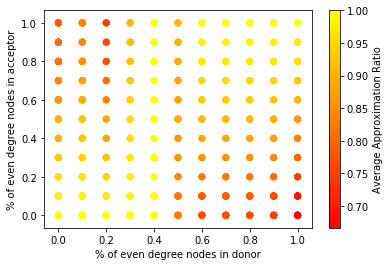

In [91]:
cm = plt.cm.get_cmap('autumn')
sc = plt.scatter(x = x, y = y, vmax = 1,  c=c, cmap = cm)
c_bar = plt.colorbar(sc)
plt.xlabel("% of even degree nodes in donor")
plt.ylabel("% of even degree nodes in acceptor")
c_bar.set_label("Average Approximation Ratio")
plt.show()